## Nvidia resource


In [ ]:
!nvidia-smi

Wed Sep 10 16:43:38 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   32C    P0             43W /  400W |       0MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [ ]:
#A Colab pro environment should have >20Gb of total memory.
from psutil import virtual_memory
colab_pro = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(colab_pro))

if colab_pro < 20:
  print('Not using a high-RAM runtime')
  # train model with lower settings
else:
  print('You are using a high-RAM runtime!')
  # train model with higher settings

Your runtime has 89.6 gigabytes of available RAM

You are using a high-RAM runtime!


## Install CUDA package 12.4 for UMAP in A100 GPU

In [ ]:
# Uninstall current PyTorch and torchvision
!pip uninstall -y torch torchvision torchaudio

# Install PyTorch and torchvision with CUDA 12.4 (compatible version for Colab)
#!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124

# Restart the runtime to apply changes (Colab requirement)
import os
os._exit(0)

Found existing installation: torch 2.8.0+cu126
Uninstalling torch-2.8.0+cu126:
  Successfully uninstalled torch-2.8.0+cu126
Found existing installation: torchvision 0.23.0+cu126
Uninstalling torchvision-0.23.0+cu126:
  Successfully uninstalled torchvision-0.23.0+cu126
Found existing installation: torchaudio 2.8.0+cu126
Uninstalling torchaudio-2.8.0+cu126:
  Successfully uninstalled torchaudio-2.8.0+cu126
Looking in indexes: https://download.pytorch.org/whl/cu124
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 105.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 128.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5

## Software package installation

* Scanpy is a Python-based toolkit for analyzing single-cell gene expression data
[ToDo] simulation of gene regulatory networks, and Includes spatial (squidpy) and multimodal (muon) toolkits


In [ ]:
!pip install cellxgene_census
!pip uninstall -y mygene biothings_client
!pip install mygene==3.2.2 biothings_client==0.3.0
!pip show mygene
!pip show biothings_client
import mygene

#!pip install mygene
#!pip install --upgrade mygene biothings_client
import cellxgene_census
import scanpy as sc
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ftplib
import gzip
from io import StringIO
import requests
import tensorflow as tf

# KEGG pathways
!pip install bioservices
from bioservices import KEGG

"""

# tf.debugging.set_log_device_placement(True)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from scipy.stats import spearmanr
import networkx as nx


import urllib.request

# GNN + RFT
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.0.0+cu118.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.0.0+cu118.html
!pip install torch-geometric

import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv, global_mean_pool
from sklearn.metrics import roc_auc_score


# Adjacency_matrix: convert to COO format
from scipy.sparse import coo_matrix

# Logistic regression
from sklearn.linear_model import LogisticRegression
"""


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.2/21.2 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.9/169.9 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 75.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.0/261.0 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 124.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 119.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfull

Creating directory /root/.config/bioservices 


'\n\n# tf.debugging.set_log_device_placement(True)\n\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.preprocessing import StandardScaler, LabelEncoder\n\nfrom scipy.stats import spearmanr\nimport networkx as nx\n\n\nimport urllib.request\n\n# GNN + RFT\n!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118\n\n!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.0.0+cu118.html\n!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.0.0+cu118.html\n!pip install torch-geometric\n\nimport torch\nimport torch.nn as nn\nimport torch.optim as optim\nfrom torch_geometric.data import Data\nfrom torch_geometric.nn import GCNConv, global_mean_pool\nfrom sklearn.metrics import roc_auc_score\n\n\n# Adjacency_matrix: convert to COO format\nfrom scipy.sparse import coo_matrix\n\n# Logistic regression\nfrom sklearn.linear_model import LogisticRegression\n'

## Download datasets

In [ ]:
# Download Dataset

import os

"""
print("Loading single-soma transcriptomics inhibitory data...")
file_path = "inhibitory.h5ad"
if not os.path.isfile(file_path):
    cellxgene_census.download_source_h5ad("9813a1d4-d107-459e-9b2e-7687be935f69", to_path=file_path)
adata_inhibitory_raw = sc.read_h5ad("inhibitory.h5ad")
"""


#Custom Accession ID can be found at https://app.bxgenomics.com/bxg/app/scrnaview/app_project_review.php?ID=918
print("Loading single-soma transcriptomics excitatory data...")
file_path = "excitatory.h5ad"
if not os.path.isfile(file_path):
    cellxgene_census.download_source_h5ad("85c60876-7f35-40c5-a256-7808d84c6ba5", to_path=file_path)
adata_excitatory_raw = sc.read_h5ad("excitatory.h5ad")


"""
# Download and load MTG dataset

urllib.request.urlretrieve(
    'https://datasets.cellxgene.cziscience.com/32b32549-9c68-453d-91c6-74acad9df928.h5ad',
    'Microglia_PVM_MTG.h5ad'
)
adata_mtg = sc.read_h5ad('Microglia_PVM_MTG.h5ad')
print("MTG Dataset:")
print(adata_mtg)
"""

"""
# Download and load DLPFC dataset
urllib.request.urlretrieve(
    'https://datasets.cellxgene.cziscience.com/6ea7ef32-8a23-40d2-8870-811df2fb2d53.h5ad',
    'Microglia_PVM_DLPFC.h5ad'
)
adata_dlpfc = sc.read_h5ad('Microglia_PVM_DLPFC.h5ad')
print("DLPFC Dataset:")
print(adata_dlpfc)

"""

"""
print("Loading blood sample 1 AD...")
blood_sample_file_path_1 = "GSE63060_series_matrix.txt.gz"
ftp_url_1 = "ftp.ncbi.nlm.nih.gov"
ftp_directory_1 = "/geo/series/GSE63nnn/GSE63060/matrix/"
file_name_1 = "GSE63060_series_matrix.txt.gz"

if not os.path.isfile(blood_sample_file_path_1):
    with ftplib.FTP(ftp_url_1) as ftp:
        ftp.login()
        ftp.cwd(ftp_directory_1)

        with open(blood_sample_file_path_1, "wb") as file:
            ftp.retrbinary(f"RETR {file_name_1}", file.write)


print("Loading blood sample 2 AD...")
blood_sample_file_path_2 = "GSE63061_series_matrix.txt.gz"
ftp_url_2 = "ftp.ncbi.nlm.nih.gov"
ftp_directory_2 = "/geo/series/GSE63nnn/GSE63061/matrix/"
file_name_2 = "GSE63061_series_matrix.txt.gz"

if not os.path.isfile(blood_sample_file_path_2):
    with ftplib.FTP(ftp_url_2) as ftp:
        ftp.login()
        ftp.cwd(ftp_directory_2)

        with open(blood_sample_file_path_2, "wb") as file:
            ftp.retrbinary(f"RETR {file_name_2}", file.write)

print("Loading Gene mapping data...")
gene_mapping_file_path = "GPL6947_HumanHT-12_V3_0_R1_11283641_A.bgx.gz"
url = "https://www.ncbi.nlm.nih.gov/geo/download/?acc=GPL6947&format=file&file=GPL6947%5FHumanHT%2D12%5FV3%5F0%5FR1%5F11283641%5FA%2Ebgx%2Egz"

if not os.path.isfile(gene_mapping_file_path):
    response = requests.get(url, stream=True)
    response.raise_for_status()

    with open(gene_mapping_file_path, "wb") as file:
        for chunk in response.iter_content(chunk_size=8192):
            file.write(chunk)

"""

Loading single-soma transcriptomics excitatory data...


Downloading: 100%|██████████| 1.19G/1.19G [01:39<00:00, 12.8MB/s]


'\nprint("Loading blood sample 1 AD...")\nblood_sample_file_path_1 = "GSE63060_series_matrix.txt.gz"\nftp_url_1 = "ftp.ncbi.nlm.nih.gov"\nftp_directory_1 = "/geo/series/GSE63nnn/GSE63060/matrix/"\nfile_name_1 = "GSE63060_series_matrix.txt.gz"\n\nif not os.path.isfile(blood_sample_file_path_1):\n    with ftplib.FTP(ftp_url_1) as ftp:\n        ftp.login()\n        ftp.cwd(ftp_directory_1)\n\n        with open(blood_sample_file_path_1, "wb") as file:\n            ftp.retrbinary(f"RETR {file_name_1}", file.write)\n\n\nprint("Loading blood sample 2 AD...")\nblood_sample_file_path_2 = "GSE63061_series_matrix.txt.gz"\nftp_url_2 = "ftp.ncbi.nlm.nih.gov"\nftp_directory_2 = "/geo/series/GSE63nnn/GSE63061/matrix/"\nfile_name_2 = "GSE63061_series_matrix.txt.gz"\n\nif not os.path.isfile(blood_sample_file_path_2):\n    with ftplib.FTP(ftp_url_2) as ftp:\n        ftp.login()\n        ftp.cwd(ftp_directory_2)\n\n        with open(blood_sample_file_path_2, "wb") as file:\n            ftp.retrbinary(f"R

## Retrieve the gene name to ID mapping

In [4]:
mg = mygene.MyGeneInfo()
ensembl_ids = adata_excitatory_raw.var_names.tolist()
print(ensembl_ids)

# Query MyGeneInfo to get gene symbols
query_result = mg.querymany(ensembl_ids, scopes='ensembl.gene', fields='symbol', species='human')

# Convert query results into a mapping dictionary (Ensembl ID → Gene Symbol)
ensembl_to_symbol = {entry['query']: entry.get('symbol', 'Unknown') for entry in query_result}

# Reverse the dictionary to map from gene symbols to Ensembl IDs
symbol_to_ensembl = {v: k for k, v in ensembl_to_symbol.items()}

['ENSG00000278915', 'ENSG00000168454', 'ENSG00000139180', 'ENSG00000229177', 'ENSG00000204564', 'ENSG00000116717', 'ENSG00000254418', 'ENSG00000114654', 'ENSG00000257894', 'ENSG00000198398', 'ENSG00000085117', 'ENSG00000092140', 'ENSG00000257008', 'ENSG00000125877', 'ENSG00000170430', 'ENSG00000231662', 'ENSG00000140853', 'ENSG00000261198', 'ENSG00000185610', 'ENSG00000171475', 'ENSG00000180332', 'ENSG00000174982', 'ENSG00000128052', 'ENSG00000272564', 'ENSG00000270000', 'ENSG00000267683', 'ENSG00000151849', 'ENSG00000257335', 'ENSG00000178279', 'ENSG00000251665', 'ENSG00000263438', 'ENSG00000171448', 'ENSG00000164253', 'ENSG00000285210', 'ENSG00000072657', 'ENSG00000131242', 'ENSG00000130675', 'ENSG00000238113', 'ENSG00000140522', 'ENSG00000270885', 'ENSG00000197013', 'ENSG00000249776', 'ENSG00000250361', 'ENSG00000204161', 'ENSG00000162745', 'ENSG00000215203', 'ENSG00000102225', 'ENSG00000256250', 'ENSG00000247121', 'ENSG00000163104', 'ENSG00000089693', 'ENSG00000282772', 'ENSG000001

## Generate graph for data distribution, first print all features of the dataset. Focus on development_stage, Braak, Cell.Types, development_stage.
These can be confounding factors




In [ ]:
print(adata_excitatory_raw.obs.columns)


Index(['nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age',
       'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_Exon', 'nFeature_Exon',
       'PMI', 'Braak', 'Sample.ID', 'Cell.Types', 'tissue_ontology_term_id',
       'assay_ontology_term_id', 'disease_ontology_term_id',
       'cell_type_ontology_term_id', 'development_stage_ontology_term_id',
       'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id',
       'is_primary_data', 'organism_ontology_term_id', 'donor_id',
       'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease',
       'organism', 'sex', 'tissue', 'self_reported_ethnicity',
       'development_stage', 'observation_joinid'],
      dtype='object')


## PathwayID:genes mapping

In [5]:
# Initialize KEGG service
kegg = KEGG()

# Retrieve all human pathways from KEGG
human_pathways = kegg.list("pathway/hsa")

# Extract pathway IDs safely
pathway_ids = []
pathways_with_names = {}
for entry in human_pathways.split("\n"):
    if entry.strip():  # Ensure the line is not empty
        try:
            pathway_id = entry.split("\t")[0]
            pathway_name = entry.split("\t")[1].split(" - ")[0]
            pathway_ids.append(pathway_id)
            pathways_with_names[pathway_id] = pathway_name
        except IndexError:
            print(f"Skipping malformed entry: {entry}")  # Log the issue and skip
print(pathways_with_names)

# Dictionary to store pathways containing AD-related genes
pathwayname_genes_mapping = {}
pathwayid_genes_mapping = {}

# Loop through each pathway to build pathway:genes mapping
for pathway_id in pathway_ids:
    pathway_info = kegg.get(pathway_id)  # Fetch pathway details
    # Fix: Check if `pathway_info` is a valid string
    if not isinstance(pathway_info, str):
        print(f"Skipping {pathway_id}: Unexpected response type ({type(pathway_info)})")
        continue  # Skip this pathway if the response is not a string

    genes = []
    in_gene_section = False
    for line in pathway_info.split("\n"):
        if line.startswith("GENE"):  # Start of the GENE section
            in_gene_section = True
        elif in_gene_section:
            if line.strip() == "":  # End of the GENE section
                break
            # Extract gene symbol (second column)
            parts = line.strip().split()
            gene_symbol = parts[1].strip(";") if len(parts) > 1 else None
            if gene_symbol:
                genes.append(gene_symbol)
    pathwayid_genes_mapping[pathway_id] = genes
    pathwayname_genes_mapping[pathways_with_names[pathway_id]] = genes

# Print pathway:genes mapping
print("Print pathwayID:genes mapping:")
print(pathwayid_genes_mapping)
print("Print pathwayName:genes mapping:")
print(pathwayname_genes_mapping)

Creating directory /root/.cache/bioservices 
Welcome to Bioservices
It looks like you do not have a configuration file.
We are creating one with default values in /root/.config/bioservices/bioservices.cfg .
Done
{'hsa01100': 'Metabolic pathways', 'hsa01200': 'Carbon metabolism', 'hsa01210': '2-Oxocarboxylic acid metabolism', 'hsa01212': 'Fatty acid metabolism', 'hsa01230': 'Biosynthesis of amino acids', 'hsa01232': 'Nucleotide metabolism', 'hsa01250': 'Biosynthesis of nucleotide sugars', 'hsa01240': 'Biosynthesis of cofactors', 'hsa01320': 'Sulfur cycle', 'hsa00010': 'Glycolysis / Gluconeogenesis', 'hsa00020': 'Citrate cycle (TCA cycle)', 'hsa00030': 'Pentose phosphate pathway', 'hsa00040': 'Pentose and glucuronate interconversions', 'hsa00051': 'Fructose and mannose metabolism', 'hsa00052': 'Galactose metabolism', 'hsa00053': 'Ascorbate and aldarate metabolism', 'hsa00500': 'Starch and sucrose metabolism', 'hsa00620': 'Pyruvate metabolism', 'hsa00630': 'Glyoxylate and dicarboxylate me

## Braak and donor distribution

In [ ]:
# Count unique subjects per Braak stage
braak_subject_counts = adata_excitatory_raw.obs.groupby("Braak")["donor_id"].nunique()
print(braak_subject_counts)


Braak
0     2
I     2
II    4
VI    8
Name: donor_id, dtype: int64


/tmp/ipython-input-11-1898084454.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  braak_subject_counts = adata_excitatory_raw.obs.groupby("Braak")["donor_id"].nunique()


## Age and Braak stage distribution

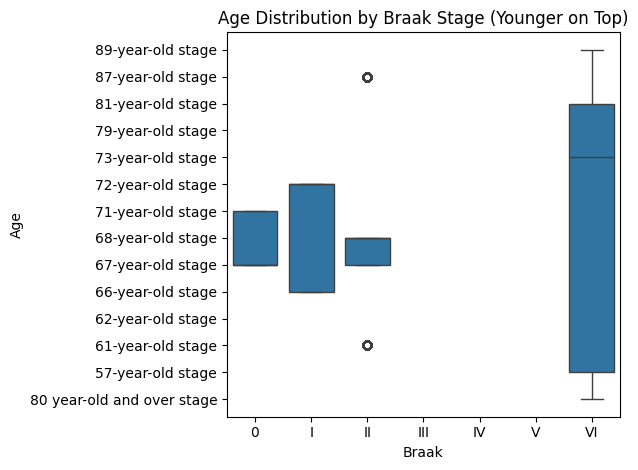

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: define Braak stage order
braak_order = ['0', 'I', 'II', 'III', 'IV', 'V', 'VI']

# Plot boxplot
sns.boxplot(data=adata_excitatory_raw.obs, x='Braak', y='development_stage', order=braak_order)

# Invert y-axis so younger ages are at the top
plt.gca().invert_yaxis()

# Labels and title
plt.title('Age Distribution by Braak Stage (Younger on Top)')
plt.xlabel('Braak')
plt.ylabel('Age')

plt.tight_layout()
plt.show()


## Graphs: adata & dataset distribution



/tmp/ipython-input-13-3040811478.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  braak_per_celltype = adata_excitatory_raw.obs.groupby(['Cell.Types', 'Braak']).size().unstack(fill_value=0)


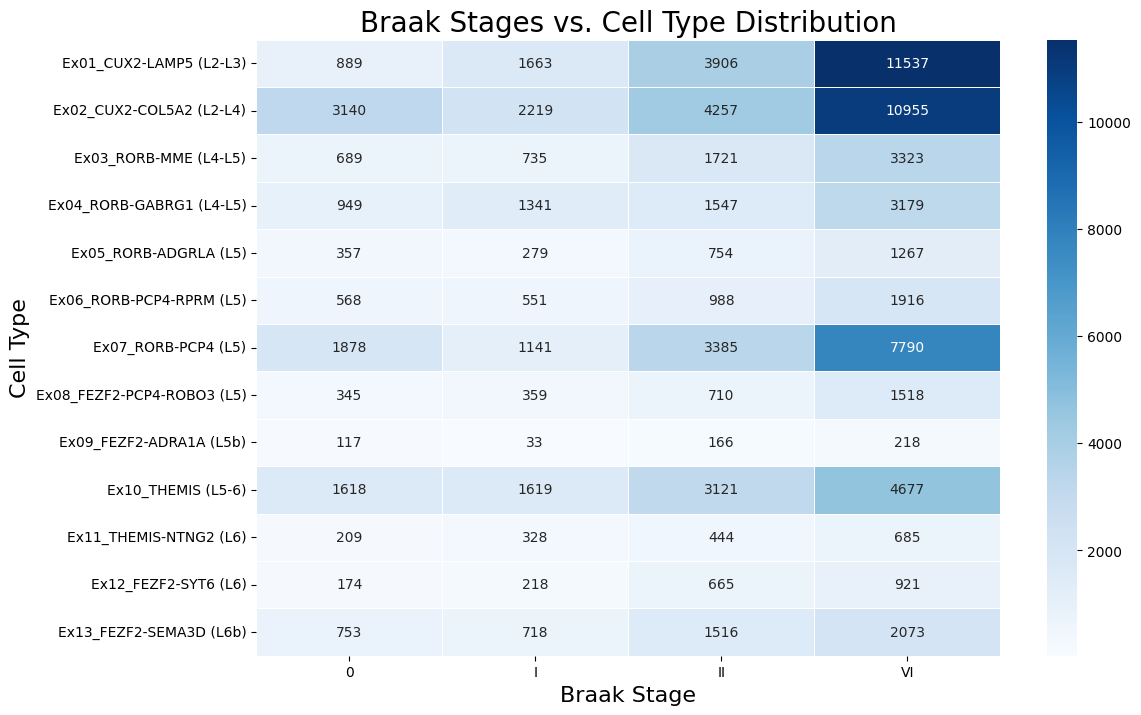

In [ ]:
# Compute cell count per (Braak_stage, cell_type)
braak_per_celltype = adata_excitatory_raw.obs.groupby(['Cell.Types', 'Braak']).size().unstack(fill_value=0)

# Plot the matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(braak_per_celltype, cmap="Blues", annot=True, fmt="d", linewidths=0.5)

# Set labels and title
plt.xlabel("Braak Stage", fontsize=16)
plt.ylabel("Cell Type", fontsize=16)
plt.title("Braak Stages vs. Cell Type Distribution", fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Make x-axis labels vertical
plt.xticks(rotation=0)  # 90-degree rotation for vertical labels
plt.yticks(rotation=0)  # Keep y-axis labels horizontal


# Show the plot
plt.show()

## Filter Braak (AD severity: normal vs. early)

In [6]:
# Replace 'Braak' with the actual column name
# Filter rows with specific values
adata_excitatory_early = adata_excitatory_raw[adata_excitatory_raw.obs['Braak'].isin(["I", "II", "reference", '0'])].copy()
print(adata_excitatory_early.obs['Braak'].unique())  # Inspect unique values in the column

adata_excitatory_early.obs['Braak'] = adata_excitatory_early.obs['Braak'].map(lambda x: 'Early' if x in ['I', 'II'] else 'Normal')
print(adata_excitatory_early.obs['Braak'].unique())  # Inspect unique values in the column


['II', '0', 'I']
Categories (3, object): ['0', 'I', 'II']
['Early' 'Normal']


## filter by sex

In [7]:
adata_excitatory_early_male = adata_excitatory_early[adata_excitatory_early.obs['sex'] == "male"]
print(adata_excitatory_early_male.obs['sex'].unique())
adata_excitatory_early_female = adata_excitatory_early[adata_excitatory_early.obs['sex'] == "female"]
print(adata_excitatory_early_female.obs['sex'].unique())

['male']
Categories (1, object): ['male']
['female']
Categories (1, object): ['female']


## Pathways - Genes Visualization

{'Glycolysis / Gluconeogenesis': ['ENO2', 'GAPDH'], 'Butanoate metabolism': ['GAD1', 'GAD2'], 'Inositol phosphate metabolism': ['INPP4B'], 'Oxidative phosphorylation': ['COX1', 'COX2', 'COX3', 'ND1', 'ND4'], 'Alanine, aspartate and glutamate metabolism': ['GAD1', 'GAD2'], 'beta-Alanine metabolism': ['GAD1', 'GAD2'], 'Taurine and hypotaurine metabolism': ['GAD1', 'GAD2'], 'RNA degradation': ['ENO2'], 'ATP-dependent chromatin remodeling': ['ACTB'], 'Viral life cycle': ['MAP1B'], 'MAPK signaling pathway': ['ERBB4'], 'ErbB signaling pathway': ['ERBB4'], 'Rap1 signaling pathway': ['ACTB'], 'HIF-1 signaling pathway': ['ENO2', 'GAPDH'], 'Calcium signaling pathway': ['ERBB4'], 'Phosphatidylinositol signaling system': ['INPP4B'], 'PI3K-Akt signaling pathway': ['ERBB4'], 'Neuroactive ligand signaling': ['SLC17A7', 'SLC6A1'], 'Phagosome': ['ACTB'], 'Oocyte meiosis': ['SPDYE2'], 'Focal adhesion': ['ACTB'], 'Adherens junction': ['ACTB'], 'Tight junction': ['ACTB'], 'Motor proteins': ['ACTB'], 'Cyto

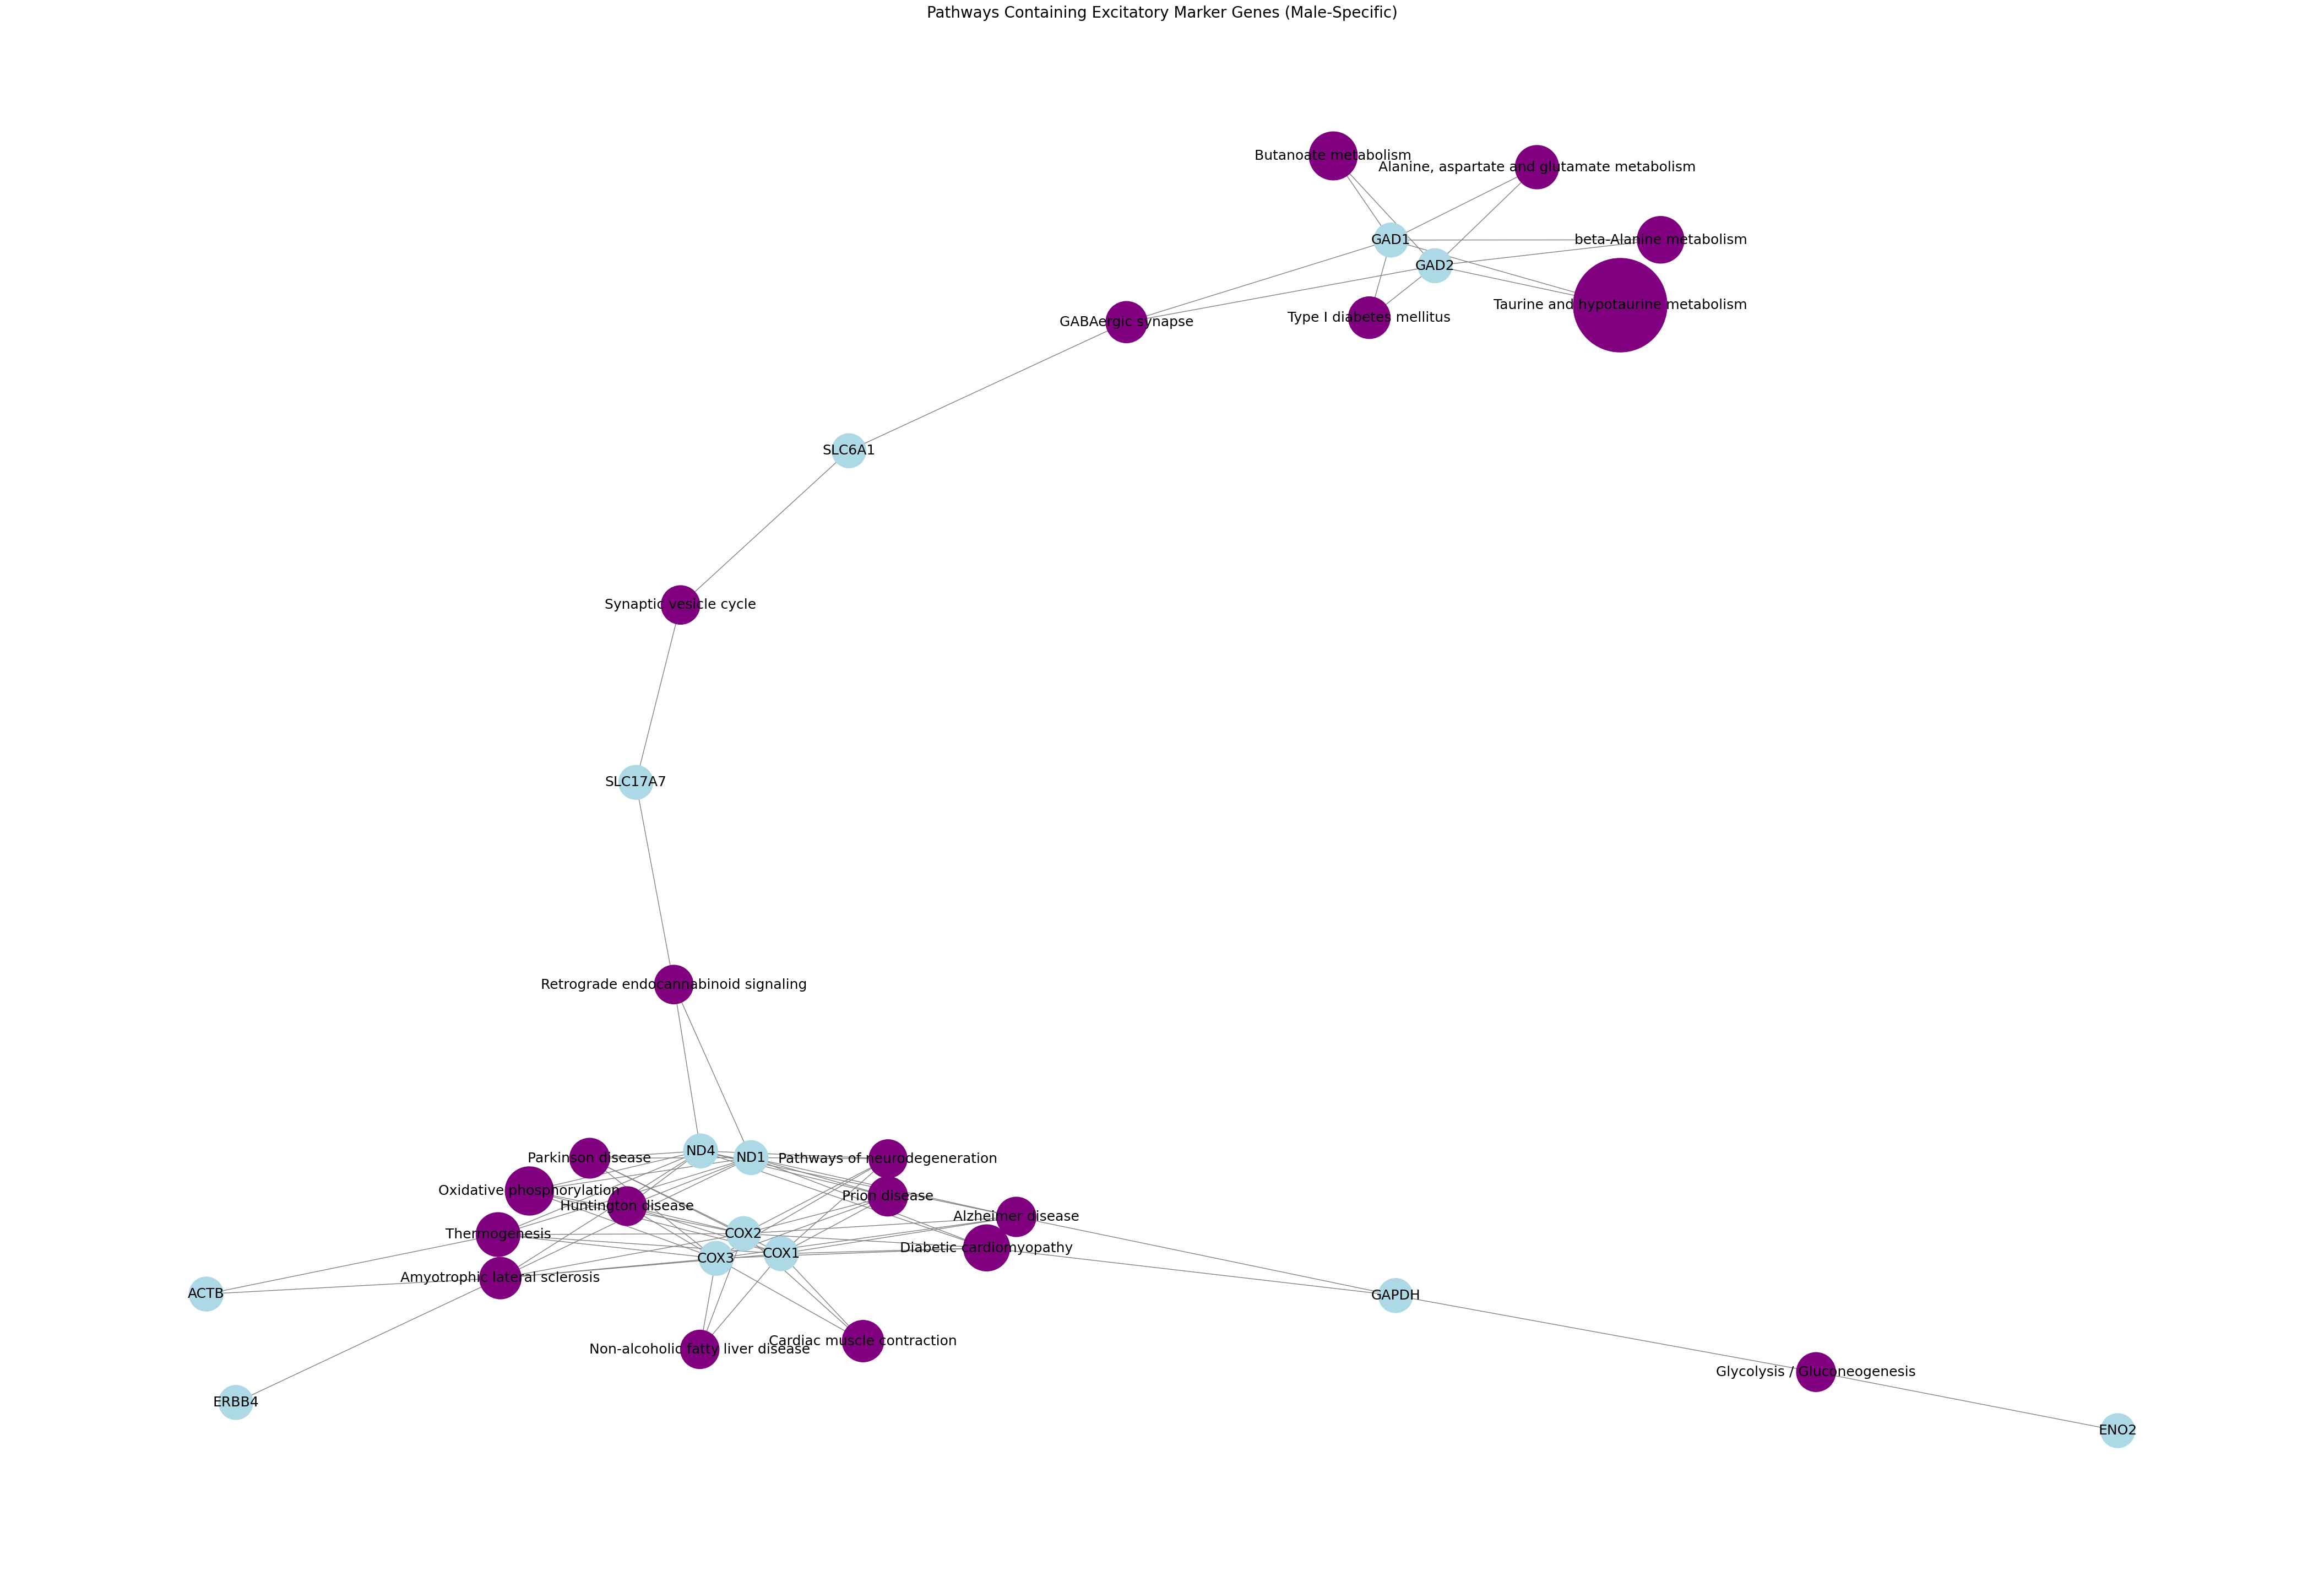

In [8]:
import matplotlib.pyplot as plt
import networkx as nx

# Your identified genes
#identified_genes = ['LINGO1', 'RASGEF1B', 'SLC26A3', 'INO80D', 'Unknown', 'LOC124902727', 'MIATNB', 'PDE5A', 'GRIN1', 'LINC00486', 'SNHG9', 'NPIPA1', 'FAM153A', 'LINC00685', 'DPP7', 'HDAC10', 'CTDSPL2-DT', 'ZMYM3', 'ARL17A', 'NPIPA8', 'CACNA1C', 'PTPRN2', 'XIST', 'SYN3', 'TMEM132B', 'AGAP1', 'Unknown', 'RBFOX1', 'FGF14', 'RGS6', 'GRM5', 'CAMK1D', 'SHISA9', 'GRIN2B', 'RERE', 'TMEM178B', 'TMEM132D', 'DLG2', 'KSR2', 'DAPK1']
#identified_genes = ['LINGO1', 'RASGEF1B', 'SLC26A3', 'INO80D', 'Unknown', 'LOC124902727', 'MIATNB', 'PDE5A', 'GRIN1']

superset_male = ['COX1', 'GAD1', 'SCN1A', 'SLC22A10', 'ARL4C', 'ENO2', 'COX3', 'NRGN', 'PHACTR1', 'COX2', 'ND1', 'LOC124902727', 'SLC6A1', 'GAD2', 'Unknown', 'ERBB4', 'LSAMP-AS1', 'FAIM2', 'LINGO1', 'ARL17B', 'RGS7', 'ND4', 'SLC17A7', 'GAPDH', 'SLC26A3', 'SPDYE2', 'INPP4B', 'MALAT1', 'CADPS2', 'KHDRBS3', 'RASGEF1B', 'SPARCL1', 'KANSL1', 'TOX', 'ACTB', 'NPAS2', 'MAP1B']

# Filter pathways that contain identified genes
filtered_pathways = {pathway: [gene for gene in genes if gene in superset_male]
                     for pathway, genes in pathwayname_genes_mapping.items()}

# Remove empty pathways
filtered_pathways = {pathway: genes for pathway, genes in filtered_pathways.items() if genes}
print(filtered_pathways)

# -----
# Function to get a subset of a dictionary based on a given list of genes
def get_subset_mapping_debug(original_mapping, selected_keys):
    subset = {}  # Initialize empty dictionary to store subset mapping
    missing_keys = []  # Track keys that were not found

    for key in selected_keys:
        print("selected_keys", key)
        if key in original_mapping:
            print("key in original mapping|", key, "|")
            subset[key] = original_mapping[key]  # Add to subset if key exists in original mapping
        else:
            print("missing key|", key, "|")
            missing_keys.append(key)  # Track missing keys

    # Debugging output
    print("Selected Keys:", selected_keys)
    print("Keys Found in Mapping:", list(subset.keys()))
    print("Keys Not Found in Mapping:", missing_keys)

    return subset

'''
selected_female_pathways = ["Long-term potentiation", "Glutamatergic synapse", "Circadian entrainment", "Calcium signaling pathway",
                     "Alzheimer disease", "Pathways of neurodegeneration"]

selected_male_pathways = ["Taurine and hypotaurine metabolism", "GABAergic synapse", "Butanoate metabolism", "beta-Alanine metabolism",
                          'Alanine, aspartate and glutamate metabolism',
                          'Type I diabetes mellitus']

selected_male_pathways = ['Amyotrophic lateral sclerosis',
                  'Thermogenesis']

'''


selected_male_excitatory_superset_pathways = ['Diabetic cardiomyopathy', 'Thermogenesis', 'Amyotrophic lateral sclerosis', 'Oxidative phosphorylation', 'Alzheimer disease', 'Parkinson disease',
 'Prion disease', 'Taurine and hypotaurine metabolism', 'Huntington disease', 'Cardiac muscle contraction', 'GABAergic synapse', 'Butanoate metabolism', 'beta-Alanine metabolism',
 'Pathways of neurodegeneration', 'Alanine, aspartate and glutamate metabolism', 'Retrograde endocannabinoid signaling', 'Type I diabetes mellitus', 'Non-alcoholic fatty liver disease',
 'Glycolysis / Gluconeogenesis', 'Synaptic vesicle cycle']

#selected_male_excitatory_superset_pathways_p_value = [0.000071, 0.000071, 0.000071, 0.000071, 0.000695, 0.000965, 0.001273, 0.001450, 0.001683, 0.003451, 0.003451, 0.006513, 0.006903,
selected_male_excitatory_superset_pathways_combined_score = [256.705530, 210.389664, 159.220349, 298.469852, 102.636855, 117.570613, 101.955507, 1091.539977, 85.211043, 156.534337,
151.523807, 293.925225, 267.283774, 41.240601, 200.158549, 71.941139, 162.556418, 67.100788, 87.234922, 70.180087]
"""

selected_female_pathways = ['Pancreatic secretion', 'Th17 cell differentiation']
selected_female_pathways = ['Spinocerebellar ataxia',
                            'Mineral absorption', 'Inflammatory bowel disease']

selected_female_pathways = ['Cell adhesion molecules', 'cGMP-PKG signaling pathway', 'Thermogenesis', 'Prion disease', 'Circadian rhythm', 'Regulation of lipolysis in adipocytes',
                            'Long-term depression', 'Gap junction', 'Salivary secretion', 'Circadian entrainment',
                            'Platelet activation', 'Purine metabolism', 'Oxidative phosphorylation', 'Vascular smooth muscle contraction', 'Retrograde endocannabinoid signaling']


selected_female_pathways = ['Spinocerebellar ataxia', 'Cell adhesion molecules', 'cGMP-PKG signaling pathway', 'Thermogenesis', 'Prion disease', 'Circadian rhythm', 'Regulation of lipolysis in adipocytes',
                            'Long-term depression', 'Mineral absorption', 'Inflammatory bowel disease', 'Gap junction', 'Salivary secretion', 'Circadian entrainment',
                            'Pancreatic secretion', 'Th17 cell differentiation', 'Platelet activation', 'Purine metabolism', 'Oxidative phosphorylation', 'Vascular smooth muscle contraction', 'Retrograde endocannabinoid signaling']

"""



# Get subset mapping
subset_mapping = get_subset_mapping_debug(filtered_pathways, selected_male_excitatory_superset_pathways)

# Print result
print(subset_mapping)

# -----
# Create a network graph
def scale_sizes(values, min_size=2500, max_size=15000):
    min_val, max_val = min(values), max(values)
    scaled = [min_size + (max_size - min_size) * ((v - min_val) / (max_val - min_val))**1.5 for v in values]
    return scaled

scaled_sizes = scale_sizes(selected_male_excitatory_superset_pathways_combined_score)

G = nx.Graph()
for i, (pathway, genes) in enumerate(subset_mapping.items()):
    pathway_size = scaled_sizes[i]  # Get scaled size for each pathway
    G.add_node(pathway, color='purple', size=pathway_size)  # Pathway node

    for gene in genes:
        G.add_node(gene, color='lightblue', size=2000)  # Gene node (fixed size)
        G.add_edge(pathway, gene)  # Connect pathway to gene

"""
# Add nodes and edges
for pathway, genes in subset_mapping.items():
    pathway_size = scaled_sizes[i]  # Get scaled size for each pathway
    G.add_node(pathway, color='lightblue', size=2500)  # Pathway node
    for gene in genes:
        G.add_node(gene, color='lightpink', size=2000)  # Gene node
        G.add_edge(pathway, gene)  # Connect pathway to gene
"""

# Extract node colors and sizes
node_colors = [G.nodes[node]['color'] for node in G.nodes]
node_sizes = [G.nodes[node]['size'] for node in G.nodes]

# Draw the graph
plt.figure(figsize=(42, 28))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=node_sizes, edge_color='gray', font_size=18)
plt.title("Pathways Containing Excitatory Marker Genes (Male-Specific)", fontsize=20)
plt.show()


**bold text**# Confounding factors

In [ ]:
print(adata_excitatory_early.obs["development_stage"].unique())

['61-year-old stage', '67-year-old stage', '87-year-old stage', '72-year-old stage', '66-year-old stage', '68-year-old stage', '71-year-old stage']
Categories (7, object): ['61-year-old stage', '66-year-old stage', '67-year-old stage',
                         '68-year-old stage', '71-year-old stage', '72-year-old stage',
                         '87-year-old stage']


## Normalize

In [9]:
#Cells in scRNA-seq experiments may have varying numbers of total counts due to technical or biological reasons
# (e.g., sequencing depth, RNA content per cell). Normalization ensures comparability between cells by eliminating these differences.
# Many downstream analyses (e.g., clustering, dimensionality reduction, differential expression) assume that all cells are on a comparable scale.
# [ToDo] experiment cluster without normalization

sc.pp.normalize_total(adata_excitatory_early, target_sum=1e4)

## Filter highly variable genes
# [ToDo]
#sc.pp.highly_variable_genes(adata_excitatory_early, min_mean=0.0125, max_mean=3, min_disp=0.5,subset=True)
sc.pp.log1p(adata_excitatory_early)
## [ToDo] why need pca?


## Data preprocessing

## Filter cell types (neuron layers)

In [10]:
#adata_excitatory_early = adata_excitatory_early[adata_excitatory_early.obs['Cell.Types'].isin(['Ex01_CUX2-LAMP5 (L2-L3)', 'Ex02_CUX2-COL5A2 (L2-L4)'])].copy()
adata_excitatory_early = adata_excitatory_early[adata_excitatory_early.obs['Cell.Types'].isin(['Ex02_CUX2-COL5A2 (L2-L4)', 'Ex01_CUX2-LAMP5 (L2-L3)'])].copy()
print(adata_excitatory_early.obs['Cell.Types'].unique())

"""
# For reference:
# Excitagory cells
cell_types = ['Ex04_RORB-GABRG1 (L4-L5)', 'Ex13_FEZF2-SEMA3D (L6b)', 'Ex03_RORB-MME (L4-L5)', 'Ex07_RORB-PCP4 (L5)', 'Ex02_CUX2-COL5A2 (L2-L4)', 'Ex01_CUX2-LAMP5 (L2-L3)', 'Ex12_FEZF2-SYT6 (L6)', 'Ex05_RORB-ADGRLA (L5)', 'Ex08_FEZF2-PCP4-ROBO3 (L5)', 'Ex06_RORB-PCP4-RPRM (L5)', 'Ex10_THEMIS (L5-6)', 'Ex11_THEMIS-NTNG2 (L6)', 'Ex09_FEZF2-ADRA1A (L5b)']

cell_types = ['In1_LHX6-PVALB', 'In2_LHX6-PVALB-Chandelier', 'In3_LHX6-SST',
                         'In4_LHX6-SST-NPY', 'In5_LHX6-ADARB2-LAMP5', 'In6_ADARB2-LAMP5',
                         'In7_ADARB2-CALB2']
# Inhibitory cells
"""

['Ex01_CUX2-LAMP5 (L2-L3)', 'Ex02_CUX2-COL5A2 (L2-L4)']
Categories (2, object): ['Ex01_CUX2-LAMP5 (L2-L3)', 'Ex02_CUX2-COL5A2 (L2-L4)']


"\n# For reference:\n# Excitagory cells\ncell_types = ['Ex04_RORB-GABRG1 (L4-L5)', 'Ex13_FEZF2-SEMA3D (L6b)', 'Ex03_RORB-MME (L4-L5)', 'Ex07_RORB-PCP4 (L5)', 'Ex02_CUX2-COL5A2 (L2-L4)', 'Ex01_CUX2-LAMP5 (L2-L3)', 'Ex12_FEZF2-SYT6 (L6)', 'Ex05_RORB-ADGRLA (L5)', 'Ex08_FEZF2-PCP4-ROBO3 (L5)', 'Ex06_RORB-PCP4-RPRM (L5)', 'Ex10_THEMIS (L5-6)', 'Ex11_THEMIS-NTNG2 (L6)', 'Ex09_FEZF2-ADRA1A (L5b)']\n\ncell_types = ['In1_LHX6-PVALB', 'In2_LHX6-PVALB-Chandelier', 'In3_LHX6-SST',\n                         'In4_LHX6-SST-NPY', 'In5_LHX6-ADARB2-LAMP5', 'In6_ADARB2-LAMP5',\n                         'In7_ADARB2-CALB2']\n# Inhibitory cells\n"

## Filter out low quality cells and genes

* Remove cells with a low number of genes detected (Genes detected).
* Exclude cells with extremely high or low Number of UMIs to avoid doublets or dead cells.
* Filter out cells with high Fraction mitochondrial UMIs as this indicates cell stress or apoptosis.

### Distribution pre-filtering

Least number of genes detected in a cell: 601.0


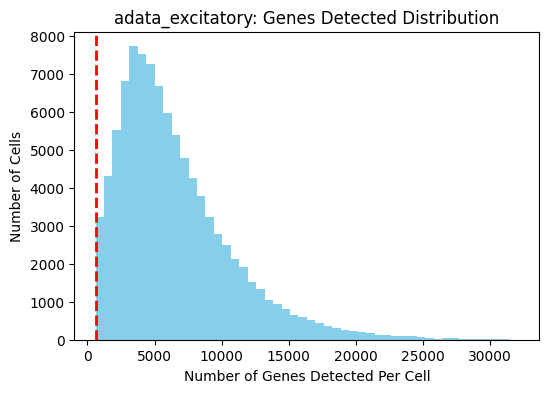

In [11]:
min_genes_per_cell = adata_excitatory_raw.obs['nCount_RNA'].min()
print(f"Least number of genes detected in a cell: {min_genes_per_cell}")

plt.figure(figsize=(6, 4))
plt.hist(adata_excitatory_raw.obs['nCount_RNA'], bins=50, color='skyblue')  # Reduced bins to 50
# Add a vertical line at 200 genes
plt.axvline(x=600, color='red', linestyle='--', linewidth=2, label='Threshold (600 genes)')

plt.xlabel('Number of Genes Detected Per Cell')
plt.ylabel('Number of Cells')
plt.title('adata_excitatory: Genes Detected Distribution')
plt.show()
plt.close()  # Clear figure to reduce memory usage

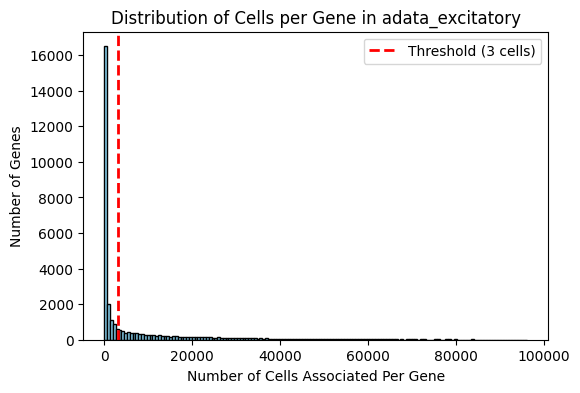

In [12]:


# Count how many cells express each gene
gene_counts = np.array((adata_excitatory_raw.X > 0).sum(axis=0)).flatten()

# Create a histogram
plt.figure(figsize=(6, 4))
plt.hist(gene_counts, bins=150, color='skyblue', edgecolor='black')

# Add a vertical line at a threshold (e.g., 3 cells per gene)
plt.axvline(x=3000, color='red', linestyle='--', linewidth=2, label='Threshold (3 cells)')

# Set labels and title
plt.xlabel('Number of Cells Associated Per Gene')
plt.ylabel('Number of Genes')
plt.title('Distribution of Cells per Gene in adata_excitatory')

# Add legend
plt.legend()

# Show plot
plt.show()
plt.close()  # Clear figure to reduce memory usage


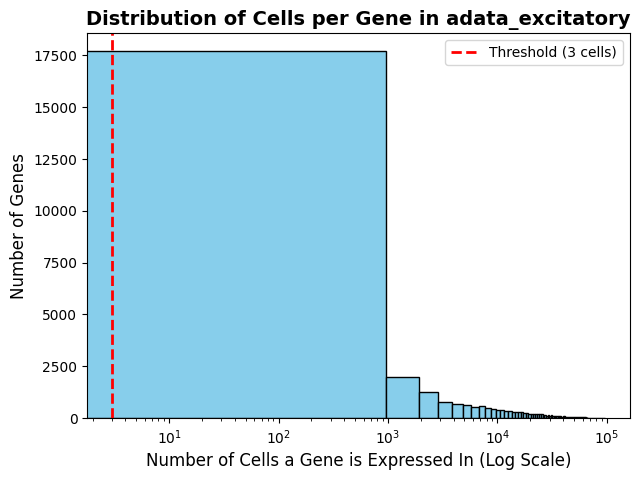

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the number of cells each gene is expressed in
gene_cell_counts = np.array((adata_excitatory_raw.X > 0).sum(axis=0)).flatten()

# Create a histogram with adjusted bins
plt.figure(figsize=(7, 5))
plt.hist(gene_cell_counts, bins=100, color='skyblue', edgecolor='black')  # Increased bins for better granularity

# Log scale on x-axis to handle skewed distribution
plt.xscale('log')

# Add a vertical line to mark the threshold (e.g., genes expressed in < 3 cells)
plt.axvline(x=3, color='red', linestyle='--', linewidth=2, label='Threshold (3 cells)')

# Set labels and title
plt.xlabel('Number of Cells a Gene is Expressed In (Log Scale)', fontsize=12)
plt.ylabel('Number of Genes', fontsize=12)
plt.title('Distribution of Cells per Gene in adata_excitatory', fontsize=14, fontweight='bold')

# Add legend
plt.legend()

# Show plot
plt.show()
plt.close()  # Clear figure to reduce memory usage


In [14]:
# Count how many cells express each gene
gene_counts = np.array((adata_excitatory_raw.X > 0).sum(axis=0)).flatten()

# Find how many genes are present in fewer than 3 cells
genes_less_than_3_cells = np.sum(gene_counts < 3)

print(f"Number of genes detected in fewer than 3 cells: {genes_less_than_3_cells}")


Number of genes detected in fewer than 3 cells: 4733


### Filter


Filtering low-quality cells in adata_excitatory dataset...


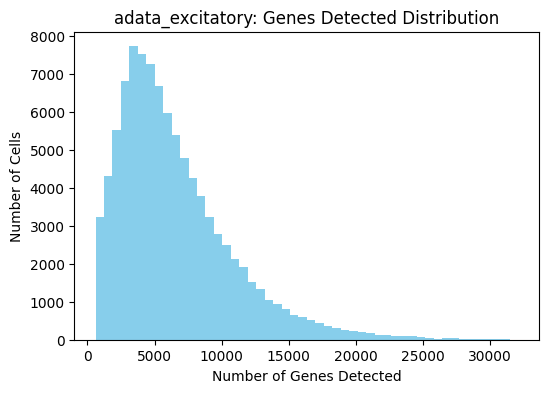

Cells with at least 200 genes detected: 96129


/usr/local/lib/python3.12/dist-packages/scanpy/preprocessing/_simple.py:293: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_cells"] = number


Final number of high-quality cells in adata_excitatory: 96129


In [15]:
# Function to filter out low-quality cells
def filter_low_quality_cells(adata, dataset_name):
    print(f"\nFiltering low-quality cells in {dataset_name} dataset...")

    # Plot histogram of 'Genes detected' to decide on a minimum threshold
    plt.figure(figsize=(6, 4))
    plt.hist(adata.obs['nCount_RNA'], bins=50, color='skyblue')  # Reduced bins to 50
    plt.xlabel('Number of Genes Detected')
    plt.ylabel('Number of Cells')
    plt.title(f'{dataset_name}: Genes Detected Distribution')
    plt.show()
    plt.close()  # Clear figure to reduce memory usage

    # Set a minimum number of genes detected per cell
    # Threshold of 200 is suitable for dataset that includes cells with naturally low RNA content (e.g., neurons, certain glial cells).
    # also AD cells may not be highly active cells
    # For Alzheimer's disease studies, where neuronal and glial cell heterogeneity and transcriptional dynamics are critical, a flexible approach might be optimal.
    min_genes = 200  # Adjust this threshold based on the histogram
    adata = adata[adata.obs['nCount_RNA'] >= min_genes, :]
    print(f"Cells with at least {min_genes} genes detected: {adata.n_obs}")

    # remove genes in less than 3 cells
    sc.pp.filter_genes(adata, min_cells=3)

    print(f"Final number of high-quality cells in {dataset_name}: {adata.n_obs}")
    return adata

# Apply the filtering function on the datasets
try:
    adata_excitatory = filter_low_quality_cells(adata_excitatory_raw, 'adata_excitatory')
except MemoryError:
    print("The session ran out of memory. Please try further reducing the dataset size or consider sampling.")


In [16]:
print(adata_excitatory.obs["sex"].unique())
print(adata_excitatory.obs["cell_type"].unique())


['female', 'male']
Categories (2, object): ['female', 'male']
['neuron']
Categories (1, object): ['neuron']


## Graphs: Age & Braak Distribution

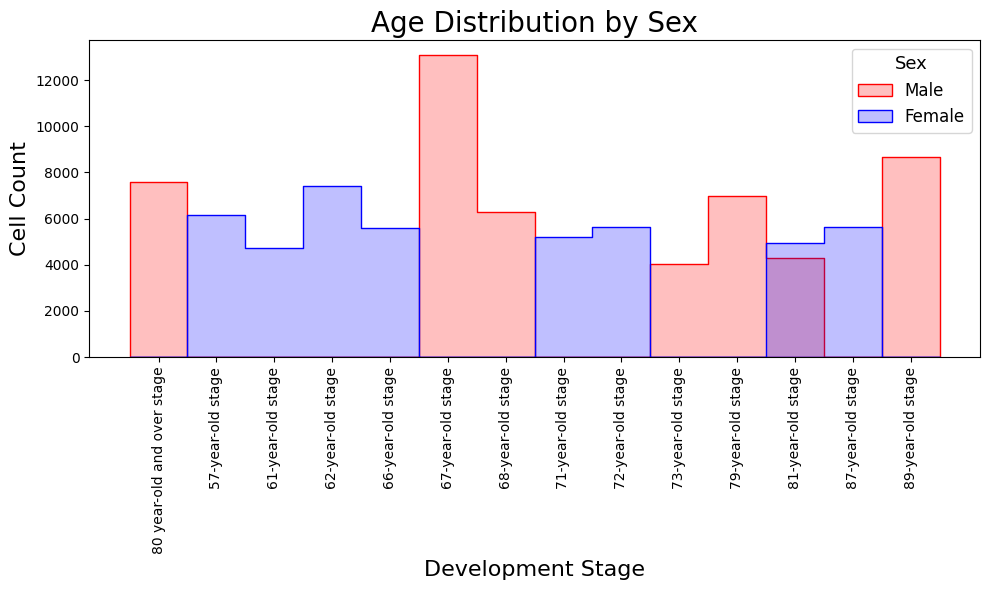

In [17]:


# Create a DataFrame with relevant data
data = adata_excitatory.obs[['development_stage', 'Braak', 'sex']].dropna()

# Define a custom color palette
custom_palette = {'male': 'blue', 'female': 'red'}

# Create the histogram plot with explicit hue_order
plt.figure(figsize=(10, 6))
hist_plot = sns.histplot(
    data=data,
    x='development_stage',
    hue='sex',
    hue_order=['male', 'female'],  # Explicitly define hue order
    bins=20,
    element="step",
    palette=custom_palette
)

# Forcefully create a legend manually
plt.legend(['Male', 'Female'], title='Sex', fontsize=12, title_fontsize=13, loc='upper right')

# Set title and labels
plt.title('Age Distribution by Sex', fontsize=20)
plt.xlabel('Development Stage', fontsize=16)
plt.xticks(rotation=90)  # 90-degree rotation for vertical labels
plt.ylabel('Cell Count', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.show()


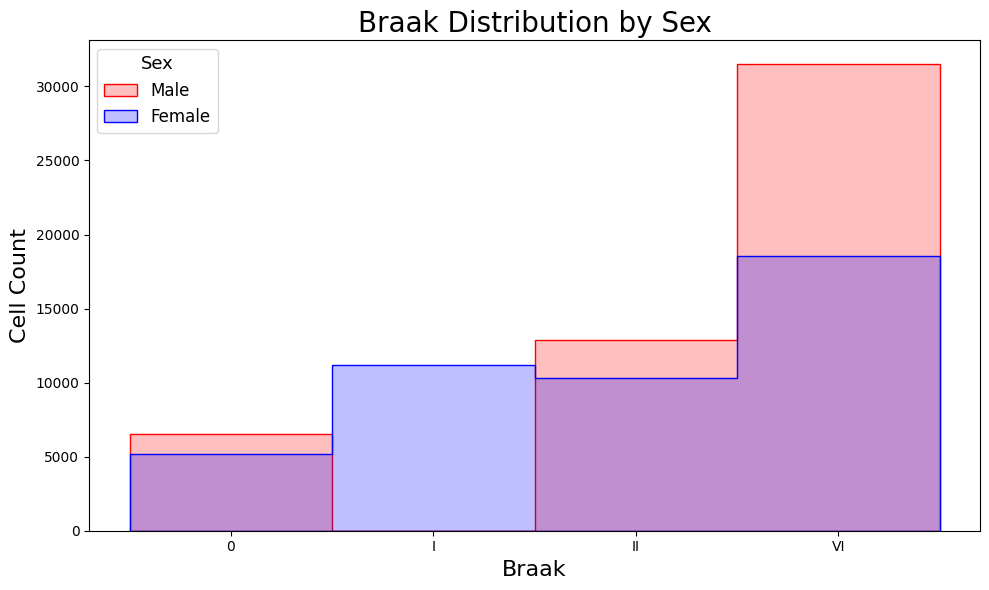

In [18]:
# Create a DataFrame with relevant data
data = adata_excitatory.obs[['development_stage', 'Braak', 'sex']].dropna()

# Define a custom color palette
custom_palette = {'male': 'blue', 'female': 'red'}

# Create the histogram plot with explicit hue_order
plt.figure(figsize=(10, 6))
hist_plot = sns.histplot(
    data=data,
    x='Braak',
    hue='sex',
    hue_order=['male', 'female'],  # Explicitly define hue order
    bins=20,
    element="step",
    palette=custom_palette
)

# Forcefully create a legend manually
plt.legend(['Male', 'Female'], title='Sex', fontsize=12, title_fontsize=13, loc='upper left')

# Set title and labels
plt.title('Braak Distribution by Sex', fontsize=20)
plt.xlabel('Braak', fontsize=16)
plt.xticks(rotation=0)  # 90-degree rotation for vertical labels
plt.ylabel('Cell Count', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.show()


## UMAP & Leiden Clustering Analysis

## Before normalization

In [19]:
import scipy.sparse as sp

# Define the list of gene IDs
genes_of_interest = [
    'ENSG00000265163', 'ENSG00000183260', 'ENSG00000223554', 'ENSG00000261206', 'ENSG00000139800',
    'ENSG00000273132', 'ENSG00000284680', 'ENSG00000165655', 'ENSG00000185372', 'ENSG00000270114',
    'ENSG00000261637', 'ENSG00000198129', 'ENSG00000225881', 'ENSG00000225226', 'ENSG00000170915',
    'ENSG00000182346', 'ENSG00000258555', 'ENSG00000254645', 'ENSG00000253871', 'ENSG00000258223',
    'ENSG00000249091', 'ENSG00000087510', 'ENSG00000234638', 'ENSG00000278546', 'ENSG00000284957',
    'ENSG00000265664', 'ENSG00000185662', 'ENSG00000236936', 'ENSG00000250865', 'ENSG00000249021',
    'ENSG00000197891', 'ENSG00000251371', 'ENSG00000204414', 'ENSG00000242366', 'ENSG00000254651',
    'ENSG00000233417', 'ENSG00000254508', 'ENSG00000127318', 'ENSG00000281386', 'ENSG00000198753',
    'ENSG00000261082', 'ENSG00000261097', 'ENSG00000169385', 'ENSG00000188293', 'ENSG00000224397',
    'ENSG00000159885', 'ENSG00000262905', 'ENSG00000175315', 'ENSG00000253313', 'ENSG00000284695'
]

# Ensure gene IDs are present in the dataset
genes_available = [gene for gene in genes_of_interest if gene in adata_excitatory_early.var_names]
print(genes_available)

# Subset the data for selected genes
adata_subset = adata_excitatory_early[:, genes_available]

# Convert sparse matrix to dense format safely
if sp.issparse(adata_subset.X):
    X_dense = adata_subset.X.toarray()  # Convert sparse matrix to dense array
else:
    X_dense = np.array(adata_subset.X)

if 'Cell.Types' not in adata_excitatory_early.obs.columns:
    raise ValueError("The 'Cell.Types' column is missing in the metadata.")


# Create DataFrame with gene expression values
gene_expression_per_celltype = pd.DataFrame(X_dense, columns=genes_available)


# Aggregate gene expression by Cell Type
#gene_expression_per_celltype = pd.DataFrame(adata_subset.X.toarray(), columns=genes_available)
gene_expression_per_celltype['Cell Type'] = adata_subset.obs['Cell.Types'].values
gene_expression_per_celltype = gene_expression_per_celltype.groupby('Cell Type').mean()

# Print the DataFrame
print(gene_expression_per_celltype)

# Optionally, save to a CSV file for easy viewing
gene_expression_per_celltype.to_csv("gene_expression_per_celltype.csv", index=True)
print("Saved results to 'gene_expression_per_celltype.csv'")


['ENSG00000265163', 'ENSG00000183260', 'ENSG00000223554', 'ENSG00000261206', 'ENSG00000139800', 'ENSG00000273132', 'ENSG00000284680', 'ENSG00000165655', 'ENSG00000185372', 'ENSG00000270114', 'ENSG00000261637', 'ENSG00000198129', 'ENSG00000225881', 'ENSG00000225226', 'ENSG00000170915', 'ENSG00000182346', 'ENSG00000258555', 'ENSG00000254645', 'ENSG00000253871', 'ENSG00000258223', 'ENSG00000249091', 'ENSG00000087510', 'ENSG00000234638', 'ENSG00000278546', 'ENSG00000284957', 'ENSG00000265664', 'ENSG00000185662', 'ENSG00000236936', 'ENSG00000250865', 'ENSG00000249021', 'ENSG00000197891', 'ENSG00000251371', 'ENSG00000204414', 'ENSG00000242366', 'ENSG00000254651', 'ENSG00000233417', 'ENSG00000254508', 'ENSG00000127318', 'ENSG00000281386', 'ENSG00000198753', 'ENSG00000261082', 'ENSG00000261097', 'ENSG00000169385', 'ENSG00000188293', 'ENSG00000224397', 'ENSG00000159885', 'ENSG00000262905', 'ENSG00000175315', 'ENSG00000253313', 'ENSG00000284695']
                          ENSG00000265163  ENSG00

/tmp/ipython-input-886837347.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gene_expression_per_celltype = gene_expression_per_celltype.groupby('Cell Type').mean()


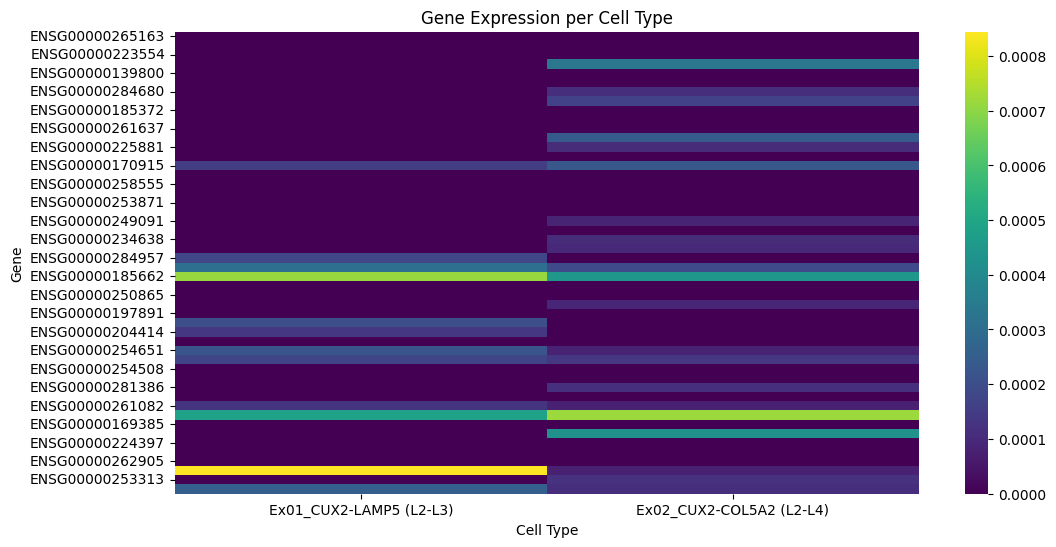

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(gene_expression_per_celltype.T, cmap="viridis", annot=False)
plt.xlabel("Cell Type")
plt.ylabel("Gene")
plt.title("Gene Expression per Cell Type")
plt.show()


In [21]:
sc.pp.normalize_total(adata_excitatory_early, target_sum=1e4)

## UMAP

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 80.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 121.6 MB/s eta 0:00:00


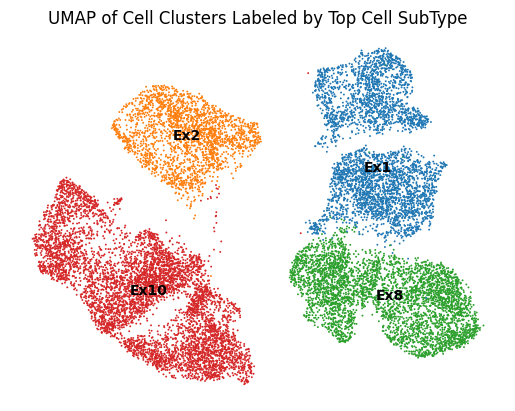

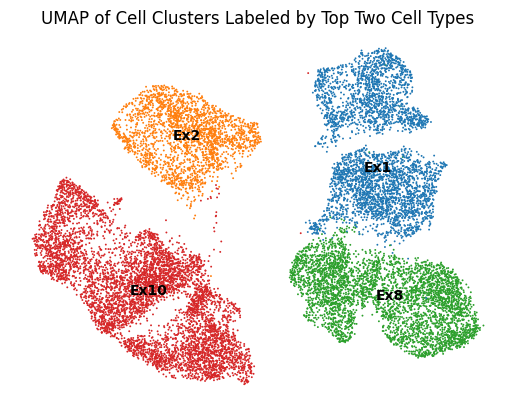

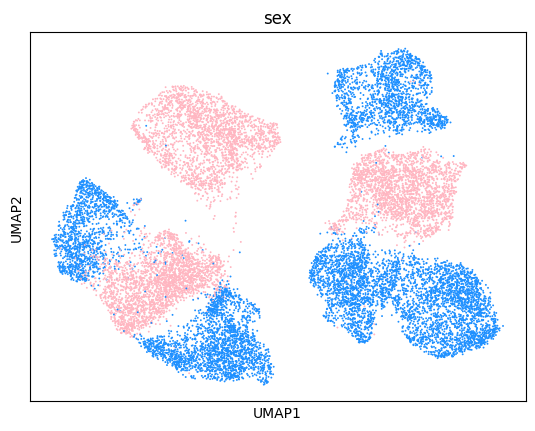

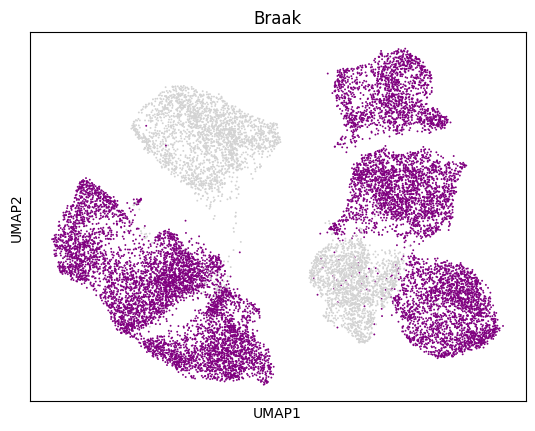

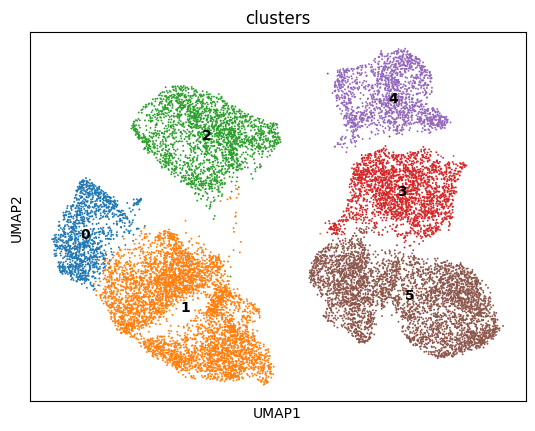

In [22]:
!pip install leidenalg
import re
# https://www.youtube.com/watch?v=uHD7YvIdw8k
# dimensionality reduction for easier analysis
# PCA finds a few principal components (PCs) that explain most of the variability in gene expression.
sc.pp.pca(adata_excitatory_early)
sc.pp.neighbors(adata_excitatory_early)
sc.tl.umap(adata_excitatory_early)

# Perform clustering
sc.tl.leiden(adata_excitatory_early, key_added="clusters", resolution=0.1, flavor="igraph", directed=False, n_iterations=2)
"""
# Count occurrences of each cell type in each cluster
cluster_counts = adata_excitatory_early.obs.groupby(["clusters", "Cell.Types"]).size().unstack(fill_value=0)

# Find the top two most abundant cell types per cluster
top_two_cell_types = cluster_counts.apply(lambda x: x.nlargest(2).index.tolist(), axis=1)

# Function to extract only the main cell type before "_" or "-"
def clean_cell_type(cell_type):
    return re.split(r'[_-]', str(cell_type))[0]  # Take the first part before _ or -

# Format labels with cluster number and top two cell types
top_two_labels = {
    str(cluster): f"{cluster}: {clean_cell_type(cell_types[0])}, {clean_cell_type(cell_types[1])}"
    if len(cell_types) > 1 else f"Cluster {cluster}: {clean_cell_type(cell_types[0])}"
    for cluster, cell_types in top_two_cell_types.items()
}

# Assign the new labels to clusters
adata_excitatory_early.obs['Cluster_Label'] = adata_excitatory_early.obs['clusters'].map(top_two_labels)
"""
# Define manual mapping of cluster ID to cell type
cluster_to_cell_type = {
    0: 10, 1: 10, 2: 2, 3: 1, 4: 1, 5: 8, 6: 2, 7: 13, 8: 11, 9: 2,
    10: 2, 11: 2, 12: 4, 13: 10, 14: 7, 15: 13
}

# Convert cluster numbers to string keys (to match obs)
cluster_to_cell_type = {str(k): 'Ex'+str(v) for k, v in cluster_to_cell_type.items()}

# Create a new column in adata with the mapped cell types
adata_excitatory_early.obs['Cluster_Label'] = adata_excitatory_early.obs['clusters'].map(cluster_to_cell_type)

# UMAP Plot with manually assigned cluster labels
sc.pl.umap(
    adata_excitatory_early,
    color="Cluster_Label",
    legend_loc="on data",
    title="UMAP of Cell Clusters Labeled by Top Cell SubType",
    frameon=False
)

# UMAP Plot with new cluster labels
sc.pl.umap(
    adata_excitatory_early,
    color="Cluster_Label",
    legend_loc="on data",
    title="UMAP of Cell Clusters Labeled by Top Two Cell Types",
    frameon=False
)

# Additional UMAP plots
# Define custom colors for 'sex'
sex_palette = {"female": "#FFB6C1",  # Light Pink
               "male": "#1E90FF"}    # Blue


# Plot UMAP with custom colors
sc.pl.umap(adata_excitatory_early,
           color='sex',
           palette=sex_palette,
           wspace=0.4,
           legend_loc=None)


disease_palette = {"Early": "#800080",  # Purple
    "Normal": "#D3D3D3"}  # Light Grey
# Plot UMAP with custom colors
sc.pl.umap(adata_excitatory_early,
           color='Braak',
           palette=disease_palette,
           wspace=0.4,
           legend_loc=None)

#sc.pl.umap(adata_excitatory_early, color='sex', wspace=0.4, legend_loc='on data')
sc.pl.umap(adata_excitatory_early, color='clusters', wspace=0.4, legend_loc='on data')


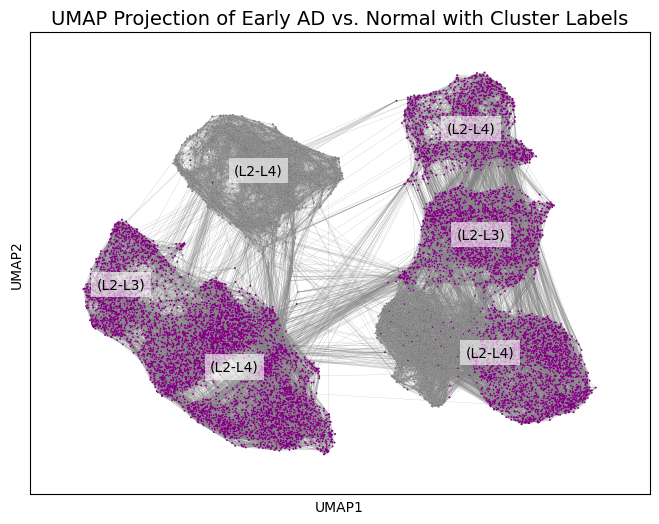

In [ ]:
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define colors for early AD (purple) and normal (grey)
condition_colors = {"Early": "#800080", "Normal": "#808080"}

# Ensure 'Status' is categorical
adata_excitatory_early.obs['Braak'] = adata_excitatory_early.obs['Braak'].astype('category')

# Compute top 2 Cell.Types per cluster
top_cell_types = {}
for cluster in adata_excitatory_early.obs['clusters'].unique():
    cell_counts = adata_excitatory_early.obs.loc[
        adata_excitatory_early.obs['clusters'] == cluster, 'Cell.Types'
    ].value_counts()

    # Get top 2 most frequent cell types
    top_label = cell_counts.index[0].split(' ')[1]

    #top_labels = cell_counts.index[:2].tolist()
    #top_cell_types[cluster] = "\n".join(top_labels)  # Join for multi-line label
    top_cell_types[cluster] = top_label

# Plot UMAP with cluster boundaries
fig, ax = plt.subplots(figsize=(8, 6))
sc.pl.umap(adata_excitatory_early, edges=True, show=False, ax=ax)

# Overlay early AD vs. normal without cluster number labels
sc.pl.umap(
    adata_excitatory_early,
    color="Braak",
    palette=condition_colors,
    edges=False,
    legend_loc=None,
    show=False,
    ax=ax
)

# Add cluster labels (top two cell types)
for cluster in adata_excitatory_early.obs['clusters'].unique():
    cluster_data = adata_excitatory_early[adata_excitatory_early.obs['clusters'] == cluster]

    # Compute cluster centroid for positioning text
    x, y = np.median(cluster_data.obsm['X_umap'], axis=0)

    # Place text label for the cluster
    ax.text(
        x, y, top_cell_types[cluster],
        fontsize=10, color='black', ha='center', va='center',
        bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')
    )

# Final formatting
ax.set_title("UMAP Projection of Early AD vs. Normal with Cluster Labels", fontsize=14)
plt.savefig("my_plot.png", transparent=True, dpi=300)
plt.gca().set_facecolor("none")  # Remove background inside the plot
plt.gcf().set_facecolor("none")  # Remove entire figure background
plt.show()

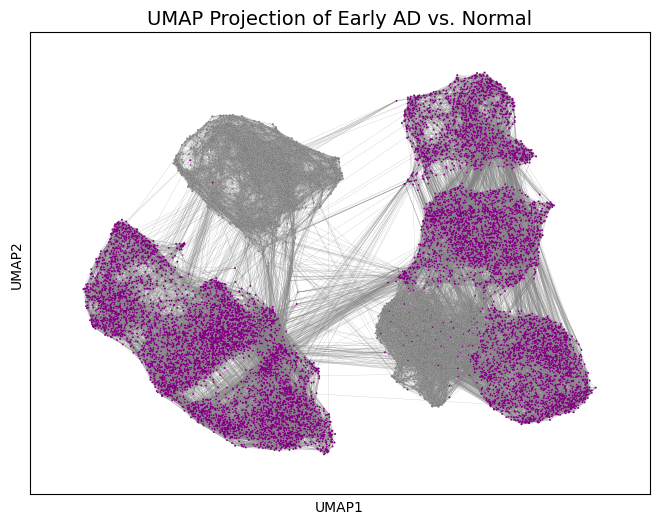

In [ ]:
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define colors for early AD (purple) and normal (grey)
condition_colors = {"Early": "#800080", "Normal": "#808080"}

# Ensure 'Status' is categorical
adata_excitatory_early.obs['Braak'] = adata_excitatory_early.obs['Braak'].astype('category')

# Plot UMAP with cluster boundaries
fig, ax = plt.subplots(figsize=(8, 6))
sc.pl.umap(adata_excitatory_early, edges=True, show=False, ax=ax)

# Overlay early AD vs. normal without cluster number labels
sc.pl.umap(
    adata_excitatory_early,
    color="Braak",
    palette=condition_colors,
    edges=False,
    legend_loc=None,
    show=False,
    ax=ax
)

# Final formatting
ax.set_title("UMAP Projection of Early AD vs. Normal", fontsize=14)
plt.savefig("my_plot.png", transparent=True, dpi=300)
plt.gca().set_facecolor("none")  # Remove background inside the plot
plt.gcf().set_facecolor("none")  # Remove entire figure background
plt.show()


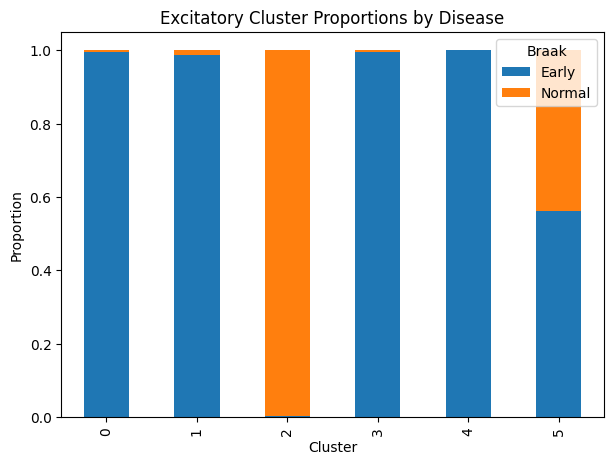

In [23]:
# Ratio
cluster_counts = pd.crosstab(adata_excitatory_early.obs['clusters'], adata_excitatory_early.obs['Braak'])
cluster_proportions = cluster_counts.div(cluster_counts.sum(axis=1), axis=0)

cluster_proportions.plot(kind='bar', stacked=True,figsize=(7,5))
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.title('Excitatory Cluster Proportions by Disease')
plt.show()

## Top ranked genes per cluster

It seems you use rank_genes_groups on the raw count data. Please logarithmize your data before calling rank_genes_groups.
/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:479: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


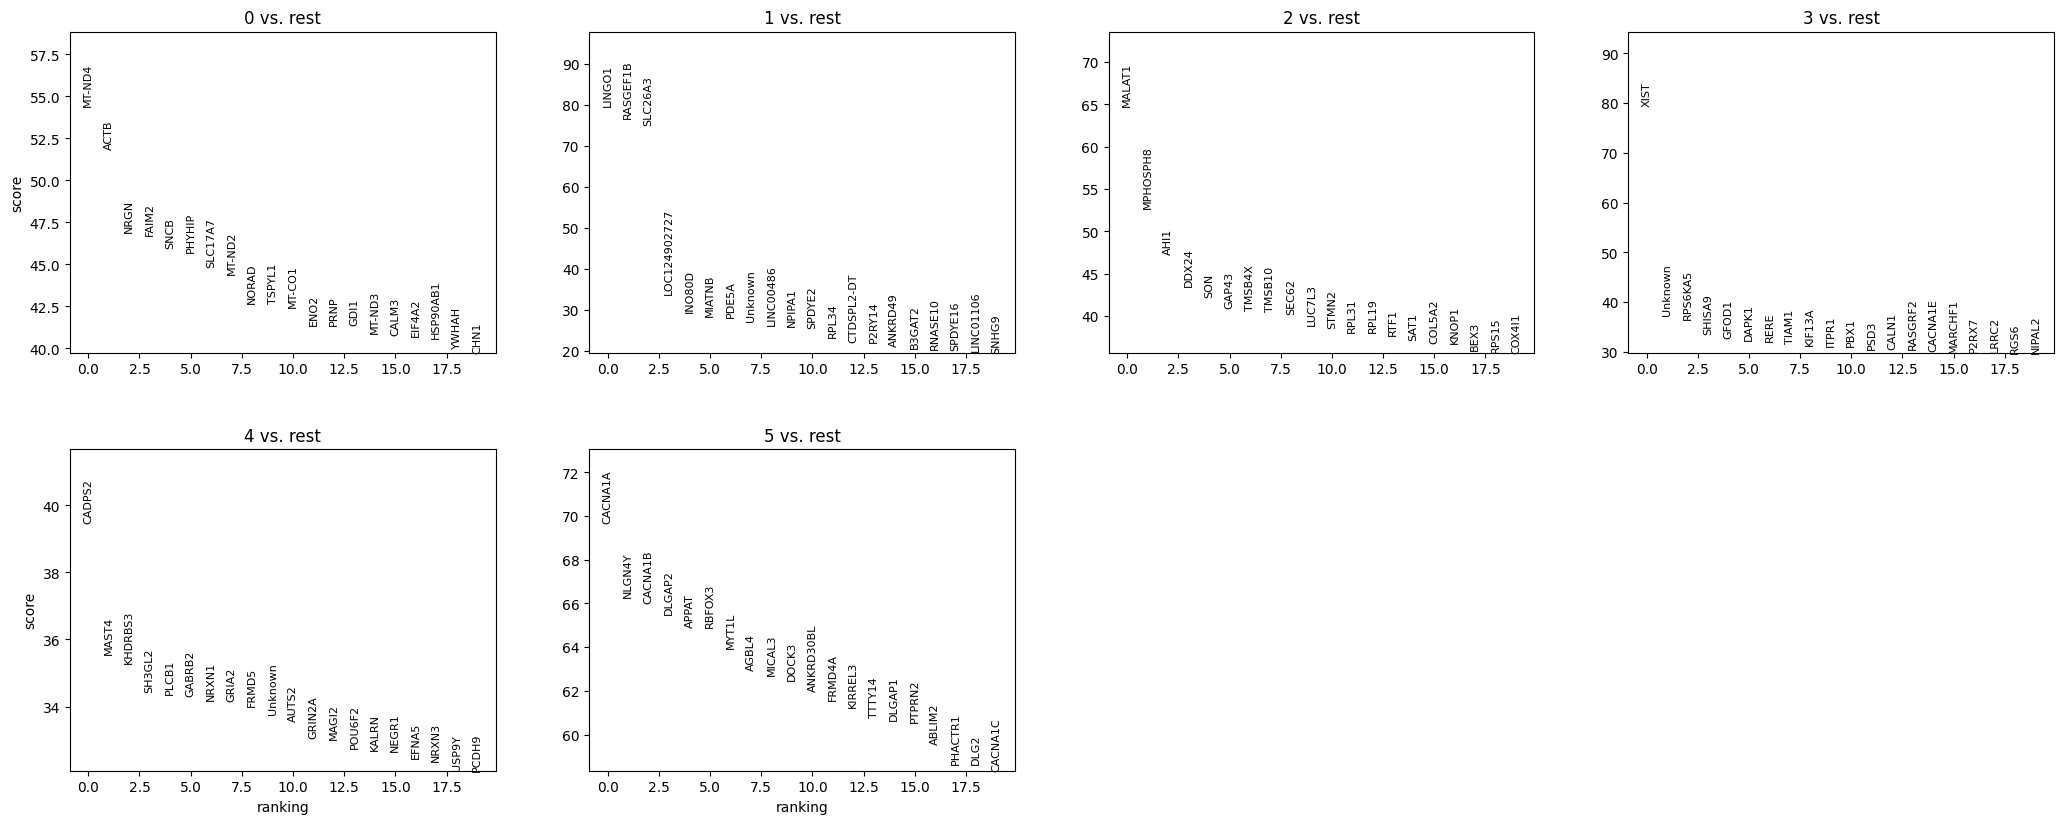

Top 20 Marker Genes for Each Cluster:
        Marker_1  Marker_2 Marker_3      Marker_4 Marker_5
Cluster                                                   
0         MT-ND4      ACTB     NRGN         FAIM2     SNCB
1         LINGO1  RASGEF1B  SLC26A3  LOC124902727   INO80D
2         MALAT1  MPHOSPH8     AHI1         DDX24      SON
3           XIST   Unknown  RPS6KA5        SHISA9    GFOD1
5        CACNA1A    NLGN4Y  CACNA1B        DLGAP2    APPAT
4         CADPS2     MAST4  KHDRBS3        SH3GL2    PLCB1


'\ncluster0: ENSG00000105501\nENSG00000086598\nENSG00000138495\nENSG00000197782\nENSG00000197451\nENSG00000123728\nENSG00000143486  ENSG00000072849\nENSG00000253535  ENSG00000206199  ENSG00000254420  ENSG00000186047  ENSG00000228655\nENSG00000149930  ENSG00000196670  ENSG00000177733  ENSG00000125870\nENSG00000146842\nENSG00000125991\nENSG00000100362  ENSG00000279712  ENSG00000251216  ENSG00000179097 ENSG00000249109\n12: ENSG00000108344\n ENSG00000285752\n ENSG00000116954\n'

In [ ]:
# Perform differential expression analysis to find marker genes
sc.tl.rank_genes_groups(adata_excitatory_early, 'clusters', method='t-test', n_genes=50)

# Extract gene names (Ensembl IDs) from the recarray
gene_names = adata_excitatory_early.uns['rank_genes_groups']['names']

# Check if gene_names is a structured NumPy array (recarray)
if isinstance(gene_names, np.recarray):
    for cluster in gene_names.dtype.names:  # Iterate through cluster names (columns)
        gene_names[cluster] = np.array([ensembl_to_symbol.get(gene, gene) for gene in gene_names[cluster]])

# Replace the modified gene names back into `rank_genes_groups`
adata_excitatory_early.uns['rank_genes_groups']['names'] = gene_names

# Plot ranked marker genes (optional visualization)
sc.pl.rank_genes_groups(adata_excitatory_early, n_genes=20, sharey=False)

# Extract the top 5 marker genes for each cluster
import pandas as pd

# Convert marker genes data into a pandas DataFrame
"""
marker_genes_df = pd.DataFrame({
    cluster: adata_excitatory_early.uns['rank_genes_groups']['names'][cluster][:5]
    for cluster in adata_excitatory_early.obs['clusters'].unique()
}).T
"""

marker_genes_df = pd.DataFrame({
    cluster: [ensembl_to_symbol.get(gene, gene) for gene in adata_excitatory_early.uns['rank_genes_groups']['names'][cluster][:5]]
    for cluster in adata_excitatory_early.obs['clusters'].unique()
}).T

marker_genes_df.columns = [f'Marker_{i+1}' for i in range(5)]
marker_genes_df.index.name = 'Cluster'

# Display the top 5 marker genes for each cluster
print("Top 20 Marker Genes for Each Cluster:")
print(marker_genes_df)

# Save marker genes to a CSV file
#marker_genes_df.to_csv('top_5_marker_genes_per_cluster_excitatory.csv')

"""
cluster0: ENSG00000105501
ENSG00000086598
ENSG00000138495
ENSG00000197782
ENSG00000197451
ENSG00000123728
ENSG00000143486  ENSG00000072849
ENSG00000253535  ENSG00000206199  ENSG00000254420  ENSG00000186047  ENSG00000228655
ENSG00000149930  ENSG00000196670  ENSG00000177733  ENSG00000125870
ENSG00000146842
ENSG00000125991
ENSG00000100362  ENSG00000279712  ENSG00000251216  ENSG00000179097 ENSG00000249109
12: ENSG00000108344
 ENSG00000285752
 ENSG00000116954
"""



# Prepare training and test dataset

## Concatenate Cell Attribute with Genes

In [24]:

adata_excitatory_early_gene_expression = pd.DataFrame(adata_excitatory_early.X.toarray(), columns=adata_excitatory_early.var_names)
# adata.obs: A pandas DataFrame containing metadata for the cells (rows in the expression matrix).
# This includes information such as the cell type, disease state, age, sex, and any other annotation that was recorded for each cell.
adata_excitatory_early_metadata = adata_excitatory_early.obs[['sex', 'disease', 'Braak', 'Cell.Types']]

# Concatenate Cell Attribute with Genes
adata_excitatory_early_dataset = pd.concat([adata_excitatory_early_metadata.reset_index(drop=True), adata_excitatory_early_gene_expression.reset_index(drop=True)], axis=1)
print(adata_excitatory_early.obs["Braak"].unique())

['Early', 'Normal']
Categories (2, object): ['Early', 'Normal']


In [25]:
print(adata_excitatory_early.obs["Cell.Types"].unique())

['Ex01_CUX2-LAMP5 (L2-L3)', 'Ex02_CUX2-COL5A2 (L2-L4)']
Categories (2, object): ['Ex01_CUX2-LAMP5 (L2-L3)', 'Ex02_CUX2-COL5A2 (L2-L4)']


## Scale & SMOTE
(Synthetic Minority Oversampling Technique).

In [30]:
os.environ["SCIPY_ARRAY_API"] = "1"
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Check the result
X_adata_excitatory_early = adata_excitatory_early_dataset.drop(columns=['sex', 'disease', 'Braak', 'Cell.Types'])

print(adata_excitatory_early_dataset['Braak'].unique())
y_adata_excitatory_early = adata_excitatory_early_dataset['Braak']

y_adata_excitatory_early = LabelEncoder().fit_transform(y_adata_excitatory_early)

# Scale the features
scaler = StandardScaler()
X_scaled_adata_excitatory_early = scaler.fit_transform(X_adata_excitatory_early)

# Split into training and testing sets
X_train_adata_excitatory_early, X_test_adata_excitatory_early, y_train_adata_excitatory_early, y_test_adata_excitatory_early = train_test_split(X_scaled_adata_excitatory_early, y_adata_excitatory_early, test_size=0.2, random_state=42)

"""
######### SMOTE to balance the data between early and advanced stages
# Apply SMOTE to balance the training data

# Check unique classes in y_train
unique_classes = np.unique(y_train_adata_excitatory_early)
print("Unique classes in y_train:", unique_classes)


smote = SMOTE(random_state=42)
X_train_adata_excitatory_early_balanced, y_train_adata_excitatory_early_balanced = smote.fit_resample(X_train_adata_excitatory_early, y_train_adata_excitatory_early)
print(f"Original class distribution: {dict(zip(*np.unique(X_train_adata_excitatory_early, return_counts=True)))}")
print(f"Balanced class distribution: {dict(zip(*np.unique(X_train_adata_excitatory_early_balanced, return_counts=True)))}")

X_test_adata_excitatory_early_balanced, y_test_adata_excitatory_early_balanced = smote.fit_resample(X_test_adata_excitatory_early, y_test_adata_excitatory_early)
print(f"Original class distribution: {dict(zip(*np.unique(y_test_adata_excitatory_early, return_counts=True)))}")
print(f"Balanced class distribution: {dict(zip(*np.unique(y_test_adata_excitatory_early_balanced, return_counts=True)))}")

##########
"""


['Early', 'Normal']
Categories (2, object): ['Early', 'Normal']


'\n######### SMOTE to balance the data between early and advanced stages\n# Apply SMOTE to balance the training data\n\n# Check unique classes in y_train\nunique_classes = np.unique(y_train_adata_excitatory_early)\nprint("Unique classes in y_train:", unique_classes)\n\n\nsmote = SMOTE(random_state=42)\nX_train_adata_excitatory_early_balanced, y_train_adata_excitatory_early_balanced = smote.fit_resample(X_train_adata_excitatory_early, y_train_adata_excitatory_early)\nprint(f"Original class distribution: {dict(zip(*np.unique(X_train_adata_excitatory_early, return_counts=True)))}")\nprint(f"Balanced class distribution: {dict(zip(*np.unique(X_train_adata_excitatory_early_balanced, return_counts=True)))}")\n\nX_test_adata_excitatory_early_balanced, y_test_adata_excitatory_early_balanced = smote.fit_resample(X_test_adata_excitatory_early, y_test_adata_excitatory_early)\nprint(f"Original class distribution: {dict(zip(*np.unique(y_test_adata_excitatory_early, return_counts=True)))}")\nprint(f"

# GNN + RFT


#### GNN Explanation
Graph Neural Network (GNN) model using PyTorch Geometric.


*   nodes (cells)
*   Node features: Gene expression data for each cell (stored in x).
*   Edge index: Connections between nodes (stored in edge_index).
*   To predict some property (e.g., disease state) for each node (cell) or the entire graph (group of cells).


Fine-tune a Graph Neural Network (GNN) model using a supervised learning process.

*   Leverage class weights to handle imbalanced datasets (e.g., more healthy cells than early AD cells).
*   Use a customizable loss function (in this case, cross-entropy with class weights) for training.
*   The GNN model (e.g., GeneGNN) being fine-tuned. This model predicts labels for each node (e.g., early AD vs. healthy).
*   Optimizer (e.g., Adam) to update the model parameters during training.
*   Previously, this was used for reinforcement learning. Here, it's replaced by a weighted loss function, but you could still use a custom reward mechanism if needed.
*   A tensor specifying the weight for each class (e.g., higher weight for underrepresented classes). These weights are used in the loss function to account for imbalanced datasets.
*   Weighted Loss Function: loss_fn = nn.CrossEntropyLoss(weight=self.class_weights) creates a cross-entropy loss function that incorporates the provided class weights. Why weighted loss? If one class (e.g., healthy cells) dominates the dataset, the model might ignore the minority class (e.g., early AD cells). Class weights penalize misclassification of minority classes more heavily.
*   Key features:
***   loss_fn = nn.CrossEntropyLoss(weight=self.class_weights)
Class weights are a way to handle class imbalance.
*   Why Use Weighted Loss Instead of Custom Reward?
In the original version, the reward_function computed metrics like AUC to guide training. However:
AUC is non-differentiable, making it unsuitable as a loss function.
Weighted cross-entropy directly adjusts for class imbalance and is differentiable.

Advantages of This Design
Handles Class Imbalance:
Improves model performance for minority classes.
Customizable:
You can swap the loss function or optimizer if needed.
Error Handling:
Gracefully skips problematic data points during training.
Explainability:
Logs training progress, making debugging easier.


#### Prepare input matrix

In [31]:
num_cells, num_genes = adata_excitatory_early.X.shape
num_labels = adata_excitatory_early.obs['Braak'].shape[0]
print(f"Number of cells: {num_cells}, Number of genes: {num_genes}, Number of labels: {num_labels}")
if num_cells != num_labels:
    print("Mismatch detected between feature matrix and labels!")
else:
    print("Feature matrix and labels are consistent.")


Number of cells: 16074, Number of genes: 33091, Number of labels: 16074
Feature matrix and labels are consistent.


In [33]:
import torch

# Extract gene expression matrix (convert to dense if sparse)
gene_expression_matrix = torch.tensor(adata_excitatory_early.X.toarray(), dtype=torch.float)


In [34]:
print(adata_excitatory_early.uns.keys())
print(adata_excitatory_early.uns['neighbors'].keys())
print(adata_excitatory_early.uns['neighbors']['connectivities_key'])

# Retrieve the connectivities key
connectivities_key = adata_excitatory_early.uns['neighbors']['connectivities_key']

# Access the connectivities matrix from obsp
connectivities_matrix = adata_excitatory_early.obsp[connectivities_key]

# Convert to COO format
adjacency_coo = connectivities_matrix.tocoo()

# Convert to PyTorch tensor for GNN
adjacency_matrix = torch.tensor(
    [adjacency_coo.row, adjacency_coo.col], dtype=torch.long
)

print(f"Adjacency matrix shape: {adjacency_matrix.shape}")


dict_keys(['citation', 'schema_reference', 'schema_version', 'title', 'log1p', 'pca', 'neighbors', 'umap', 'clusters', 'Cluster_Label_colors', 'sex_colors', 'Braak_colors', 'clusters_colors'])
dict_keys(['connectivities_key', 'distances_key', 'params'])
connectivities
Adjacency matrix shape: torch.Size([2, 351992])


/tmp/ipython-input-2441056075.py:15: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  adjacency_matrix = torch.tensor(


In [35]:
# Identify the column name for labels
label_column_name = 'Braak'

# Extract and process labels
labels = torch.tensor(
    adata_excitatory_early.obs[label_column_name].astype('category').cat.codes.values,
    dtype=torch.long
)

# Check dimensions
print(f"First few label names: {adata_excitatory_early.obs[label_column_name][:10]}")
print(f"Labels shape: {labels.shape}")
print(f"First few label #: {labels[:10]}")


First few label names: C0021_AAACCTGAGGGCTTCC-1    Early
C0021_AAACGGGAGCGTTGCC-1    Early
C0021_AAACGGGAGGGTTTCT-1    Early
C0021_AAACGGGGTCAATACC-1    Early
C0021_AAACGGGTCTTTCCTC-1    Early
C0021_AAAGATGTCGGCGCTA-1    Early
C0021_AAAGCAAAGAAGGACA-1    Early
C0021_AAAGTAGCACAGACTT-1    Early
C0021_AAAGTAGGTGCAGACA-1    Early
C0021_AAATGCCAGCCAGTTT-1    Early
Name: Braak, dtype: category
Categories (2, object): ['Early', 'Normal']
Labels shape: torch.Size([16074])
First few label #: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


## Compute pathway weight
using enrichment analysis and pathway-gene overlaps

In [36]:
from scipy.stats import hypergeom

def compute_pathway_weights(kegg_pathways, ad_genes, total_genes):
    """
    Compute weights for pathways based on enrichment with AD-related genes.

    Args:
        kegg_pathways (dict): Dictionary of pathways and their associated genes.
        ad_genes (list): List of known AD-related genes.
        total_genes (int): Total number of genes in the dataset.

    Returns:
        pathway_weights (dict): Pathway weights based on enrichment.
    """
    pathway_weights = {}

    for pathway, genes in pathwayid_genes_mapping.items():
        # Convert gene lists to sets for faster intersection
        pathway_genes = set(genes)
        ad_genes_set = set(ad_genes)

        # Compute overlap
        overlap = len(pathway_genes.intersection(ad_genes_set))
        pathway_size = len(pathway_genes)

        # Hypergeometric test
        p_value = hypergeom.sf(overlap - 1, total_genes, pathway_size, len(ad_genes_set))

        # Assign weight based on -log(p-value)
        if p_value > 0:  # Avoid log(0)
            weight = -np.log(p_value)
        else:
            weight = 0  # Minimal weight if no overlap

        pathway_weights[pathway] = weight

    return pathway_weights

"""
# Example usage
kegg_pathways = {
    "hsa05010": ["APOE", "MAPT", "PSEN1", "PSEN2"],
    "hsa04610": ["CLU", "TREM2", "BIN1"],
    "hsa04310": ["PSEN1", "PSEN2"],
}
"""
total_genes = 28358  # Total genes in the dataset

known_genes = ['C1QC', 'C1QB', 'PLCG2', 'TREM2', 'PSEN1', 'PSEN2', 'CAMK1D', 'DAPK1', 'GFAP', 'CCND3', 'GAPDH', 'ELMO1']
pathway_weights = compute_pathway_weights(pathwayid_genes_mapping, known_genes, total_genes)
print("Pathway Weights:", pathway_weights)


Pathway Weights: {'hsa01100': np.float64(-0.0), 'hsa01200': np.float64(-0.0), 'hsa01210': np.float64(-0.0), 'hsa01212': np.float64(-0.0), 'hsa01230': np.float64(-0.0), 'hsa01232': np.float64(-0.0), 'hsa01250': np.float64(-0.0), 'hsa01240': np.float64(-0.0), 'hsa01320': np.float64(-0.0), 'hsa00010': np.float64(3.1527728982672314), 'hsa00020': np.float64(-0.0), 'hsa00030': np.float64(-0.0), 'hsa00040': np.float64(-0.0), 'hsa00051': np.float64(-0.0), 'hsa00052': np.float64(-0.0), 'hsa00053': np.float64(-0.0), 'hsa00500': np.float64(-0.0), 'hsa00620': np.float64(-0.0), 'hsa00630': np.float64(-0.0), 'hsa00640': np.float64(-0.0), 'hsa00650': np.float64(-0.0), 'hsa00562': np.float64(3.011467892847022), 'hsa00190': np.float64(-0.0), 'hsa00910': np.float64(-0.0), 'hsa00920': np.float64(-0.0), 'hsa00061': np.float64(-0.0), 'hsa00062': np.float64(-0.0), 'hsa00071': np.float64(-0.0), 'hsa00100': np.float64(-0.0), 'hsa00120': np.float64(-0.0), 'hsa00140': np.float64(-0.0), 'hsa00561': np.float64(-0

## GNN + RFT

In [37]:
# Check the available metadata columns
print(adata_excitatory_early.obs.columns)

# Filter for cells labeled as "Braak early"
num_braak_early_cells = (adata_excitatory_early.obs['Braak'] == 'Early').sum()
print(num_braak_early_cells)

num_braak_normal_cells = (adata_excitatory_early.obs['Braak'] == 'Normal').sum()
print(num_braak_normal_cells)

Index(['nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age',
       'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_Exon', 'nFeature_Exon',
       'PMI', 'Braak', 'Sample.ID', 'Cell.Types', 'tissue_ontology_term_id',
       'assay_ontology_term_id', 'disease_ontology_term_id',
       'cell_type_ontology_term_id', 'development_stage_ontology_term_id',
       'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id',
       'is_primary_data', 'organism_ontology_term_id', 'donor_id',
       'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease',
       'organism', 'sex', 'tissue', 'self_reported_ethnicity',
       'development_stage', 'observation_joinid', 'clusters', 'Cluster_Label'],
      dtype='object')
12045
4029


In [38]:
import numpy as np
from collections import Counter

print("Original class distribution:", Counter(labels))

Original class distribution: Counter({tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0): 1, tensor(0):

In [41]:
print(torch.__version__)
# Install torch-geometric and required packages
# Automatically installs the correct wheels based on your PyTorch version
!pip install -q torch-scatter torch-sparse torch-cluster torch-spline-conv \
  -f https://data.pyg.org/whl/torch-2.6.0+cu124.html

!pip install -q torch-geometric


2.6.0+cu124
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 86.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 60.9 MB/s eta 0:00:00


Using device: cuda
model architecture:
GeneGNN(
  (conv1): GCNConv(33091, 64)
  (conv2): GCNConv(64, 64)
  (fc): Linear(in_features=64, out_features=2, bias=True)
)


/tmp/ipython-input-1738811222.py:167: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(gene_expression_matrix, dtype=torch.float).to(device)  # Move to CUDA
/tmp/ipython-input-1738811222.py:168: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  edge_index = torch.tensor(adjacency_matrix, dtype=torch.long).to(device)  # Move to CUDA
/tmp/ipython-input-1738811222.py:169: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(labels, dtype=torch.long).to(device)  # Move to CUDA


Creating data.batch manually...
Class weights: tensor([0.9000, 1.1250], device='cuda:0')
before calling RFTGeneAnalysis, marker_gene_indices
[6113, 31753, 20245, 14546, 13049, 10516, 13335, 27051, 16867, 21483, 12189, 6482]
12
gene_list_indices
['Unknown', 'TXNDC2', 'NDUFA9', 'Unknown', 'C6orf136', 'GADD45A', 'SPON1-AS1', 'EFCC1', 'Unknown', 'TMEM207', 'CD82', 'G2E3', 'GPR142', 'ITPA', 'MGMT', 'Unknown', 'NLRC5', 'Unknown', 'DBX2', 'WIPF2', 'KCTD4', 'OR4S2', 'KDR', 'Unknown', 'Unknown', 'Unknown', 'CPAP', 'MGAM', 'TNP2', 'Unknown', 'LINC01919', 'ZBTB26', 'WDR41', 'LINC02795', 'TRHDE', 'RAB11FIP4', 'MNX1', 'LINC01410', 'RLBP1', 'RASL10B', 'ZNF429', 'Unknown', 'GYPB', 'TMEM273', 'OLFML2B', 'GRXCR1', 'CDK16', 'Unknown', 'Unknown', 'SMARCAD1', 'MLF2', 'Unknown', 'PLPPR4', 'Unknown', 'ZNRF1', 'H2AC11', 'Unknown', 'LINC02204', 'SLC22A14', 'L3MBTL1', 'NOTCH2', 'ANKRD44', 'Unknown', 'FSCN1', 'LINC01732', 'BAP1', 'GDPD2', 'TNNI3K', 'ZNF7', 'HIBADH', 'NXF5', 'Unknown', 'TRDV3', 'SLC26A3', 'RPUSD

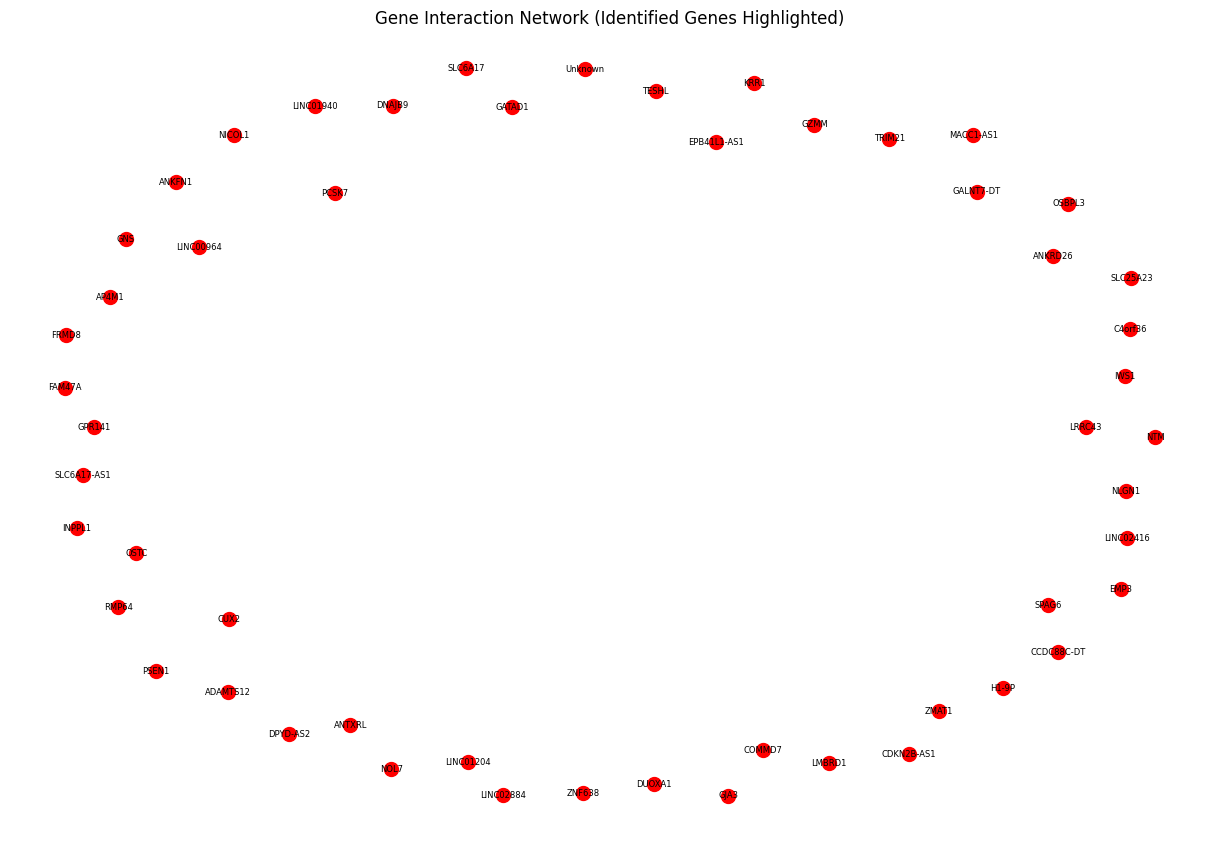

torch.Size([21681, 2])
Shape of predictions: torch.Size([21681, 2])
Binary AUC Score: 0.9679


In [42]:
from scipy.stats import hypergeom
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
import numpy as np
from sklearn.metrics import roc_auc_score
from functools import partial
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight
import scanpy as sc
from sklearn.metrics.pairwise import cosine_similarity

from torch_geometric.utils import to_networkx
import networkx as nx
import matplotlib.pyplot as plt


# Step 1: Check Device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

marker_importance_list = []
loss_list = []
auc_list = []
similarity_list = []
overlap_list = []
pathway_score_list = []


#Step 2: Define Reward Function with Pathway
def reward_function_with_pathway(predictions, targets, gene_importance_weights, gene_list_indices, marker_gene_indices, pathway_gene_sets, pathway_weights):
    """
    Compute reward for marker gene selection using classification performance, gene overlap, and pathway enrichment.
    """
    print('inside reward function with pathway')
    # 1. Classification Performance (AUC)
    probs = predictions.softmax(dim=1)[:, 1].detach().cpu().numpy()  # Class 1 probabilities
    targets = targets.detach().cpu().numpy()
    auc = roc_auc_score(targets, probs)

    # 2. Marker Gene Importance
    marker_weights = gene_importance_weights[marker_gene_indices]
    avg_marker_importance = marker_weights.mean()

    ######## transparentcy
    # Compute **cosine similarity** to known marker genes (partial credit)
    known_marker_vec = np.zeros(len(gene_list_indices))
    known_marker_vec[marker_gene_indices] = 1  # Binary vector of known markers

    predicted_importance_vec = gene_importance_weights
    similarity_score = cosine_similarity([predicted_importance_vec], [known_marker_vec])[0][0]  # Cosine similarity
    ######## end transparency


    """
    # Ensure input features track gradients
    data.x.requires_grad = True

    # Forward pass
    predictions = model(data.x, data.edge_index)

    # Compute loss
    loss = nn.CrossEntropyLoss()(predictions, data.y)

    # Backpropagate
    loss.backward()

    # Extract feature importance (gene importance based on input gradients)
    gene_importance_weights = data.x.grad.mean(dim=0).detach().cpu().numpy()  # Shape = (33091,)
    """

    # 3. Gene Overlap (Jaccard Index)
    gene_list_indices = np.array(gene_list_indices)  # Convert list to NumPy array
    #identified_genes = set(gene_list_indices[gene_importance_weights > 0.5])  # ✅ Works correctly
    identified_genes = {gene for gene, weight in zip(gene_list_indices, gene_importance_weights) if weight > avg_marker_importance}
    size = len(identified_genes)
    print(f"Number of identified genes: {size}")


    sorted_genes = sorted(
      zip(gene_list_indices, gene_importance_weights),  # Pair genes with importance scores
      key=lambda x: x[1],  # Sort by importance score
      reverse=True  # Highest values first
    )

    top_100_genes = [gene for gene, weight in sorted_genes[:100]]
    identified_genes_top50 = set(top_100_genes)
    size2 = len(identified_genes_top50)
    print(f"Number of identified top 50 genes: {size2}")


    overlapped_genes = identified_genes.intersection(known_genes)
    print("overlapped_genes:")
    print(overlapped_genes)
    overlap = len(overlapped_genes)
    overlap_score = overlap / len(marker_gene_indices) if len(marker_gene_indices) > 0 else 0

    # 4. Pathway Enrichment
    pathway_enrichment_score = 0
    for pathway, genes in pathway_gene_sets.items():
        overlap_count = len(identified_genes.intersection(genes))
        # The hypergeometric test evaluates whether the overlap between
        # identified_genes and genes is statistically significant, given the background gene set (gene_list_indices).
        # This approach is commonly used for gene set enrichment analysis (GSEA) to determine whether a list of differentially
        # expressed genes is significantly associated with known biological pathways
        # The hypergeometric test is a statistical test used to determine whether a particular subset of items is overrepresented in a
        # larger population. In bioinformatics, it is often used for gene set enrichment analysis (GSEA) to check if a set of identified genes
        # is significantly enriched in a given biological category (e.g., a pathway or disease-related genes).
        # If p_value is small (e.g., < 0.05 or < 0.01), the overlap is statistically significant, meaning the identified genes are enriched in the predefined gene set.
        # The hypergeometric survival function (sf) calculates the probability of observing at least overlap_count overlapping genes or more by chance.
        p_value = hypergeom.sf(overlap_count - 1, len(gene_list_indices), len(genes), len(identified_genes))
        if p_value < 1:
            print("significant pathways:")
            print(p_value)
            print(pathway)
            print(genes)
            pathway_enrichment_score += pathway_weights.get(pathway, 1.0)


    ###### transparentcy
    # **Debugging: Print key scoring components**
    print(f"AUC: {auc:.4f}, Marker Importance: {avg_marker_importance * 10000000}, Overlap Score: {overlap_score}, Pathway Score: {pathway_enrichment_score}, Similarity Score: {similarity_score}")

    marker_importance_list.append(avg_marker_importance)
    auc_list.append(auc)
    similarity_list.append(similarity_score)
    overlap_list.append(overlap)
    pathway_score_list.append(pathway_enrichment_score)

    reward = auc + avg_marker_importance * 100000000 + overlap_score + pathway_enrichment_score + (0.2 * similarity_score) * 100
    #reward = avg_marker_importance * 100000000
    #reward = auc

    """
    # Add similarity score **only if direct overlap is low**
    if overlap_score < 0.2:  # Only encourage similar genes if overlap is small
        reward += (0.2 * similarity_score)

    # **New Reward Function with Partial Credit**
    #reward = auc + avg_marker_importance + overlap_score + pathway_enrichment_score + (0.5 * similarity_score)
    """
    ######## end transparency


    #return torch.tensor(reward, requires_grad=True, dtype=torch.float)
    #return torch.tensor(reward, requires_grad=True, dtype=torch.float), identified_genes
    return torch.tensor(reward, requires_grad=True, dtype=torch.float), identified_genes_top50

# Step 3: Define Graph Neural Network (GNN)
class GeneGNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GeneGNN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index).relu()
        x = self.fc(x)  # Output logits for each node
        return x

# Step 4: Prepare Graph Data
def prepare_graph_data(gene_expression_matrix, adjacency_matrix, labels):
    x = torch.tensor(gene_expression_matrix, dtype=torch.float).to(device)  # Move to CUDA
    edge_index = torch.tensor(adjacency_matrix, dtype=torch.long).to(device)  # Move to CUDA
    y = torch.tensor(labels, dtype=torch.long).to(device)  # Move to CUDA
    data = Data(x=x, edge_index=edge_index, y=y)

    if not hasattr(data, 'batch') or data.batch is None:
        print("Creating data.batch manually...")
        data.batch = torch.zeros(data.x.shape[0], dtype=torch.long).to(device)  # Move to CUDA

    return data

# Step 5: Define RFT for Fine-Tuning
class RFTGeneAnalysis:
    def __init__(self, model, optimizer, reward_function, class_weights):
        self.model = model.to(device)  # Move model to CUDA
        self.optimizer = optimizer
        self.reward_function = reward_function
        self.class_weights = class_weights.to(device)  # Move class weights to CUDA

    def fine_tune(self, data, epochs):
        loss_fn = nn.CrossEntropyLoss(weight=self.class_weights)
        for epoch in range(epochs):

            """
            ####### call fine-tuning with updated weights
            # 🛠 **CALL THE REWARD FUNCTION**
            with torch.no_grad():  # Prevent gradient tracking
                gene_importance_weights = self.model.fc.weight.detach().cpu().numpy().flatten()
                reward = self.reward_function(
                    predictions,
                    data.y
                )
                print(f"Reward at Epoch {epoch + 1}: {reward.item()}")  # Debugging
            """

            # Extract Gene-Level Importance
            data.x.requires_grad = True  # Enable gradients

            self.optimizer.zero_grad()
            predictions = self.model(data.x, data.edge_index)  # Forward pass
            try:
                # Ensure both tensors are on the same device
                loss = loss_fn(predictions, data.y)  # Compute loss
            except ValueError as e:
                print(f"Error in reward calculation at epoch {epoch + 1}: {str(e)}")
                continue
            loss.backward(retain_graph=True)  # Backpropagate

            # Extract feature importance (gradients from input layer)
            with torch.no_grad():
                if data.x.grad is not None:  # Check before using mean()
                    gene_importance_weights = data.x.grad.mean(dim=0).detach().cpu().numpy()
                else:
                    print("Warning: data.x.grad is None. Ensure requires_grad=True is set before forward pass.")
                    gene_importance_weights = np.zeros(data.x.shape[1])  # Default to zero if gradients are missing

                #gene_importance_weights = data.x.grad.mean(dim=0).detach().cpu().numpy()  # Shape = (33,091,)

                # Call the Reward Function with Correct Gene Importance Weights
                # reward = self.reward_function(
                reward, identified_genes = self.reward_function(
                    predictions,
                    data.y,
                    gene_importance_weights=gene_importance_weights,
                    gene_list_indices = gene_list_indices, marker_gene_indices= marker_gene_indices,
                    pathway_gene_sets=pathway_gene_sets, pathway_weights=pathway_weights
                )
                reward = reward.detach()

            print(f"Reward at Epoch {epoch + 1}: {reward.item()}")  # Debugging


            # Combine loss and reward (negative sign to encourage maximization)
            final_loss = loss - reward  # **Maximize reward while minimizing loss**
            final_loss.backward()
            #########


            self.optimizer.step()
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}")

        #return identified_genes
        return identified_genes


# Step 3: Define GNN Visualization Function
def visualize_identified_gene_graph(data, identified_genes, gene_list_indices):
    """
    Visualizes the subgraph of identified genes from the GNN model.

    Args:
    - data (torch_geometric.data.Data): Graph data containing nodes (genes) and edges.
    - identified_genes (set): Set of identified gene indices.
    - gene_list_indices (list): List mapping index to gene names.

    Returns:
    - Displays the gene interaction network with highlighted identified genes.
    """
    print("Visualizing Identified Gene Network...")

    # Convert PyTorch Geometric Graph to NetworkX
    G = to_networkx(data, to_undirected=True)

    # Map node indices to gene names
    #gene_labels = {i: gene_list_indices[i] for i in range(len(gene_list_indices))}

    # Convert identified gene names back to indices (only those present in the graph)
    identified_gene_indices = [gene_list_indices.index(gene) for gene in identified_genes if gene in gene_list_indices and gene_list_indices.index(gene) in G]

    # Create a subgraph for identified genes
    subgraph = G.subgraph(identified_gene_indices)

    """
    # Draw the full graph in light gray
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, node_size=10, node_color="lightgray", edge_color="lightgray", alpha=0.3, with_labels=False)
    """

    # Increase figure size for better visibility
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(subgraph, seed=42, k=1.5)  # 🔹 Adjust `k` to spread nodes

    # If subgraph is empty, show a warning
    if len(subgraph.nodes()) == 0:
        print("⚠ Warning: No identified genes are present in the graph!")
        return

    # Draw the identified genes in red
    #FIX: Filter `gene_labels` to match only `subgraph` nodes
    gene_labels = {node: gene_list_indices[node] for node in subgraph.nodes()}

    print(f"Total nodes in full graph: {len(G.nodes())}")
    print(f"Total edges in full graph: {len(G.edges())}")
    print(f"Identified gene indices: {identified_gene_indices}")
    print(f"Nodes in subgraph: {list(subgraph.nodes())}")
    print(f"Edges in subgraph: {list(subgraph.edges())}")

    # Ensure `pos` is not empty
    if not pos:
        print("⚠ Warning: No node positions computed. Check node connectivity.")
        return

    # Draw the nodes first
    nx.draw(subgraph, pos, node_size=100, node_color="red", with_labels=True, labels=gene_labels, font_size=6)

    # Explicitly draw edges (fix missing edges)
    nx.draw_networkx_edges(subgraph, pos, edge_color="black", alpha=0.5, width=1.2)


    plt.title("Gene Interaction Network (Identified Genes Highlighted)")
    plt.show()


# Step 6: Prepare Data and Compute Class Weights
input_dim = num_genes  # Number of genes (features)
hidden_dim = 64
output_dim = 2  # Binary classification (early AD vs. healthy)

try:
    model = GeneGNN(input_dim, hidden_dim, output_dim).to(device)  # Move model to CUDA
    print('model architecture:')
    print(model)
    #optimizer = optim.Adam(model.parameters(), lr=0.001)
    optimizer = optim.Adam(model.parameters(), lr=0.0005)

    # Apply SMOTE to balance the dataset
    if isinstance(gene_expression_matrix, torch.Tensor):
        gene_expression_matrix = gene_expression_matrix.detach().cpu().numpy()
    if isinstance(labels, torch.Tensor):
        labels = labels.detach().cpu().numpy()

    smote = SMOTE(sampling_strategy=0.8)
    X_resampled, y_resampled = smote.fit_resample(gene_expression_matrix, labels)

    gene_expression_matrix_resampled = torch.tensor(X_resampled, dtype=torch.float).to(device)
    labels_resampled = torch.tensor(y_resampled, dtype=torch.long).to(device)

    data = prepare_graph_data(
        gene_expression_matrix_resampled, adjacency_matrix, labels_resampled
    )

    # Compute Class Weights
    classes = np.array([0, 1])
    class_weights = compute_class_weight("balanced", classes=classes, y=labels_resampled.cpu().numpy())
    class_weights_tensor = torch.tensor(class_weights, dtype=torch.float).to(device)  # Move to CUDA
    print(f"Class weights: {class_weights_tensor}")

    # Step 7: Prepare Parameters for `reward_function_with_pathway`
    gene_importance_weights = model.fc.weight.detach().cpu().numpy().flatten()
    #gene_list_indices = list(range(X_train_adata_excitatory_early.shape[1]))
    gene_list_indices = list(ensembl_to_symbol.values())
    marker_gene_indices = [gene_list_indices.index(gene) for gene in known_genes if gene in gene_list_indices]
    print('before calling RFTGeneAnalysis, marker_gene_indices')
    print(marker_gene_indices)
    print(len(marker_gene_indices))
    print('gene_list_indices')
    print(gene_list_indices)
    print(len(gene_list_indices))
    pathway_gene_sets = {
        pathway: [gene_list_indices.index(gene) for gene in genes if gene in gene_list_indices]
        for pathway, genes in pathwayid_genes_mapping.items()
    }
    """
    pathway_weights = {
        "Alzheimer's Disease Pathway": 1.5,
        "Oxidative Stress Response": 1.2,
        "Cell Cycle Regulation": 1.0,
        "Generic Pathway": 0.8
    }
    """

    # Step 8: Use `functools.partial` to Pass Parameters into Reward Function
    reward_function_partial = partial(
        reward_function_with_pathway,
        #gene_importance_weights=gene_importance_weights,
        gene_list_indices=gene_list_indices,
        marker_gene_indices=marker_gene_indices,
        #pathway_gene_sets=pathway_gene_sets,
        pathway_gene_sets=pathwayid_genes_mapping,
        pathway_weights=pathway_weights
    )

    # Step 9: Fine-Tune with Reinforcement Learning
    rft = RFTGeneAnalysis(
        model=model,
        optimizer=optimizer,
        reward_function=reward_function_partial,
        #reward_function=reward_function_with_pathway,
        class_weights=class_weights_tensor
    )
    identified_genes = rft.fine_tune(data, epochs=10)

    visualize_identified_gene_graph(data, identified_genes, gene_list_indices)


    # Step 10: Evaluate Model Performance
    model.eval()
    with torch.no_grad():
        predictions = model(data.x, data.edge_index)
        print(predictions.shape)
        probs = predictions.softmax(dim=1)[:, 1].detach().cpu().numpy()  # Class 1 probabilities

        print(f"Shape of predictions: {predictions.shape}")

        targets = data.y.cpu().numpy()
        auc_score = roc_auc_score(targets, probs)
        print(f"Binary AUC Score: {auc_score:.4f}")

except Exception as e:
    print("An unexpected error occurred:", str(e))
    raise e


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx

# Convert PyG Graph to NetworkX
G = to_networkx(data, to_undirected=True)

# Extract Identified Marker Genes
identified_gene_indices = [
    gene_list_indices.index(gene) for gene in identified_genes
    if gene in gene_list_indices and gene_list_indices.index(gene) in G.nodes
]

# Create a Subgraph of Identified Genes
subgraph = G.subgraph(identified_gene_indices)

# Ensure Identified Genes Exist in the Graph
if len(subgraph.nodes) == 0:
    print("⚠ Warning: No identified genes found in the graph!")
else:
    # Compute Layout Positions for the Entire Graph (before subsetting)
    pos = nx.spring_layout(G, seed=42, k=2.0)

    # Extract Subgraph Positions Only
    subgraph_pos = {node: pos[node] for node in subgraph.nodes}

    # Plot Full Graph in Light Gray
    plt.figure(figsize=(10, 8))
    nx.draw(G, pos, node_size=10, node_color="lightgray", edge_color="lightgray", alpha=0.3, with_labels=False)

    # Highlight Identified Marker Genes (Subgraph)
    nx.draw(subgraph, subgraph_pos, node_size=100, node_color="red", edge_color="black", alpha=0.8, width=1.5,
            with_labels=True, font_size=6)

    plt.title("GNN-RL Gene Selection: Reinforcement Learning Optimized Marker Genes")
    plt.show()


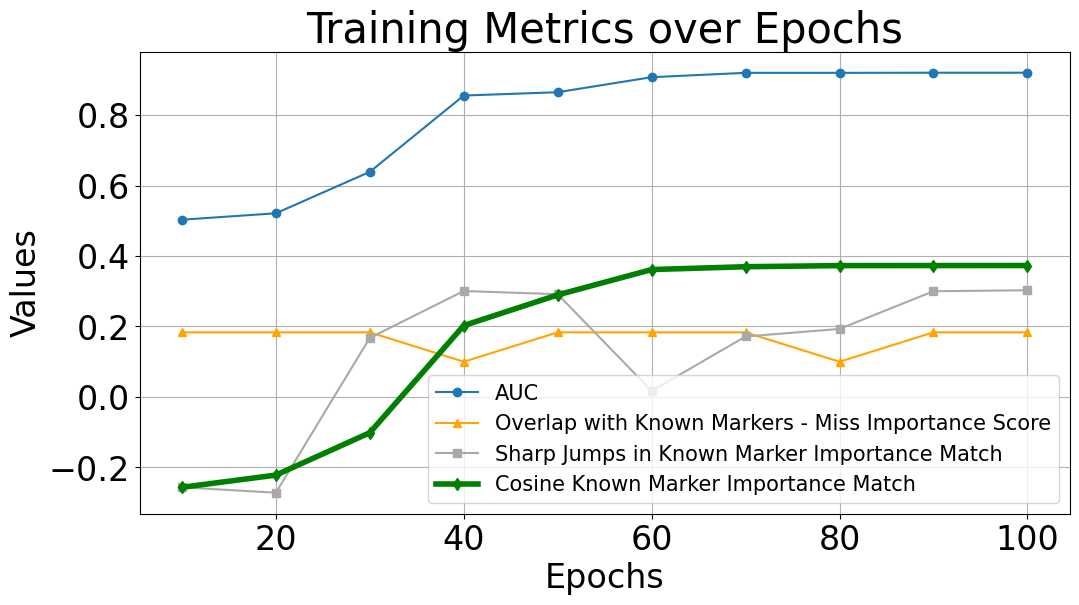

In [ ]:
"""
epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
auc_list = [0.6570, 0.9596, 0.8630, 0.9858, 0.9703, 0.9870, 0.9922, 0.9896, 0.9923, 0.9703]
marker_importance = [-0.050197628276293926, -0.21032722230529544, 0.055799991294236406, 0.3513804358590278, -0.05027439797800071, -0.5594803553776728, -0.6461178259087319, -0.19099719139603621, 0.3648934665534398, 0.3780431612199209]
overlap = [0.96, 0.96, 0.6, 0.52, 0.72, 0.92, 1.04, 0.88, 0.84, 0.88]
pathway = [0]
similarity = [-0.007974200733909816, -0.011882881192648295, 0.002526300083792332, 0.011292815174162966, -0.0020102648575133753, -0.01267357751452956, -0.01308095074514906, -0.005798249940665752, 0.012392228210814326, 0.012348963134497353]
loss = [0.6883, 0.5903, 0.7756, 0.5240, 0.5969, 0.4701, 0.4170, 0.4446, 0.3541, 0.3087]
"""
epochs = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
#auc_list = [0.5031, 0.5213, 0.6389, 0.7025, 0.7395, 0.8376, 0.8586, 0.8963, 0.9190, 0.9200]
auc_list = [0.5031, 0.5213, 0.6389, 0.8555, 0.8650, 0.9076, 0.9200, 0.9200, 0.9203, 0.9203]
#marker_importance = [-0.002796036457919371, -0.014804553138958454, 0.01024577311881103, 0.048253254725239, 0.022158157531038114, -0.03085671274050128, -0.052448090315238005, -0.03416312566173474, 0.0029271160495447646, 0.03259717853818256]
marker_importance = [-0.0025646492450704566, -0.0027184696225181033, 0.0016763705433317192, 0.003007324884539788, 0.0029161545961128867, 0.0001700005993804764, 0.0017159693692983856, 0.0019306046167301763, 0.0030008440470088133, 0.0030282303371266347]
marker_importance = [x * 100 for x in marker_importance]
#overlap = [0.5833333333333334, 0.5833333333333334, 0.5833333333333334, 0.5, 0.5833333333333334, 0.5833333333333334, 0.5833333333333334, 0.5, 0.6666666666666666, 0.6666666666666666]
overlap = [0.1833333333333334, 0.1833333333333334, 0.1833333333333334, 0.1, 0.1833333333333334, 0.1833333333333334, 0.1833333333333334, 0.1, 0.1833333333333334, 0.1833333333333334]
pathway = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#similarity = [-0.0025646492450704566, -0.0027184696225181033, 0.0016763705433317192, 0.003007324884539788, 0.0029161545961128867, 0.0001700005993804764, 0.0017159693692983856, 0.0019306046167301763, 0.0037008440470088133, 0.0037282303371266347]
similarity = [-0.0025646492450704566, -0.0022184696225181033, -0.0010148440470088133, 0.0020263705433317192, 0.0028963705433457183, 0.0036161545961128867, 0.0036961545968768832, 0.0037282303371266347, 0.003729324884593872, 0.003730324884539788]
similarity = [x * 100 for x in similarity]
reward = [-0.027960363775491714, -0.14804552495479584, 0.10245773196220398, 0.4825325608253479, 0.2215815782546997, -0.3085671365261078, -0.5244808793067932, -0.3416312634944916, 0.029271161183714867, 0.3559717833995819]
loss = [0.6931, 0.6791, 0.8743, 0.6066, 0.7145, 0.6538, 0.5785, 0.5978, 0.5927, 0.5507]

"""
{'C1QC', 'GFAP', 'TREM2', 'CAMK1D', 'DAPK1', 'C1QB', 'PSEN2'}
{'GAPDH', 'C1QC', 'GFAP', 'TREM2', 'CAMK1D', 'C1QB', 'PSEN2'}
{'GAPDH', 'C1QC', 'TREM2', 'CAMK1D', 'C1QB', 'PSEN2', 'PSEN1'}
{'TREM2', 'ELMO1', 'CCND3', 'C1QB', 'GAPDH', 'PSEN1'}
{'GAPDH', 'TREM2', 'ELMO1', 'CCND3', 'C1QB', 'PSEN2', 'PSEN1'}
{'GAPDH', 'C1QC', 'GFAP', 'TREM2', 'CAMK1D', 'PSEN2', 'PSEN1'}
{'GAPDH', 'C1QC', 'GFAP', 'TREM2', 'CAMK1D', 'PSEN2', 'PSEN1'}
{'GAPDH', 'GFAP', 'TREM2', 'CAMK1D', 'PSEN2', 'PSEN1'}
{'GAPDH', 'C1QC', 'GFAP', 'TREM2', 'CAMK1D', 'C1QB', 'PSEN2', 'PSEN1'}
{'GAPDH', 'C1QC', 'TREM2', 'ELMO1', 'CAMK1D', 'C1QB', 'PSEN2', 'PSEN1'}
"""

# Plot
plt.figure(figsize=(12, 6))
plt.plot(epochs, auc_list, marker='o', label='AUC')
plt.plot(epochs, overlap, marker='^', color='orange', label='Overlap with Known Markers - Miss Importance Score')
plt.plot(epochs, marker_importance, marker='s', color='darkgrey', label='Sharp Jumps in Known Marker Importance Match')
plt.plot(epochs, similarity, marker='d', color='green', lw=4, label='Cosine Known Marker Importance Match')
#plt.plot(epochs, loss, marker='x', label='Loss')

# Labels and Legend
plt.xlabel('Epochs', fontsize=24)
plt.ylabel('Values', fontsize=24)
plt.title('Training Metrics over Epochs', fontsize=30)
plt.legend(fontsize=15, loc='lower right')
plt.grid(True)

plt.xticks(fontsize=24)  # Adjust x-axis tick font size
plt.yticks(fontsize=24)  # Adjust y-axis tick font size
# Show plot
plt.savefig("my_plot.png", transparent=True, dpi=300)
plt.gca().set_facecolor("none")  # Remove background inside the plot
plt.gcf().set_facecolor("none")  # Remove entire figure background
plt.show()


Identified gene indices: [17678, 17099, 13953, 6066, 8615, 25054, 14820, 6276, 9197, 8542, 21620, 15076, 28875, 6424, 26473, 12786, 17894, 17431, 6084, 15775, 12022, 9181, 17228, 27683, 10085, 1137, 14067, 8176, 11724, 12813, 7886, 693, 26757, 10191, 31992, 11616, 20380, 32461, 32596, 17816, 2781, 26470, 31722, 8861, 0, 2294, 17276, 24853, 14489, 22151, 13171, 27036, 17501, 16421, 4536, 5529, 4864, 18784, 18634, 15564, 8914, 11536, 14540, 32945, 2360, 30632, 20329, 3814, 26013, 12948, 25089, 15942, 6862, 4696, 15290, 28494, 11818, 10034, 12910, 10342, 24042, 1554, 23219, 16514, 31606, 10199, 21740, 28097, 2131, 7008, 4272, 29423, 20276]


## Graph illustration

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx

# Convert PyG Graph to NetworkX
G = to_networkx(data, to_undirected=True)

# Extract Identified Marker Genes
identified_gene_indices = [
    gene_list_indices.index(gene) for gene in identified_genes
    if gene in gene_list_indices and gene_list_indices.index(gene) in G
]

# Create a Subgraph of Identified Genes
subgraph = G.subgraph(identified_gene_indices)

# Layout for Graph Visualization
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(subgraph, seed=42, k=2.0)  # Spread nodes for clarity

# Draw full graph in light gray
nx.draw(G, pos, node_size=10, node_color="lightgray", edge_color="lightgray", alpha=0.3, with_labels=False)

# Highlight Identified Marker Genes
nx.draw(subgraph, pos, node_size=100, node_color="red", edge_color="black", alpha=0.8, width=1.5, with_labels=True, font_size=6)

plt.title("GNN-RL Gene Selection: Reinforcement Learning Optimized Marker Genes")
plt.show()


In [ ]:
gene_list_indices = list(ensembl_to_symbol.values())
print(identified_genes)
identified_genes_names = [gene_list_indices.index(gene) for gene in identified_genes if gene in gene_list_indices]
print(identified_genes_names)

{'HS3ST3A1', 'LINC02108', 'LOC105374901', 'TENM1', 'SLC26A4', 'LINC01259', 'GLB1', 'GPR101', 'RGN', 'KBTBD12', 'LINC02136', 'FAM78B', 'SPATC1L', 'PAOX', 'RAB30', 'F10', 'ESYT3', 'ASCC2', 'ARMC5', 'GAR1', 'LINC00951', 'TOX2', 'SYT2', 'HSD11B2', 'SANBR', 'LINC00648', 'COLGALT2', 'H1-9P', 'MYH10', 'TMEM11-DT', 'CABIN1', 'ACKR4', 'EXOSC2', 'UBE3D', 'CHRD', 'CDKN2A', 'UNC13D', 'KSR1', 'SPATS2L', 'LAD1', 'CTTN-DT', 'CYTL1', 'LINC02577', 'CDC42EP1', 'TRIO', 'ESYT1', 'KCNQ5', 'OTOA', 'GTF2A1-AS1', 'OTUD7B', 'MDFIC2', 'LENG9', 'SLC45A1', 'SLC35E4', 'LAMA3', 'GALNT7-DT', 'DIRC3', 'LINC02168', 'TNFSF9', 'PCDHB4', 'LOC101928708', 'XRCC5', 'GLYATL2', 'LOC124909401', 'ELAPOR1', 'RMND1', 'ZDHHC1', 'METTL1', 'Unknown', 'CCR2', 'NPPA', 'MNS1', 'COPE', 'STIMATE', 'E2F8', 'PRSS55', 'TRIM5', 'SCAT1'}
[11062, 3039, 27564, 3067, 10151, 331, 17626, 21086, 20770, 11699, 30940, 25891, 20956, 3037, 19753, 24579, 32139, 8911, 8210, 18212, 24410, 32206, 14842, 1848, 19257, 2880, 1197, 18890, 14361, 32663, 3841, 3

In [ ]:
symbol_list = list(ensembl_to_symbol.values())
print(symbol_list)

['Unknown', 'TXNDC2', 'NDUFA9', 'Unknown', 'C6orf136', 'GADD45A', 'SPON1-AS1', 'EFCC1', 'Unknown', 'TMEM207', 'CD82', 'G2E3', 'GPR142', 'ITPA', 'MGMT', 'Unknown', 'NLRC5', 'Unknown', 'DBX2', 'WIPF2', 'KCTD4', 'OR4S2', 'KDR', 'Unknown', 'Unknown', 'Unknown', 'CPAP', 'MGAM', 'TNP2', 'Unknown', 'LINC01919', 'ZBTB26', 'WDR41', 'LINC02795', 'TRHDE', 'RAB11FIP4', 'MNX1', 'LINC01410', 'RLBP1', 'RASL10B', 'ZNF429', 'Unknown', 'GYPB', 'TMEM273', 'OLFML2B', 'GRXCR1', 'CDK16', 'Unknown', 'Unknown', 'SMARCAD1', 'MLF2', 'Unknown', 'PLPPR4', 'Unknown', 'ZNRF1', 'H2AC11', 'Unknown', 'LINC02204', 'SLC22A14', 'L3MBTL1', 'NOTCH2', 'ANKRD44', 'Unknown', 'FSCN1', 'LINC01732', 'BAP1', 'GDPD2', 'TNNI3K', 'ZNF7', 'HIBADH', 'NXF5', 'Unknown', 'TRDV3', 'SLC26A3', 'RPUSD1', 'C16orf87', 'IGKV1-37', 'IGLVVI-22-1', 'Unknown', 'ZNF786', 'SMAD1', 'SAMD5', 'Unknown', 'RFC2', 'Unknown', 'Unknown', 'Unknown', 'RPS6KA2-AS1', 'ABCC8', 'Unknown', 'Unknown', 'RRS1-DT', 'ABLIM3', 'ABHD17B', 'MIR202HG', 'RPP40', 'CYSLTR2', '

In [ ]:
gene_list = list(adata_excitatory_early.var_names)
print(gene_list)
print(len(gene_list))

['ENSG00000278915', 'ENSG00000168454', 'ENSG00000139180', 'ENSG00000229177', 'ENSG00000204564', 'ENSG00000116717', 'ENSG00000254418', 'ENSG00000114654', 'ENSG00000257894', 'ENSG00000198398', 'ENSG00000085117', 'ENSG00000092140', 'ENSG00000257008', 'ENSG00000125877', 'ENSG00000170430', 'ENSG00000231662', 'ENSG00000140853', 'ENSG00000261198', 'ENSG00000185610', 'ENSG00000171475', 'ENSG00000180332', 'ENSG00000174982', 'ENSG00000128052', 'ENSG00000272564', 'ENSG00000270000', 'ENSG00000267683', 'ENSG00000151849', 'ENSG00000257335', 'ENSG00000178279', 'ENSG00000251665', 'ENSG00000263438', 'ENSG00000171448', 'ENSG00000164253', 'ENSG00000285210', 'ENSG00000072657', 'ENSG00000131242', 'ENSG00000130675', 'ENSG00000238113', 'ENSG00000140522', 'ENSG00000270885', 'ENSG00000197013', 'ENSG00000249776', 'ENSG00000250361', 'ENSG00000204161', 'ENSG00000162745', 'ENSG00000215203', 'ENSG00000102225', 'ENSG00000256250', 'ENSG00000247121', 'ENSG00000163104', 'ENSG00000089693', 'ENSG00000282772', 'ENSG000001

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(targets, (probs > 0.5).astype(int)))  # Use 0.5 as the threshold

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7382
           1       1.00      1.00      1.00      5905

    accuracy                           1.00     13287
   macro avg       1.00      1.00      1.00     13287
weighted avg       1.00      1.00      1.00     13287



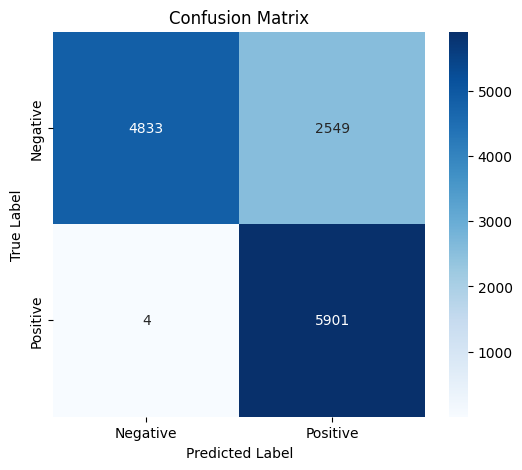

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(targets, (probs > 0.5).astype(int))

# Plot as a heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


## Select top genes

In [ ]:
# Enable gradients for the input
data.x.requires_grad = True

# Perform a forward pass
predictions = model(data.x, data.edge_index)

# Compute loss
loss_fn = nn.CrossEntropyLoss()
loss = loss_fn(predictions, data.y)

# Backward pass to calculate gradients
loss.backward()

# Extract gradients for each gene
gene_gradients = data.x.grad  # Shape: (num_cells, num_genes)

# Aggregate gradients across all samples (e.g., by mean)
mean_gradients = gene_gradients.abs().mean(dim=0).detach().cpu().numpy()
print(mean_gradients)

# Rank genes by importance
top_gene_indices = mean_gradients.argsort()[::-1]  # Indices of genes sorted by importance
print(f"Top marker genes (indices): {top_gene_indices[:20]}")

# Step 1: Extract gene names (Ensembl IDs) from AnnData
gene_names = adata_excitatory_early.var.index.tolist()  # List of gene Ensembl IDs

# Step 2: Convert Ensembl IDs to Gene Symbols using `ensembl_to_symbol`
top_gene_names = []
for i in top_gene_indices[:50]:
    ensembl_id = gene_names[i]
    gene_symbol = ensembl_to_symbol.get(ensembl_id, ensembl_id)  # Default to Ensembl ID if not found
    top_gene_names.append((ensembl_id, gene_symbol, mean_gradients[i]))

# Step 3: Print Top Marker Genes with Ensembl ID & Symbol
print("\nTop 10 Marker Genes with Importance Scores:")
top_gene_IDs = []
top_gene_symbols = []
for ensembl_id, gene_symbol, importance in top_gene_names:
    top_gene_IDs.append(ensembl_id)
    top_gene_symbols.append(gene_symbol)
    print(f"{ensembl_id} ({gene_symbol}): {importance}")

print(top_gene_IDs)
print(top_gene_symbols)


[5.2171267e-06 6.2547178e-07 3.1913740e-07 ... 4.1764531e-07 3.8512994e-07
 1.7840318e-06]
Top marker genes (indices): [20319 19752 26621 32568 14496 23263  2961 18260  1823   906 23359 16205
 20422 32358 16725 21716 22771 22049  5536  6656]

Top 10 Marker Genes with Importance Scores:
ENSG00000173080 (RXFP4): 1.9293875084258616e-05
ENSG00000273295 (Unknown): 1.9128014173475094e-05
ENSG00000255427 (LINC02707): 1.904826785903424e-05
ENSG00000170923 (OR7G2): 1.8731714590103365e-05
ENSG00000228830 (Unknown): 1.8714887119131163e-05
ENSG00000250821 (EXOC1L): 1.8619923139340244e-05
ENSG00000232598 (Unknown): 1.8600132534629665e-05
ENSG00000198851 (CD3E): 1.851982597145252e-05
ENSG00000238131 (LINC02854): 1.8256079783895984e-05
ENSG00000112818 (MEP1A): 1.8145052308682352e-05
ENSG00000108242 (CYP2C18): 1.814094684959855e-05
ENSG00000269296 (Unknown): 1.8074970284942538e-05
ENSG00000262874 (C19orf84): 1.7931921320268884e-05
ENSG00000263096 (Unknown): 1.784641972335521e-05
ENSG00000260458 (KCNJ1

### Identify list of genes

## Each gene varience

<ipython-input-27-f4408bbb82c2>:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=variance_df, x='Gene', y='Variance', palette="Blues")


[{'query': 'ENSG00000223554', '_id': 'ENSG00000223554', '_score': 32.864956}, {'query': 'ENSG00000255599', 'notfound': True}, {'query': 'ENSG00000175315', '_id': '1474', '_score': 32.864956, 'symbol': 'CST6'}, {'query': 'ENSG00000224397', '_id': '100506115', '_score': 32.864956, 'symbol': 'PELATON'}, {'query': 'ENSG00000256577', '_id': '101929384', '_score': 32.864956, 'symbol': 'SLC6A12-AS1'}, {'query': 'ENSG00000267238', '_id': 'ENSG00000267238', '_score': 32.864956}, {'query': 'ENSG00000185662', '_id': '644994', '_score': 32.864956, 'symbol': 'SMIM23'}, {'query': 'ENSG00000222033', '_id': '440925', '_score': 32.864956, 'symbol': 'LINC01124'}, {'query': 'ENSG00000268366', '_id': 'ENSG00000268366', '_score': 32.864956, 'symbol': 'SERTAD3-AS1'}, {'query': 'ENSG00000183640', '_id': '337879', '_score': 32.864956, 'symbol': 'KRTAP8-1'}, {'query': 'ENSG00000104826', '_id': '3972', '_score': 32.864956, 'symbol': 'LHB'}, {'query': 'ENSG00000255727', '_id': 'ENSG00000255727', '_score': 32.864

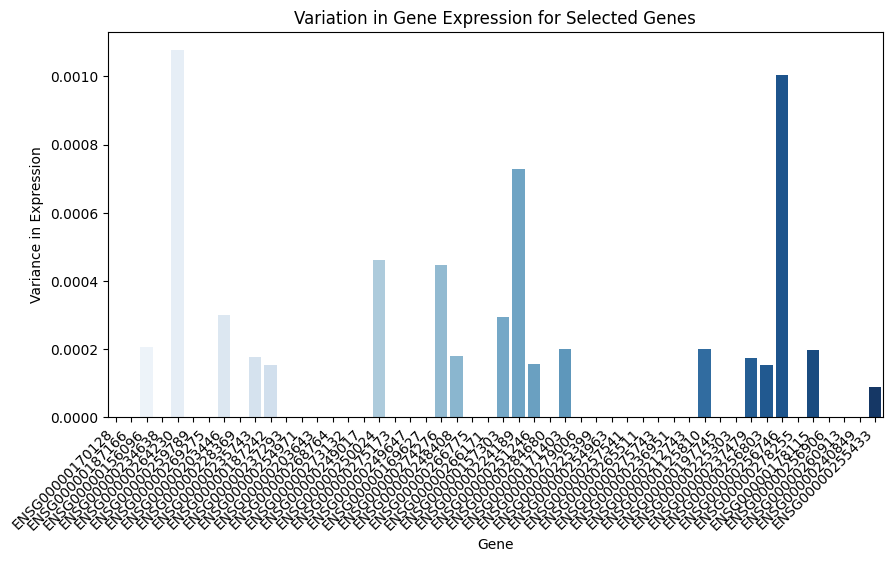

               Gene  Variance
0   ENSG00000170128  0.000000
1   ENSG00000187166  0.000000
2   ENSG00000156096  0.000207
3   ENSG00000234638  0.000000
4   ENSG00000264230  0.001077
5   ENSG00000259789  0.000000
6   ENSG00000269275  0.000000
7   ENSG00000203446  0.000299
8   ENSG00000228369  0.000000
9   ENSG00000235743  0.000177
10  ENSG00000187242  0.000152
11  ENSG00000237293  0.000000
12  ENSG00000254971  0.000000
13  ENSG00000203643  0.000000
14  ENSG00000268764  0.000000
15  ENSG00000273132  0.000000
16  ENSG00000249017  0.000000
17  ENSG00000250024  0.000462
18  ENSG00000275173  0.000000
19  ENSG00000249647  0.000000
20  ENSG00000169627  0.000000
21  ENSG00000274276  0.000448
22  ENSG00000248408  0.000178
23  ENSG00000266775  0.000000
24  ENSG00000266171  0.000000
25  ENSG00000157303  0.000295
26  ENSG00000224189  0.000729
27  ENSG00000251246  0.000156
28  ENSG00000284680  0.000000
29  ENSG00000171403  0.000200
30  ENSG00000279006  0.000000
31  ENSG00000225399  0.000000
32  ENSG00

In [ ]:
# Load your dataset (Modify the file path if necessary)
# adata_excitatory_raw = sc.read_h5ad("your_file.h5ad")  # Load AnnData object

# Define the list of Ensembl IDs to check variation for
"""
# top 10 genes with high importance score
gene_list_auc_top10 = [
    'ENSG00000228201', 'ENSG00000255737', 'ENSG00000260528', 'ENSG00000236206',
    'ENSG00000230989', 'ENSG00000228701', 'ENSG00000163608', 'ENSG00000171403',
    'ENSG00000254445', 'ENSG00000228323'
]
"""
# genes with statistical significance
gene_list_auc_top50 = ['ENSG00000255599', 'ENSG00000244545', 'ENSG00000229011', 'ENSG00000253749', 'ENSG00000223554',
             'ENSG00000267238', 'ENSG00000274937', 'ENSG00000225417', 'ENSG00000265163', 'ENSG00000222033',
             'ENSG00000261206', 'ENSG00000254964', 'ENSG00000104826', 'ENSG00000268366', 'ENSG00000253871',
             'ENSG00000260148', 'ENSG00000255727', 'ENSG00000248990', 'ENSG00000273132', 'ENSG00000248962',
             'ENSG00000170920', 'ENSG00000225226', 'ENSG00000284837', 'ENSG00000135220', 'ENSG00000260057',
             'ENSG00000165655', 'ENSG00000198129', 'ENSG00000183640', 'ENSG00000257761', 'ENSG00000259182',
             'ENSG00000258555', 'ENSG00000139800', 'ENSG00000278546', 'ENSG00000236336', 'ENSG00000284680',
             'ENSG00000175315', 'ENSG00000185662', 'ENSG00000253424', 'ENSG00000265933', 'ENSG00000248872',
             'ENSG00000266013', 'ENSG00000251371', 'ENSG00000197233', 'ENSG00000256577', 'ENSG00000260617',
             'ENSG00000183310', 'ENSG00000125823', 'ENSG00000233906', 'ENSG00000227421', 'ENSG00000276119']

gene_list_reward_top10 = ['ENSG00000223554', 'ENSG00000255599', 'ENSG00000175315', 'ENSG00000224397',
                           'ENSG00000256577', 'ENSG00000267238', 'ENSG00000185662', 'ENSG00000222033',
                           'ENSG00000268366', 'ENSG00000183640']

gene_list_reward_top50 = ['ENSG00000223554', 'ENSG00000255599', 'ENSG00000175315', 'ENSG00000224397', 'ENSG00000256577',
                          'ENSG00000267238', 'ENSG00000185662', 'ENSG00000222033', 'ENSG00000268366', 'ENSG00000183640',
                          'ENSG00000104826', 'ENSG00000255727', 'ENSG00000274937', 'ENSG00000132693', 'ENSG00000135220',
                          'ENSG00000111537', 'ENSG00000267407', 'ENSG00000261206', 'ENSG00000254632', 'ENSG00000223643',
                          'ENSG00000273132', 'ENSG00000165655', 'ENSG00000270114', 'ENSG00000232909', 'ENSG00000267090',
                          'ENSG00000265246', 'ENSG00000253871', 'ENSG00000235840', 'ENSG00000260532', 'ENSG00000214797',
                          'ENSG00000177186', 'ENSG00000273513', 'ENSG00000204632', 'ENSG00000139800', 'ENSG00000231529',
                          'ENSG00000253424', 'ENSG00000238224', 'ENSG00000148136', 'ENSG00000265163', 'ENSG00000234789',
                          'ENSG00000229011', 'ENSG00000260148', 'ENSG00000248842', 'ENSG00000251371', 'ENSG00000233417',
                          'ENSG00000264177', 'ENSG00000198129', 'ENSG00000254964', 'ENSG00000258555', 'ENSG00000255332']

gene_list_reward_top20 = ['ENSG00000223554', 'ENSG00000255599', 'ENSG00000175315', 'ENSG00000224397', 'ENSG00000256577', 'ENSG00000267238', 'ENSG00000185662', 'ENSG00000222033', 'ENSG00000268366', 'ENSG00000183640', 'ENSG00000104826', 'ENSG00000255727', 'ENSG00000274937', 'ENSG00000132693', 'ENSG00000135220', 'ENSG00000111537', 'ENSG00000267407', 'ENSG00000261206', 'ENSG00000254632', 'ENSG00000223643']

gene_list_reward_final_top50 = ['ENSG00000163599', 'ENSG00000248962', 'ENSG00000230483', 'ENSG00000170128', 'ENSG00000265664', 'ENSG00000284695', 'ENSG00000225243', 'ENSG00000230176', 'ENSG00000182346', 'ENSG00000224659', 'ENSG00000254164', 'ENSG00000239906', 'ENSG00000236336', 'ENSG00000261319', 'ENSG00000254651', 'ENSG00000125823', 'ENSG00000228655', 'ENSG00000197233', 'ENSG00000261206', 'ENSG00000260057', 'ENSG00000230970', 'ENSG00000261821', 'ENSG00000254804', 'ENSG00000223554', 'ENSG00000224286', 'ENSG00000275516', 'ENSG00000265681', 'ENSG00000231626', 'ENSG00000274937', 'ENSG00000249460', 'ENSG00000242396', 'ENSG00000265163', 'ENSG00000281386', 'ENSG00000274447', 'ENSG00000185372', 'ENSG00000259731', 'ENSG00000225226', 'ENSG00000240849', 'ENSG00000255599', 'ENSG00000248943', 'ENSG00000254964', 'ENSG00000253409', 'ENSG00000240871', 'ENSG00000261637', 'ENSG00000270114', 'ENSG00000140478', 'ENSG00000232035', 'ENSG00000254129', 'ENSG00000172772', 'ENSG00000165370']

gene_list_reward_feb14_top50 = ['ENSG00000170128', 'ENSG00000187166', 'ENSG00000156096', 'ENSG00000234638', 'ENSG00000264230', 'ENSG00000259789', 'ENSG00000269275', 'ENSG00000203446', 'ENSG00000228369', 'ENSG00000235743', 'ENSG00000187242', 'ENSG00000237293', 'ENSG00000254971', 'ENSG00000203643', 'ENSG00000268764', 'ENSG00000273132', 'ENSG00000249017', 'ENSG00000250024', 'ENSG00000275173', 'ENSG00000249647', 'ENSG00000169627', 'ENSG00000274276', 'ENSG00000248408', 'ENSG00000266775', 'ENSG00000266171', 'ENSG00000157303', 'ENSG00000224189', 'ENSG00000251246', 'ENSG00000284680', 'ENSG00000171403', 'ENSG00000279006', 'ENSG00000225399', 'ENSG00000254963', 'ENSG00000257541', 'ENSG00000265511', 'ENSG00000275743', 'ENSG00000236951', 'ENSG00000212743', 'ENSG00000125810', 'ENSG00000197745', 'ENSG00000225303', 'ENSG00000237479', 'ENSG00000256803', 'ENSG00000256746', 'ENSG00000278255', 'ENSG00000178115', 'ENSG00000256906', 'ENSG00000260913', 'ENSG00000240849', 'ENSG00000255433']

gene_list_reward_feb22_female_lay23__auc_top50 = ['ENSG00000282478', 'ENSG00000174358', 'ENSG00000182372', 'ENSG00000179580', 'ENSG00000249171', 'ENSG00000233403', 'ENSG00000186468', 'ENSG00000271993', 'ENSG00000188691', 'ENSG00000271897', 'ENSG00000275401', 'ENSG00000135114', 'ENSG00000240403', 'ENSG00000268756', 'ENSG00000230920', 'ENSG00000188324', 'ENSG00000100296', 'ENSG00000167930', 'ENSG00000236545', 'ENSG00000260135', 'ENSG00000273270', 'ENSG00000111199', 'ENSG00000133110', 'ENSG00000225535', 'ENSG00000113739', 'ENSG00000229021', 'ENSG00000263041', 'ENSG00000229263', 'ENSG00000162825', 'ENSG00000263331', 'ENSG00000263990', 'ENSG00000126746', 'ENSG00000257096', 'ENSG00000260694', 'ENSG00000262772', 'ENSG00000167332', 'ENSG00000235533', 'ENSG00000115363', 'ENSG00000264174', 'ENSG00000272338', 'ENSG00000259508', 'ENSG00000261318', 'ENSG00000109083', 'ENSG00000228577', 'ENSG00000272825', 'ENSG00000261218', 'ENSG00000171169', 'ENSG00000248545', 'ENSG00000116031', 'ENSG00000018610']


# Query MyGeneInfo to get gene symbols
query_result = mg.querymany(gene_list_reward_top50, scopes='ensembl.gene', fields='symbol', species='human')
print(query_result)

# Ensure the genes exist in the dataset
genes_available = [gene for gene in gene_list_reward_feb14_top50 if gene in adata_excitatory_early.var_names]

if not genes_available:
    raise ValueError("None of the requested genes were found in the dataset!")

# Subset the AnnData object to only selected genes
adata_subset = adata_excitatory_early[:, genes_available]

# Convert sparse matrix to dense format if necessary
if isinstance(adata_subset.X, np.ndarray):
    X_dense = adata_subset.X
else:
    X_dense = adata_subset.X.toarray()

# Create a DataFrame with gene expression values
gene_expression_df = pd.DataFrame(X_dense, columns=genes_available)

# Compute variance for each gene
  gene_variance = gene_expression_df.var(axis=0)

# Convert variance to a DataFrame for visualization
variance_df = gene_variance.reset_index()
variance_df.columns = ['Gene', 'Variance']

# Plot gene expression variation
plt.figure(figsize=(10, 5))
sns.barplot(data=variance_df, x='Gene', y='Variance', palette="Blues")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Variance in Expression")
plt.xlabel("Gene")
plt.title("Variation in Gene Expression for Selected Genes")
plt.show()

# Print variance table
print(variance_df)

## top genes pathyways identification

In [ ]:
!pip install gseapy
import gseapy as gp


#cluster_list = ['CYTB', 'ATP6', 'ND3', 'COX3', 'COX2']
#coef_advanced_female_mtg_gene_list = ['THBS3-AS1', 'FOXD4', 'LINC02857', 'UBAP1', 'ECT2L', 'AGBL5-IT1', 'GNB4', 'NKX6-3', 'LRIT1']
# advanced_female_mtg_gene_coef_list = ['THBS3-AS1', 'FOXD4', 'LINC02857', 'UBAP1', 'ECT2L', 'AGBL5-IT1', 'GNB4', 'NKX6-3', 'LRIT1']
#GNN_list = ['RNASE6', 'LINC01785', 'H3C13', 'PDE3A-AS1', 'SULT1E1', 'ROPN1']
"""
# statistically significant genes
logis_list = ['ZNF429', 'MLF2', 'ZNRF1', 'SLC26A3', 'ADISSP', 'LY6H', 'DNHD1', 'FAM171B', 'LMBR1L', 'FAM184B', 'LINC02102',
              'ZNF384', 'NTN4', 'SFPQ', 'FKBP8', 'PNPLA2', 'FBLN7', 'CBR1', 'H1-10', 'NEFL']
# top 10 genes
logis_list = ['AGAP2-AS1', 'LINC02193', 'HSBP1', 'TNKS2-DT', 'NEPRO', 'KRT9','HSPB2-C11orf52', 'MYADM-AS1']
"""
# [ToDo] why unknown genes??
GNN_RFT_AUC_top50_list = ['LINC01038', 'CDRT8', 'LINC01124', 'LINC00561', 'LHB', 'SERTAD3-AS1', 'LOC101929488', 'CPNE2-DT', 'LINC01489',
                'LINC02758', 'LOC124901427', 'OR7G3', 'LINC01795', 'LOC339166', 'UGT2A3', 'LINC01571', 'ZNF503', 'DEFB107B',
                'KRTAP8-1', 'LOC124902964', 'LOC124903564', 'SPECC1L-ADORA2A', 'ZIC5', 'CDYL-AS1', 'OR8B2', 'CST6', 'SMIM23',
                'LINC00668', 'LINC02431', 'LINC02079', 'OR1J2', 'SLC6A12-AS1', 'OR2T34', 'CSTL1', 'LINC01724', 'OR13C2']

GNN_RFT_AUC_top10_list = ['GPR25', 'TRGV3', 'OR7G3', 'LOC124903564']

GNN_RFT_Reward_top10_list = ['CST6', 'PELATON', 'SLC6A12-AS1', 'SMIM23', 'LINC01124', 'SERTAD3-AS1', 'KRTAP8-1']

GNN_RFT_Reward_top50_list = ['CST6', 'PELATON', 'SLC6A12-AS1', 'SMIM23', 'LINC01124', 'SERTAD3-AS1', 'KRTAP8-1', 'LHB',
                             'LINC01489', 'CRP', 'UGT2A3', 'IFNG', 'LINC02841', 'LINC00561', 'LOC124901427', 'ZNF503',
                             'LOC124903956', 'LOC101929488', 'OR2M7', 'TBC1D3K', 'HLA-G', 'ZIC5', 'LINC02779',
                             'OR13C4', 'CDRT8', 'LINC01038', 'CPNE2-DT', 'DEFB107B', 'SPECC1L-ADORA2A', 'LINC02756']

GNN_RFT_Reward_top20_list = ['CST6', 'PELATON', 'SLC6A12-AS1', 'SMIM23', 'LINC01124', 'SERTAD3-AS1', 'KRTAP8-1', 'LHB',
                             'LINC01489', 'CRP', 'UGT2A3', 'IFNG', 'LINC02841', 'LINC00561']

GNN_RFT_Reward_final_top50_list = ['CTLA4', 'Unknown', 'Unknown', 'GPR25', 'Unknown', 'Unknown', 'Unknown', 'LINC01433', 'DAOA', 'GAGE12J', 'Unknown', 'Unknown', 'CDYL-AS1', 'LINC02152', 'Unknown', 'CSTL1', 'Unknown', 'OR1J2', 'LINC00561', 'LINC01571', 'HHATL-AS1', 'Unknown', 'Unknown', 'Unknown', 'LINC01142', 'Unknown', 'RPL17', 'Unknown', 'Unknown', 'LINC02500', 'Unknown', 'CDRT8', 'Unknown', 'LOC105372253', 'OR2V1', 'Unknown', 'LINC01795', 'PEDS1', 'Unknown', 'Unknown', 'Unknown', 'TRBV7-4', 'KRTAP4-7', 'LINC02127', 'Unknown', 'GOLGA6D', 'Unknown', 'Unknown', 'OR10W1', 'GPR101']

GNN_RFT_Reward_feb14_top50_list = ['GPR25', 'H1-7', 'UGT2B4', 'Unknown', 'ANXA8L1', 'Unknown', 'Unknown', 'SUGCT-AS1', 'TXNDC12-AS1', 'Unknown', 'KRT12', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'LOC124901427', 'Unknown', 'Unknown', 'LOC105371757', 'LINC02900', 'BOLA2B', 'LOC102724560', 'LINC02469', 'Unknown', 'Unknown', 'SUSD3', 'HAGLR', 'EFNA4-EFNA3', 'OR8B2', 'KRT9', 'Unknown', 'Unknown', 'Unknown', 'LINC02403', 'Unknown', 'TRBV14', 'LOC102725532', 'LINC02656', 'CD93', 'SCGB1D4', 'Unknown', 'LOC105373876', 'Unknown', 'MADD-AS1', 'Unknown', 'GOLGA8Q', 'LINC02419', 'LINC01254', 'PEDS1', 'LINC02735']

GNN_RFT_Reward_feb16_top50_list = ['C1RL-AS1', 'CEP290', 'HEATR3', 'KCNB1', 'SLC19A4P', 'OR5M9', 'MSN', 'LARS2-AS1', 'BMP3', 'SLTM', 'ETAA1', 'LOC124909376', 'SGCE', 'LINC02256', 'LINC02265', 'UBL5', 'SETD9', 'GRIPAP1', 'CASK', 'SPRR4', 'INO80B-WBP1', 'PPP6R1', 'CCDC120', 'HTR2A-AS1', 'LINC01310', 'INAFM1', 'LOC107984475', 'HBA2', 'ICOSLG', 'ENHO', 'MACROD2-AS1', 'ZNF471', 'PBX3', 'B3GNT6', 'HNRNPL', 'LOC101926907', 'MRAP2', 'TREML2', 'VWDE', 'HTR6', 'PATJ-DT', 'RFX7', 'RELB', 'HOXB5', 'Unknown', 'MAPKBP1', 'LOC107984322', 'SECTM1', 'FAM41C', 'MRPS9-AS2', 'GFER', 'SLC66A2', 'SELENBP1', 'UPF1', 'HSPB7', 'MTTP', 'RIPK1', 'CT47A2', 'FURIN', 'SYNJ2', 'ZNF776', 'LINC01147', 'UBE2D3-AS1', 'C6orf120', 'CHIT1', 'PLGRKT', 'PARP3', 'CLIC4', 'TNFRSF21', 'OR11A1', 'KBTBD4', 'ADAMTSL3', 'FAM110A', 'LSM14B', 'INHBA', 'MSL1', 'ARK2N', 'NSMCE1-DT', 'EMILIN2', 'CETN3', 'ZNNT1', 'KIF1C', 'IGHV3-69-1', 'TLCD2', 'PPIAL4G', 'STX8', 'YBX2', 'OLIG2', 'MITF', 'LINC01915', 'ID2', 'LASP1', 'PSMA4']

#['ENSG00000164458', 'ENSG00000253527', 'ENSG00000130559', 'ENSG00000235538', 'ENSG00000188089', 'ENSG00000176399', 'ENSG00000142632', 'ENSG00000227253', 'ENSG00000229937', 'ENSG00000260122', 'ENSG00000244239', 'ENSG00000235058', 'ENSG00000206187', 'ENSG00000100427', 'ENSG00000240868', 'ENSG00000261266', 'ENSG00000196344', 'ENSG00000279467', 'ENSG00000135249', 'ENSG00000214770', 'ENSG00000282925', 'ENSG00000263382', 'ENSG00000266774', 'ENSG00000137842', 'ENSG00000277863', 'ENSG00000237498', 'ENSG00000263683', 'ENSG00000176438', 'ENSG00000259069', 'ENSG00000256717', 'ENSG00000169885', 'ENSG00000172955', 'ENSG00000231185', 'ENSG00000105198', 'ENSG00000227848', 'ENSG00000224532', 'ENSG00000165509', 'ENSG00000233912', 'ENSG00000281196', 'ENSG00000161634', 'ENSG00000179023', 'ENSG00000198324', 'ENSG00000261793', 'ENSG00000249513', 'ENSG00000133475', 'ENSG00000253266', 'ENSG00000259073', 'ENSG00000258453', 'ENSG00000231678', 'ENSG00000128313']
#GNN_RFT_Reward_feb16_top50_list = ['TBXT', 'Unknown', 'CAMSAP1', 'LOC124901499', 'PLA2G4E', 'DMRTA1', 'ARHGEF19', 'Unknown', 'PRPS1L1', 'Unknown', 'ICA1-AS1', 'ZMYND10-AS1', 'LINC02346', 'MLC1', 'C1QTNF9-AS1', 'Unknown', 'ADH7', 'Unknown', 'RINT1', 'Unknown', 'Unknown', 'LOC105372035', 'Unknown', 'TMEM62', 'Unknown', 'Unknown', 'Unknown', 'SYNE3', 'Unknown', 'LINC02698', 'CALML6', 'ADH6', 'LINC01844', 'LGALS13', 'SUCLA2-AS1', 'Unknown', 'MAGEC3', 'Unknown', 'LINC00934', 'DCD', 'KLHDC7A', 'PHETA1', 'Unknown', 'Unknown', 'GGT2P', 'Unknown', 'FOXN3-AS2', 'OR11H2', 'Unknown', 'APOL5']


GNN_RFT_Reward_feb16_female_top50_list = ['PAX3', 'PSME3IP1', 'RPS6KA3', 'KRBOX4', 'LINC03104', 'STYXL1', 'PELI3', 'COLQ', 'HINT3', 'RELL1', 'CLGN', 'CASZ1', 'TMEM183A', 'FTO', 'PAFAH1B1', 'GADD45GIP1', 'LOC105371079', 'LOC105375366', 'CASTOR3P', 'FOXD2-AS1', 'ZMAT4', 'PCDHB8', 'KCNK15', 'WEE2-AS1', 'C1orf141', 'IPPK', 'FAM169A-AS1', 'MFSD12', 'TMEM239', 'TMX1', 'EHBP1-AS1', 'SARS1', 'TUBG1', 'EXOC1L', 'CSHL1', 'CORO1B', 'DNAJB11', 'IGIP', 'CENATAC', 'PSMD2', 'LINC02124', 'CMTM6', 'LOC130932201', 'SLC4A9', 'BCHE', 'HDAC9', 'THAP9', 'SLC38A2', 'IGSF11', 'SERAC1', 'IQCF5', 'RPL35A', 'ZNF703', 'MNT', 'FIP1L1', 'DYNLL1', 'LOC124902769', 'SLC22A6', 'GNB3', 'UTP4', 'LONP1', 'RAB5A', 'NTSR2', 'SNRPC', 'SEPTIN3', 'CYS1', 'PSMG3', 'GFM1', 'C2orf74', 'LINC00504', 'DLL3', 'ZNF449', 'C14orf119', 'EOLA2-DT', 'LAMC3', 'TOP1', 'RASEF', 'LRRC27', 'ZNF425', 'IGKV3-11', 'MAP1LC3B', 'LOC105373757', 'EMC1', 'FBXO15', 'Unknown', 'SNX4', 'SCAMP4', 'RPS19', 'LAMA4', 'PAFAH1B3']
## end of Brain Blood KEGG Comparison
GNN_RFT_Reward_feb16_male_top50_list = ['Unknown', 'ARAP1', 'WDTC1', 'SEPSECS', 'EDEM2', 'MOB1B', 'LINC00665', 'TMEM233', 'RNF139', 'BASP1-AS1', 'SATB2', 'KCNN2', 'ENDOG', 'FBXO4', 'LINC00240', 'TOM1L2', 'LOC101927557', 'AIMP2', 'MRNIP-DT', 'TONSL', 'MSL2', 'RNF114', 'LINC00558', 'MMP28', 'UTS2B', 'ATIC', 'SLC7A1', 'LINC00934', 'NUP43', 'INO80', 'EFHB', 'BAZ1A', 'POU6F2-AS2', 'KCNA5', 'TESK1', 'PSG11-AS1', 'OTOS', 'ZBTB5', 'LRRC37A', 'CACNB2', 'CSGALNACT2-DT', 'SOWAHB', 'CLYBL-AS1', 'ZFYVE27', 'KRIT1', 'CRIP3', 'CYP4V2', 'PCDHB10', 'SOCS5', 'ANXA7', 'GPR39', 'POP1', 'LGI4', 'EPHA7', 'SCNN1G', 'ALKBH1', 'DENND11', 'STX18-AS1', 'ATP8A1-DT', 'S1PR3', 'HSD17B2-AS1', 'PTPN23-DT', 'RSPRY1', 'SNAP25-AS1', 'ZBTB25', 'THOC1', 'CEP70', 'SYT3', 'LINC02082', 'GLP2R', 'AGAP1', 'LINC01322', 'PDE3A', 'RIGI', 'CIB2', 'LUC7L2', 'SIRT5', 'SLCO5A1-AS1', 'ZNF521', 'KIF18B', 'NEMF', 'ZNF766', 'ZNF559-ZNF177', 'SYT9-AS1', 'ASCC1', 'GOLGA8B']

GNN_RFT_Reward_feb22_female_layer23_auc_top50_list = ['ZC3H11B', 'LOC102723996', 'MEX3D', 'MVP', 'MEGF6', 'NDUFA3', 'COL26A1', 'POP5', 'EBP', 'ZNF687-AS1', 'ETS2', 'LINC00898', 'PSKH1', 'BNC2', 'MPZ', 'LINC02360', 'C8orf74', 'MSANTD4', 'ZNF280C', 'LINC01845', 'AP3M2', 'CCDC159', 'ACOT8', 'CR1L', 'PAAF1', 'LINC03014', 'DAB1', 'NAIF1', 'LINC01920', 'MMP15', 'LOC107985579', 'CBLB', 'OSBPL10', 'UBE2B', 'PARP16', 'PRMT1', 'TJP3', 'POLR3D', 'HMG20B', 'AOC2', 'FAM168B', 'LINC02735', 'HAPLN4', 'TAOK3', 'LOC124900609', 'ITM2B', 'SNRPG', 'DACT2', 'FLRT2-AS1', 'PRKD1', 'E2F6', 'ESF1', 'LSINCT5', 'ARHGAP44', 'SMPD2', 'CCDC13', 'MTRF1', 'SLC25A35', 'GAS8', 'VKORC1L1', 'MAGIX', 'AIRN', 'RPL24', 'ZNF705EP', 'KRT37', 'TMEM184B', 'NDUFB2', 'PTBP2', 'LINC02241', 'TRIM14', 'SRSF2', 'Unknown', 'ZNF441', 'HGF', 'LYG1', 'PIGG', 'CTBP1', 'LYST', 'TUSC3', 'DYNC1I1', 'METTL25', 'RNF208', 'MINK1']
GNN_RFT_Reward_feb22_female_layer23_reward_top50_list = ['TMEM254-AS1', 'TRMT2A', 'KRT39', 'GPAA1', 'GPRIN1', 'AIRIM', 'FAM161B', 'PPP1R1C', 'EPHA1-AS1', 'MIR4713HG', 'PLAC8', 'LTBP1', 'ANAPC13', 'ZNF622', 'PLEKHG4', 'ZNF566-AS1', 'MYH13', 'HHAT', 'CXXC4-AS1', 'FKBP1B', 'RCC1', 'COMMD2', 'PSMD2', 'RPH3A', 'DCST1-AS1', 'KLK10', 'TSPAN12', 'MOGAT1', 'HECTD3', 'COPS8', 'CAST', 'LINGO2', 'PLUT', 'RAB23', 'RSL24D1', 'BLVRB', 'GSTM4', 'CHIA', 'CDK14', 'MPG', 'RACGAP1', 'RASSF7', 'CPEB2-DT', 'OSBPL5', 'SEMA5A', 'INO80E', 'RGP1', 'MGC16275', 'RDH11', 'RXRA', 'PUS7', 'C10orf55', 'ATP13A3-DT', 'CASQ1', 'GARS1', 'RTCB', 'TBX18-AS1', 'VIPR2', 'NPAP1P9', 'SUPV3L1', 'PPP2R2C', 'FAM81B', 'FGFR2', 'LOC105369165', 'PEF1', 'ADAMTS4', 'GRIN2B', 'LINC01896', 'KIF21B', 'TUBB1', 'RCOR2', 'EPB41L4A', 'OCIAD1', 'Unknown', 'TP73', 'UVRAG', 'ALAD', 'L1CAM', 'PCDH9', 'DOCK7', 'ZNF491', 'FIBP', 'CALHM1']
GNN_RFT_Reward_feb22_male_layer23_reward_top50_list = ['FCHO2', 'IKZF4', 'SIGIRR', 'PPIH', 'KCTD20', 'SYT15-AS1', 'IPO8', 'ASAH1-AS1', 'LINC00870', 'CNN3', 'UCK2', 'DPPA3', 'IDH1', 'AKT3', 'NDST1-AS1', 'FNDC1', 'FXYD6-FXYD2', 'EPPIN', 'TNKS', 'VTI1A', 'LITAFD', 'MB21D2', 'RBM5', 'LIFR', 'CREG2', 'GXYLT1P5', 'LOC105373757', 'NAF1', 'DOCK7-DT', 'OR8B8', 'LCP2', 'SERPINB9P1', 'LOC124900609', 'Unknown', 'MOB3A', 'KCTD12', 'CDC20B', 'ITGA2-AS1', 'MEIS3', 'SAR1A', 'CCDC185', 'ANO5', 'OTUD6B', 'NPAS1', 'TOP1MT', 'SPATA41', 'CCN5', 'WRNIP1', 'ZDHHC7', 'STYK1', 'UBN1', 'SCNN1A', 'LOC102723655', 'NALCN-AS1', 'RPUSD4', 'NT5DC2', 'LINC02355', 'ZNF701', 'ZFP91-CNTF', 'VAPA', 'ORC2', 'PCAT5', 'MKLN1', 'RLIM', 'B3GNT4', 'RARB', 'HID1', 'PRODH', 'KEAP1', 'RNH1', 'CLDN10-AS1', 'TSPEAR-AS1', 'RABL3', 'TRIM59-IFT80', 'RBM7', 'KRTAP13-1', 'HNRNPA3', 'SLC38A9', 'OR11L1', 'LINC00603', 'MED27']

GNN_RFT_Reward_feb22_female_layer45_reward_top50_list = ['LINGO1', 'RASGEF1B', 'SLC26A3', 'PDE5A', 'Unknown', 'RASGEF1B', 'SLC26A3', 'LINGO1', 'LOC124902727', 'INO80D', 'PRKG1', 'LRRC4C', 'TAFA1', 'ND3', 'NCAM2',
                                                         'RORA', 'KCND3', 'TOX', 'SYN3', 'FSTL4']

tmp = ['RXFP4', 'Unknown', 'LINC02707', 'OR7G2', 'Unknown', 'EXOC1L', 'Unknown', 'CD3E', 'LINC02854', 'MEP1A', 'CYP2C18', 'Unknown', 'C19orf84', 'Unknown', 'KCNJ18', 'Unknown', 'INO80C', 'Unknown', 'LOC102724560', 'GAS5-AS1', 'SPATA31F3', 'S100A9', 'Unknown', 'Unknown', 'TINAGL1', 'PAGE2B', 'CEACAM8', 'LINC00528', 'Unknown', 'SIMALR', 'LINC02758', 'BEND7-DT', 'Unknown', 'LOC105372145', 'CEACAM4', 'Unknown', 'LILRB5', 'Unknown', 'Unknown', 'EPN2-AS1', 'Unknown', 'Unknown', 'LINC01666', 'NR2F2', 'Unknown', 'Unknown', 'IRF8', 'IL22RA1', 'LINC00563', 'PRSS40A']

GNN_RFT_Reward_feb22_male_layer45_reward_top50_list = ['ACTB', 'SLC17A7', 'NRGN', 'ENO2', 'GAPDH', 'RASGEF1B', 'SLC26A3', 'LINGO1', 'SPDYE2', 'LSAMP-AS1',
'SLC22A10', 'ARL17B', 'ND1', 'COX3', 'COX2',
'MALAT1', 'SPARCL1', 'SCN1A', 'INPP4B', 'TOX']


known_early_male_gene_list = ['ACTB', 'ND4', 'FAIM2', 'COX1', 'NRGN', 'LINGO1', 'RASGEF1B', 'SLC26A3', 'SPDYE2', 'LOC124902727', 'SLC6A1', 'GAD1', 'GAD2', 'ARL4C', 'ERBB4',
                              'ARL17B', 'KANSL1', 'PHACTR1', 'NPAS2', 'RGS7', 'CADPS2', 'MAP1B', 'KHDRBS3', 'MALAT1', 'Unknown']

overlap = ['LINGO1', 'ARL17B', 'NRGN', 'RASGEF1B', 'SLC26A3', 'SPDYE2', 'ACTB', 'MALAT1']
superset = list(set(known_early_male_gene_list) | set(GNN_RFT_Reward_feb22_male_layer45_reward_top50_list))
print(superset)
'''
overlap1 = set(known_early_male_gene_list).intersection(set(GNN_RFT_Reward_feb22_male_layer23_reward_top50_list))
print(overlap1)

overlap2 = set(known_early_male_gene_list).intersection(set(GNN_RFT_Reward_feb22_male_layer45_reward_top50_list))
print(overlap2)
'''


# Step 2: Perform pathway enrichment analysis for KEGG pathways
print("Performing KEGG pathway enrichment analysis for Female-Specific Early AD genes...")
female_kegg = gp.enrichr(gene_list=known_early_female_layer2345_gene_list,
                           gene_sets="KEGG_2021_Human",
                           organism='human',
                           outdir=None)

print("\nTop KEGG pathways for Female-Specific Early AD genes:")
print(female_kegg.results[['Term', 'Adjusted P-value', 'Overlap', 'Combined Score']].head(20))

print("Performing KEGG pathway enrichment analysis for Male-Specific Early AD genes...")
male_kegg = gp.enrichr(gene_list=known_early_male_layer2345_gene_list,
                           gene_sets="KEGG_2021_Human",
                           organism='human',
                           outdir=None)

print("\nTop KEGG pathways for Male-Specific Early AD genes:")
print(male_kegg.results[['Term', 'Adjusted P-value', 'Overlap', 'Combined Score']].head(20))



['COX1', 'GAD1', 'SCN1A', 'SLC22A10', 'ARL4C', 'ENO2', 'COX3', 'NRGN', 'PHACTR1', 'COX2', 'ND1', 'LOC124902727', 'SLC6A1', 'GAD2', 'Unknown', 'ERBB4', 'LSAMP-AS1', 'FAIM2', 'LINGO1', 'ARL17B', 'RGS7', 'ND4', 'SLC17A7', 'GAPDH', 'SLC26A3', 'SPDYE2', 'INPP4B', 'MALAT1', 'CADPS2', 'KHDRBS3', 'RASGEF1B', 'SPARCL1', 'KANSL1', 'TOX', 'ACTB', 'NPAS2', 'MAP1B']
Performing KEGG pathway enrichment analysis for Female-Specific Early AD genes...

Top KEGG pathways for Female-Specific Early AD genes:
                                    Term  Adjusted P-value Overlap  \
0                 Long-term potentiation          0.000862    4/67   
1                 Spinocerebellar ataxia          0.000862   5/143   
2                  Circadian entrainment          0.002119    4/97   
3                  Glutamatergic synapse          0.002970   4/114   
4                          Prion disease          0.007165   5/273   
5                  Amphetamine addiction          0.007501    3/69   
6                

## Gene hubs analysis

In [ ]:
# Step 4: Prepare Graph Data
def prepare_graph_data(gene_expression_matrix, adjacency_matrix, labels):
    x = torch.tensor(gene_expression_matrix, dtype=torch.float).to(device)  # Move to CUDA
    edge_index = torch.tensor(adjacency_matrix, dtype=torch.long).to(device)  # Move to CUDA
    y = torch.tensor(labels, dtype=torch.long).to(device)  # Move to CUDA
    data = Data(x=x, edge_index=edge_index, y=y)

    if not hasattr(data, 'batch') or data.batch is None:
        print("Creating data.batch manually...")
        data.batch = torch.zeros(data.x.shape[0], dtype=torch.long).to(device)  # Move to CUDA

    return data

# Step 3: Define GNN Visualization Function
def visualize_identified_gene_graph(data, identified_genes, gene_list_indices):
    """
    Visualizes the subgraph of identified genes from the GNN model.

    Args:
    - data (torch_geometric.data.Data): Graph data containing nodes (genes) and edges.
    - identified_genes (set): Set of identified gene indices.
    - gene_list_indices (list): List mapping index to gene names.

    Returns:
    - Displays the gene interaction network with highlighted identified genes.
    """
    print("Visualizing Identified Gene Network...")

    # Convert PyTorch Geometric Graph to NetworkX
    G = to_networkx(data, to_undirected=True)

    # Map node indices to gene names
    #gene_labels = {i: gene_list_indices[i] for i in range(len(gene_list_indices))}

    # Convert identified gene names back to indices (only those present in the graph)
    identified_gene_indices = [gene_list_indices.index(gene) for gene in identified_genes if gene in gene_list_indices and gene_list_indices.index(gene) in G]

    # Create a subgraph for identified genes
    subgraph = G.subgraph(identified_gene_indices)

    """
    # Draw the full graph in light gray
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, node_size=10, node_color="lightgray", edge_color="lightgray", alpha=0.3, with_labels=False)
    """

    # Increase figure size for better visibility
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(subgraph, seed=42, k=1.5)  # 🔹 Adjust `k` to spread nodes

    # If subgraph is empty, show a warning
    if len(subgraph.nodes()) == 0:
        print("⚠ Warning: No identified genes are present in the graph!")
        return

    # Draw the identified genes in red
    # FIX: Filter `gene_labels` to match only `subgraph` nodes
    gene_labels = {node: gene_list_indices[node] for node in subgraph.nodes()}

    print(f"Total nodes in full graph: {len(G.nodes())}")
    print(f"Total edges in full graph: {len(G.edges())}")
    print(f"Identified gene indices: {identified_gene_indices}")
    print(f"Nodes in subgraph: {list(subgraph.nodes())}")
    print(f"Edges in subgraph: {list(subgraph.edges())}")

    # Ensure `pos` is not empty
    if not pos:
        print("⚠ Warning: No node positions computed. Check node connectivity.")
        return

    # Draw the nodes first
    nx.draw(subgraph, pos, node_size=100, node_color="red", with_labels=True, labels=gene_labels, font_size=6)

    # Explicitly draw edges (fix missing edges)
    nx.draw_networkx_edges(subgraph, pos, edge_color="black", alpha=0.5, width=1.2)


    plt.title("Gene Interaction Network (Identified Genes Highlighted)")
    plt.show()


In [ ]:
#known_early_gene_list = ["APP", "PSEN1", "PSEN2", "APOE", "SORL1", "TREM2", "BIN1", "CR1", "ABCA7", 'CLU', 'ITGB1', 'CD44']
known_advanced_gene_list = ['FOXP1', 'XIST', 'CCND3', 'ELMO1', 'FKBP5', 'DOCK5', 'MS4A6A', 'ND3', 'RNF150', 'NHSL1']
gene_hubs = ['ESR2', 'CSHL1', 'SULT1E1', 'SULT1A1', 'GH1', 'GH2', 'CSH1', 'CSHL1', 'CSH2', 'NTSR2', 'PELI3', 'IGSF11']

GNN_RFT_AUC_top10_list = ['GPR25', 'TRGV3', 'OR7G3', 'LOC124903564']
GNN_RFT_Reward_top20_list = ['CST6', 'PELATON', 'SLC6A12-AS1', 'SMIM23', 'LINC01124', 'SERTAD3-AS1', 'KRTAP8-1', 'LHB',
                             'LINC01489', 'CRP', 'UGT2A3', 'IFNG', 'LINC02841', 'LINC00561']

GNN_RFT_Reward_feb16_top50_list = ['C1RL-AS1', 'CEP290', 'HEATR3', 'KCNB1', 'SLC19A4P', 'OR5M9', 'MSN', 'LARS2-AS1', 'BMP3', 'SLTM', 'ETAA1', 'LOC124909376', 'SGCE', 'LINC02256', 'LINC02265', 'UBL5', 'SETD9', 'GRIPAP1', 'CASK', 'SPRR4', 'INO80B-WBP1', 'PPP6R1', 'CCDC120', 'HTR2A-AS1', 'LINC01310', 'INAFM1', 'LOC107984475', 'HBA2', 'ICOSLG', 'ENHO', 'MACROD2-AS1', 'ZNF471', 'PBX3', 'B3GNT6', 'HNRNPL', 'LOC101926907', 'MRAP2', 'TREML2', 'VWDE', 'HTR6', 'PATJ-DT', 'RFX7', 'RELB', 'HOXB5', 'Unknown', 'MAPKBP1', 'LOC107984322', 'SECTM1', 'FAM41C', 'MRPS9-AS2', 'GFER', 'SLC66A2', 'SELENBP1', 'UPF1', 'HSPB7', 'MTTP', 'RIPK1', 'CT47A2', 'FURIN', 'SYNJ2', 'ZNF776', 'LINC01147', 'UBE2D3-AS1', 'C6orf120', 'CHIT1', 'PLGRKT', 'PARP3', 'CLIC4', 'TNFRSF21', 'OR11A1', 'KBTBD4', 'ADAMTSL3', 'FAM110A', 'LSM14B', 'INHBA', 'MSL1', 'ARK2N', 'NSMCE1-DT', 'EMILIN2', 'CETN3', 'ZNNT1', 'KIF1C', 'IGHV3-69-1', 'TLCD2', 'PPIAL4G', 'STX8', 'YBX2', 'OLIG2', 'MITF', 'LINC01915', 'ID2', 'LASP1', 'PSMA4']
GNN_RFT_Reward_feb16_female_top50_list = ['PAX3', 'PSME3IP1', 'RPS6KA3', 'KRBOX4', 'LINC03104', 'STYXL1', 'PELI3', 'COLQ', 'HINT3', 'RELL1', 'CLGN', 'CASZ1', 'TMEM183A', 'FTO', 'PAFAH1B1', 'GADD45GIP1', 'LOC105371079', 'LOC105375366', 'CASTOR3P', 'FOXD2-AS1', 'ZMAT4', 'PCDHB8', 'KCNK15', 'WEE2-AS1', 'C1orf141', 'IPPK', 'FAM169A-AS1', 'MFSD12', 'TMEM239', 'TMX1', 'EHBP1-AS1', 'SARS1', 'TUBG1', 'EXOC1L', 'CSHL1', 'CORO1B', 'DNAJB11', 'IGIP', 'CENATAC', 'PSMD2', 'LINC02124', 'CMTM6', 'LOC130932201', 'SLC4A9', 'BCHE', 'HDAC9', 'THAP9', 'SLC38A2', 'IGSF11', 'SERAC1', 'IQCF5', 'RPL35A', 'ZNF703', 'MNT', 'FIP1L1', 'DYNLL1', 'LOC124902769', 'SLC22A6', 'GNB3', 'UTP4', 'LONP1', 'RAB5A', 'NTSR2', 'SNRPC', 'SEPTIN3', 'CYS1', 'PSMG3', 'GFM1', 'C2orf74', 'LINC00504', 'DLL3', 'ZNF449', 'C14orf119', 'EOLA2-DT', 'LAMC3', 'TOP1', 'RASEF', 'LRRC27', 'ZNF425', 'IGKV3-11', 'MAP1LC3B', 'LOC105373757', 'EMC1', 'FBXO15', 'Unknown', 'SNX4', 'SCAMP4', 'RPS19', 'LAMA4', 'PAFAH1B3']
GNN_RFT_Reward_feb16_male_top50_list = ['Unknown', 'ARAP1', 'WDTC1', 'SEPSECS', 'EDEM2', 'MOB1B', 'LINC00665', 'TMEM233', 'RNF139', 'BASP1-AS1', 'SATB2', 'KCNN2', 'ENDOG', 'FBXO4', 'LINC00240', 'TOM1L2', 'LOC101927557', 'AIMP2', 'MRNIP-DT', 'TONSL', 'MSL2', 'RNF114', 'LINC00558', 'MMP28', 'UTS2B', 'ATIC', 'SLC7A1', 'LINC00934', 'NUP43', 'INO80', 'EFHB', 'BAZ1A', 'POU6F2-AS2', 'KCNA5', 'TESK1', 'PSG11-AS1', 'OTOS', 'ZBTB5', 'LRRC37A', 'CACNB2', 'CSGALNACT2-DT', 'SOWAHB', 'CLYBL-AS1', 'ZFYVE27', 'KRIT1', 'CRIP3', 'CYP4V2', 'PCDHB10', 'SOCS5', 'ANXA7', 'GPR39', 'POP1', 'LGI4', 'EPHA7', 'SCNN1G', 'ALKBH1', 'DENND11', 'STX18-AS1', 'ATP8A1-DT', 'S1PR3', 'HSD17B2-AS1', 'PTPN23-DT', 'RSPRY1', 'SNAP25-AS1', 'ZBTB25', 'THOC1', 'CEP70', 'SYT3', 'LINC02082', 'GLP2R', 'AGAP1', 'LINC01322', 'PDE3A', 'RIGI', 'CIB2', 'LUC7L2', 'SIRT5', 'SLCO5A1-AS1', 'ZNF521', 'KIF18B', 'NEMF', 'ZNF766', 'ZNF559-ZNF177', 'SYT9-AS1', 'ASCC1', 'GOLGA8B']

common_overlapping = ['BIN1', 'ABCA7', 'PSEN1', 'APOE', 'TREM2', 'APP', 'ITGB1']
female_overlapping = ['TREM2', 'APOE', 'CR1', 'PSEN1', 'BIN1', 'APP', 'ITGB1', 'CLU']
male_overlapping = ['ABCA7', 'APOE', 'PSEN2', 'CD44', 'APP', 'SORL1', 'CR1']

common_pathways = ['Sulfur metabolism', 'Transcriptional misregulation in cancer', 'TGF-beta signaling pathway',
                   'NF-kappa B signaling pathway', 'Osteoclast differentiation', 'Apoptosis',
                   'SNARE interactions in vesicular transport', 'Base excision repair',
                   'Signaling pathways regulating pluripotency of stem cells', 'Mucin type O-glycan biosynthesis',
                   'Cytokine-cytokine receptor interaction', 'African trypanosomiasis',
                   'Fat digestion and absorption', 'Proteasome', 'Amino sugar and nucleotide sugar metabolism',
                   'Intestinal immune network for IgA production', 'Malaria', 'Epstein-Barr virus infection',
                   'Cytosolic DNA-sensing pathway', 'Mitophagy']
female_pathways = ['Vasopressin-regulated water reabsorption', 'Ether lipid metabolism', 'ECM-receptor interaction',
                   'GABAergic synapse', 'Small cell lung cancer', 'Toxoplasmosis', 'Glutamatergic synapse', 'African trypanosomiasis',
                   'Ribosome', 'Ferroptosis' ,'Human papillomavirus infection', 'Proteasome', 'Alcoholism', 'PI3K-Akt signaling pathway',
                   'Pathways in cancer', 'Focal adhesion', 'Notch signaling pathway', 'Aminoacyl-tRNA biosynthesis', 'Long-term potentiation']
male_pathways = ['RNA transport', 'Selenocompound metabolism', 'One carbon pool by folate', 'Endocytosis', 'Purine metabolism',
                 'Nicotinate and nicotinamide metabolism', 'Aldosterone-regulated sodium reabsorption',
                 'Neuroactive ligand-receptor interaction', 'GnRH secretion', 'Aminoacyl-tRNA biosynthesis',
                 'Renin secretion', 'Prolactin signaling pathway', 'Arrhythmogenic right ventricular cardiomyopathy',
                 'Insulin secretion', 'Taste transduction', 'Cardiac muscle contraction', 'Hypertrophic cardiomyopathy', 'Bile secretion' ,
                 'Morphine addiction', 'Dilated cardiomyopathy']
common_early_pathways = ['Alzheimer disease', 'Notch signaling pathway', 'Complement and coagulation cascades', 'ECM-receptor interaction',
                         'Hematopoietic cell lineage', 'Neurotrophin signaling pathway', 'Pathways of neurodegeneration',
                         'Proteoglycans in cancer', 'Shigellosis', 'Human papillomavirus infection', 'ABC transporters', 'Malaria',
                         'Cholesterol metabolism', 'Legionellosis', 'Pertussis', 'Arrhythmogenic right ventricular cardiomyopathy',
                         'Bacterial invasion of epithelial cells', 'Hypertrophic cardiomyopathy', 'Small cell lung cancer']
common_advanced_pathways = ['p53 signaling pathway', 'Bacterial invasion of epithelial cells', 'Cell cycle', 'Oxidative phosphorylation',
                            'Estrogen signaling pathway', 'Yersinia infection', 'Measles', 'Retrograde endocannabinoid signaling',
                            'Cellular senescence', 'JAK-STAT signaling pathway', 'Hippo signaling pathway', 'Wnt signaling pathway',
                            'Influenza A', 'Chemokine signaling pathway', 'Focal adhesion', 'Epstein-Barr virus infection',
                            'Diabetic cardiomyopathy', 'Viral carcinogenesis', 'Human T-cell leukemia virus 1 infection', 'Thermogenesis']
# immune signaling, metabolism, and neuronal plasticity, which align with sex differences in AD pathology.
# Long non-coding RNAs (LINC03104) and proteasome-related genes (PSME3IP1) may have unexplored sex-specific functions in AD.
# Hormonal influence (estrogen, progesterone, testosterone) could regulate these genes differently in males vs. females.
female_specific_genes = ['PAX3', 'PSME3IP1', 'LINC03104', 'PELI3', 'COLQ', 'HINT3', 'CYS1', 'NTSR2', 'EXOC1L', 'IGSF11']
male_specific_genes = ['SATB2', 'BASP1-AS1', 'LGI4', 'SNAP25-AS1', 'MSL2', 'NEMF', 'RIGI', 'SOCS5',
                       'TESK1', 'TOM1L2', 'GPR39']


In [ ]:
combined_list = gene_hubs + known_early_gene_list + known_advanced_gene_list + GNN_RFT_Reward_feb16_top50_list + GNN_RFT_Reward_feb16_female_top50_list + GNN_RFT_Reward_feb16_male_top50_list
print(combined_list)

subset_combined_list = GNN_RFT_AUC_top10_list + GNN_RFT_Reward_top20_list
print(subset_combined_list)

['ESR2', 'CSHL1', 'SULT1E1', 'SULT1A1', 'GH1', 'GH2', 'CSH1', 'CSHL1', 'CSH2', 'NTSR2', 'PELI3', 'IGSF11', 'APP', 'PSEN1', 'PSEN2', 'APOE', 'SORL1', 'TREM2', 'BIN1', 'CR1', 'ABCA7', 'CLU', 'ITGB1', 'CD44', 'FOXP1', 'XIST', 'CCND3', 'ELMO1', 'FKBP5', 'DOCK5', 'MS4A6A', 'ND3', 'RNF150', 'NHSL1', 'C1RL-AS1', 'CEP290', 'HEATR3', 'KCNB1', 'SLC19A4P', 'OR5M9', 'MSN', 'LARS2-AS1', 'BMP3', 'SLTM', 'ETAA1', 'LOC124909376', 'SGCE', 'LINC02256', 'LINC02265', 'UBL5', 'SETD9', 'GRIPAP1', 'CASK', 'SPRR4', 'INO80B-WBP1', 'PPP6R1', 'CCDC120', 'HTR2A-AS1', 'LINC01310', 'INAFM1', 'LOC107984475', 'HBA2', 'ICOSLG', 'ENHO', 'MACROD2-AS1', 'ZNF471', 'PBX3', 'B3GNT6', 'HNRNPL', 'LOC101926907', 'MRAP2', 'TREML2', 'VWDE', 'HTR6', 'PATJ-DT', 'RFX7', 'RELB', 'HOXB5', 'Unknown', 'MAPKBP1', 'LOC107984322', 'SECTM1', 'FAM41C', 'MRPS9-AS2', 'GFER', 'SLC66A2', 'SELENBP1', 'UPF1', 'HSPB7', 'MTTP', 'RIPK1', 'CT47A2', 'FURIN', 'SYNJ2', 'ZNF776', 'LINC01147', 'UBE2D3-AS1', 'C6orf120', 'CHIT1', 'PLGRKT', 'PARP3', 'CLIC4',

In [ ]:
gene_hubs = ['', '', 'SULT1E1', 'SULT1A1', '', '', 'CSH1', '', '', 'NTSR2', 'PELI3', '']
known_early_gene_list = ["", "", "", "APOE", "", "", "", "", "", '', 'ITGB1', 'CD44']



In [ ]:
gene_hubs = ['ESR2', 'CSHL1', 'SULT1E1', 'SULT1A1', 'GH1', 'GH2', 'CSH1', 'CSHL1', 'CSH2', 'INHBA', 'NTSR2', 'PELI3', 'IGSF11']
INHBA
combined_list = gene_hubs + known_early_gene_list + known_advanced_gene_list + GNN_RFT_Reward_feb16_top50_list + GNN_RFT_Reward_feb16_female_top50_list + GNN_RFT_Reward_feb16_male_top50_list
gene_list_indices = list(ensembl_to_symbol.values())

<ipython-input-13-54810de06908>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(gene_expression_matrix, dtype=torch.float).to(device)  # Move to CUDA
<ipython-input-13-54810de06908>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  edge_index = torch.tensor(adjacency_matrix, dtype=torch.long).to(device)  # Move to CUDA
<ipython-input-13-54810de06908>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(labels, dtype=torch.long).to(device)  # Move to CUDA


Creating data.batch manually...
Visualizing Identified Gene Network...
Total nodes in full graph: 19355
Total edges in full graph: 199833
Identified gene indices: [11253, 6177, 10535, 18240, 6177, 9106, 4490, 3005, 12665, 13049, 10516, 312, 14546, 13610, 15753, 15302, 15629, 7994, 6482, 9651, 5135, 12053, 17678, 17099, 13953, 6066, 8615, 14820, 6276, 9197, 8542, 15076, 6424, 12786, 17894, 17431, 6084, 15775, 12022, 9181, 17228, 10085, 1137, 14067, 8176, 11724, 12813, 7886, 693, 10191, 11616, 17816, 2781, 8861, 0, 2294, 17276, 14489, 13171, 17501, 16421, 4536, 5529, 4864, 18784, 18634, 15564, 8914, 11536, 14540, 2360, 3814, 12948, 15942, 6862, 4696, 15290, 11818, 10034, 12910, 10342, 1554, 16514, 10199, 2131, 7008, 4272, 831, 13302, 18696, 12769, 10887, 11495, 4490, 3975, 14721, 12828, 2637, 12917, 809, 8033, 4702, 5871, 14000, 9027, 13528, 14752, 13558, 13867, 6177, 11667, 4492, 17024, 14563, 9542, 8441, 12973, 1845, 3005, 14088, 12375, 16287, 11257, 13822, 5866, 13536, 9130, 16187, 18

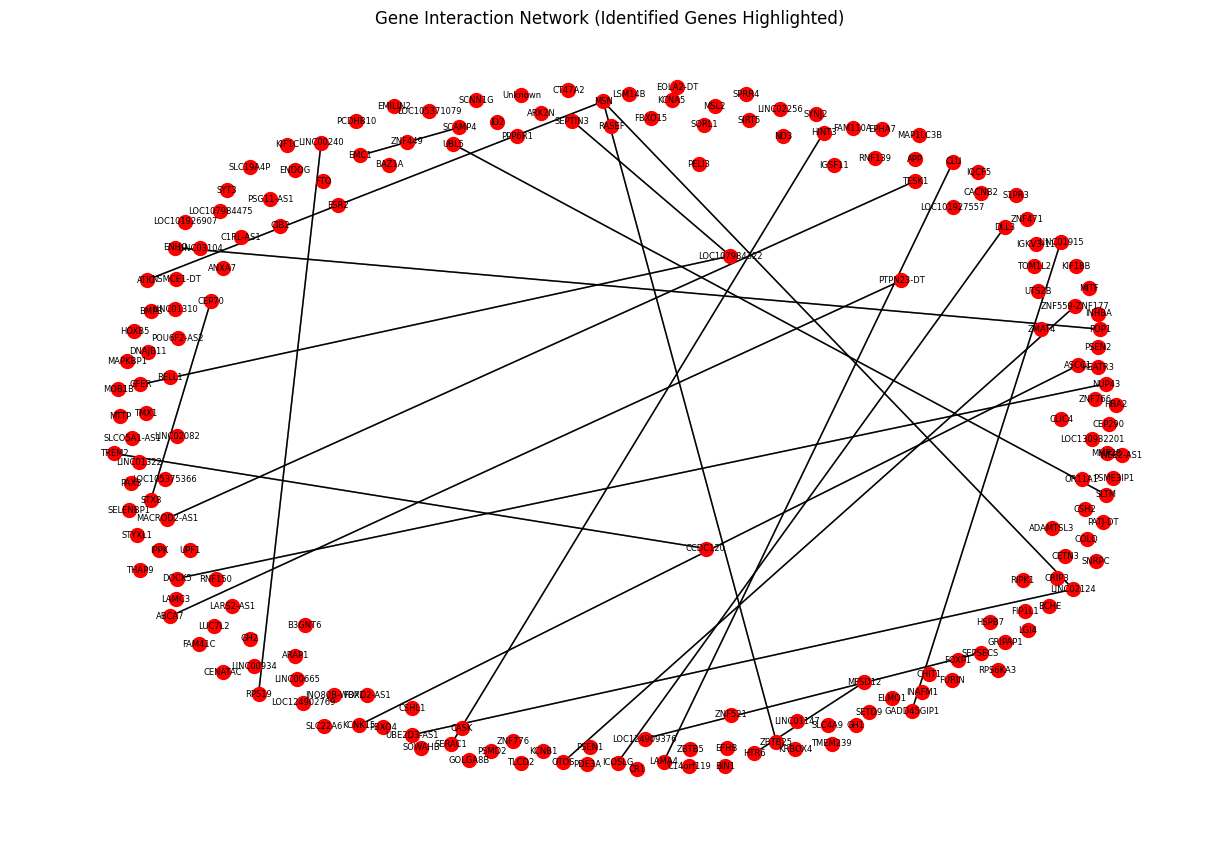

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

data = prepare_graph_data(
    gene_expression_matrix, adjacency_matrix, labels
)
visualize_identified_gene_graph(data, GNN_RFT_Reward_feb16_top50_list, gene_list_indices)

### pathway selection

In [ ]:
from scipy.stats import hypergeom

def compute_pathway_weights(kegg_pathways, ad_genes, total_genes, pathway_names):
    """
    Compute weights for pathways based on enrichment with AD-related genes.

    Args:
        kegg_pathways (dict): Dictionary of pathways and their associated genes.
        ad_genes (list): List of known AD-related genes.
        total_genes (int): Total number of genes in the dataset.

    Returns:
        pathway_weights (dict): Pathway weights based on enrichment.
    """
    pathway_weights = {}

    for pathway, genes in pathwayid_genes_mapping.items():
        # Convert gene lists to sets for faster intersection
        pathway_genes = set(genes)
        ad_genes_set = set(ad_genes)

        # Compute overlap
        overlap = len(pathway_genes.intersection(ad_genes_set))
        pathway_size = len(pathway_genes)

        # Hypergeometric test
        p_value = hypergeom.sf(overlap - 1, total_genes, pathway_size, len(ad_genes_set))

        # Assign weight based on -log(p-value)
        if p_value > 0:  # Avoid log(0)
            weight = -np.log(p_value)
        else:
            weight = 0  # Minimal weight if no overlap

        pathway_weights[pathway] = weight

        sorted_pathways = sorted(
            [(pathway_names.get(pid, pid), weight) for pid, weight in pathway_weights.items()],
            key=lambda x: x[1],
            reverse=True
        )

    return sorted_pathways

"""
# Example usage
kegg_pathways = {
    "hsa05010": ["APOE", "MAPT", "PSEN1", "PSEN2"],
    "hsa04610": ["CLU", "TREM2", "BIN1"],
    "hsa04310": ["PSEN1", "PSEN2"],
}
"""
#total_genes = 28358  # Total genes in the dataset
total_genes = 33091

pathway_weights = compute_pathway_weights(pathwayid_genes_mapping, combined_list, total_genes, pathways_with_names)
print("Pathway Weights:", pathway_weights)

Pathway Weights: [('Neuroactive ligand-receptor interaction - Homo sapiens (human)', 5.379226165589687), ('JAK-STAT signaling pathway - Homo sapiens (human)', 5.281879951635124), ('Cytokine-cytokine receptor interaction - Homo sapiens (human)', 5.236546691161622), ('PI3K-Akt signaling pathway - Homo sapiens (human)', 4.967999483824778), ('Growth hormone synthesis, secretion and action - Homo sapiens (human)', 4.611780416577652), ('ECM-receptor interaction - Homo sapiens (human)', 3.445798448627749), ('Endocytosis - Homo sapiens (human)', 2.9625514801111335), ('Hormone signaling - Homo sapiens (human)', 2.9530233092359612), ('Bacterial invasion of epithelial cells - Homo sapiens (human)', 2.7286107500291696), ('Epstein-Barr virus infection - Homo sapiens (human)', 2.6060896854292572), ('Arrhythmogenic right ventricular cardiomyopathy - Homo sapiens (human)', 2.3549641396955674), ('Serotonergic synapse - Homo sapiens (human)', 2.195880216057033), ('Nucleocytoplasmic transport - Homo sapi

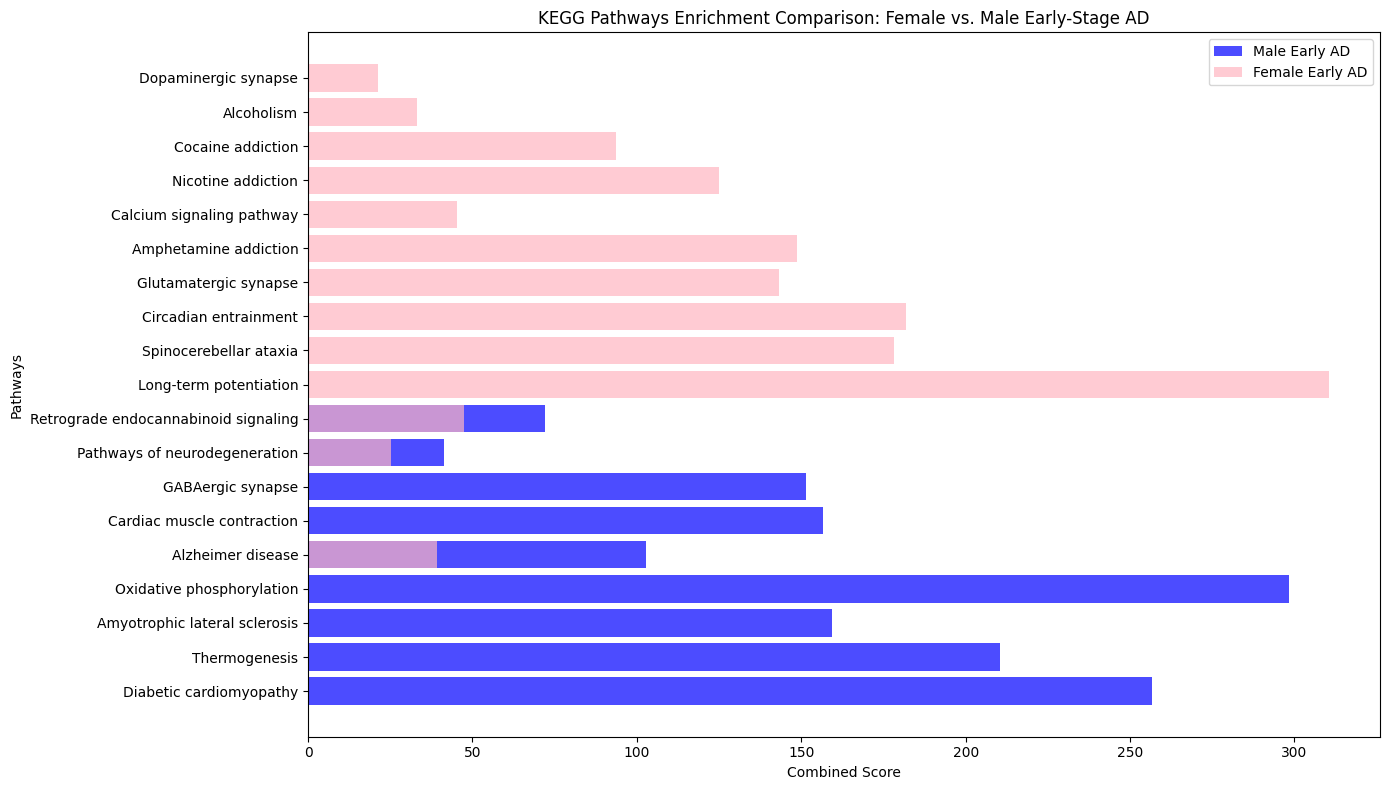

'\nKey Genes in Enriched Pathways:\nShigellosis: H3C13\nTranscriptional Misregulation in Cancer: H3C13\nNeutrophil Extracellular Trap Formation: H3C13\nAlcoholism: H3C13\nSystemic Lupus Erythematosus: H3C13\nSteroid Hormone Biosynthesis: SULT1E1\n'

In [ ]:
# Step 3: Extract top pathways for visualization
female_kegg_top = female_kegg.results[['Term', 'Combined Score']].head(20)
male_kegg_top = male_kegg.results[['Term', 'Combined Score']].head(20)
#ai_kegg_top = ai_kegg.results[['Term', 'Combined Score']].head(20)

# Step 4: Visualize KEGG pathways
plt.figure(figsize=(14, 8))

# Male
selected_male_pathways = [
    'Retrograde endocannabinoid signaling', 'Pathways of neurodegeneration', 'Alzheimer disease',
    'Diabetic cardiomyopathy', 'Thermogenesis', 'Amyotrophic lateral sclerosis', 'Oxidative phosphorylation', 'Cardiac muscle contraction',
    'GABAergic synapse'
]

# Filter the results DataFrame
filtered_male_kegg_top = male_kegg_top[male_kegg_top['Term'].isin(selected_male_pathways)]


plt.barh(filtered_male_kegg_top['Term'], filtered_male_kegg_top['Combined Score'], color='blue', alpha=0.7, label='Male Early AD')


# Select only specific pathways to display
selected_female_pathways = [
    'Retrograde endocannabinoid signaling', 'Pathways of neurodegeneration', 'Alzheimer disease',
    'Long-term potentiation', 'Cocaine addiction', 'Alcoholism', 'Amphetamine addiction', 'Nicotine addiction', 'Spinocerebellar ataxia',
    'Circadian entrainment', 'Glutamatergic synapse', 'Calcium signaling pathway', 'Dopaminergic synapse'
]


# Filter the results DataFrame
filtered_female_kegg_top = female_kegg_top[female_kegg_top['Term'].isin(selected_female_pathways)]

# Female
plt.barh(filtered_female_kegg_top['Term'], filtered_female_kegg_top['Combined Score'], color='lightpink', alpha=0.7, label='Female Early AD')



plt.xlabel("Combined Score")
plt.ylabel("Pathways")
plt.title("KEGG Pathways Enrichment Comparison: Female vs. Male Early-Stage AD")
plt.legend()
plt.tight_layout()

plt.show()
"""
Key Genes in Enriched Pathways:
Shigellosis: H3C13
Transcriptional Misregulation in Cancer: H3C13
Neutrophil Extracellular Trap Formation: H3C13
Alcoholism: H3C13
Systemic Lupus Erythematosus: H3C13
Steroid Hormone Biosynthesis: SULT1E1
"""

In [ ]:
# Initialize KEGG service
kegg = KEGG()

# Retrieve all human pathways from KEGG
human_pathways = kegg.list("pathway/hsa")

# Extract pathway IDs safely
pathway_ids = []
pathways_with_names = {}
for entry in human_pathways.split("\n"):
    if entry.strip():  # Ensure the line is not empty
        try:
            #pathway_id = entry.split("\t")[0].split(":")[1]  # Extract the KEGG pathway ID
            pathway_id = entry.split("\t")[0]
            pathway_name = entry.split("\t")[1]
            pathway_ids.append(pathway_id)
            pathways_with_names[pathway_id] = pathway_name
        except IndexError:
            print(f"Skipping malformed entry: {entry}")  # Log the issue and skip
print(pathways_with_names)

# Dictionary to store pathways containing AD-related genes
ad_related_pathways = {}

# Loop through each pathway to find AD-related genes
for pathway_id in pathway_ids:
    pathway_info = kegg.get(pathway_id)  # Fetch pathway details
    genes = []
    in_gene_section = False
    for line in pathway_info.split("\n"):
        if line.startswith("GENE"):  # Start of the GENE section
            in_gene_section = True
        elif in_gene_section:
            if line.strip() == "":  # End of the GENE section
                break
            # Extract gene symbol (second column)
            parts = line.strip().split()
            gene_symbol = parts[1].strip(";") if len(parts) > 1 else None
            if gene_symbol:
                genes.append(gene_symbol)
    # Check for overlap with AD-related genes
    overlap = set(known_early_male_gene_list).intersection(genes)
    if overlap:
        # Get pathway name
        pathway_name = kegg.parse_kgml_pathway(pathway_id)["NAME"] if "NAME" in kegg.parse_kgml_pathway(pathway_id) else pathway_id
        ad_related_pathways[pathway_name] = list(overlap)

# Print pathways containing AD-related genes
print("Pathways containing AD-related genes:")
for pathway, genes in ad_related_pathways.items():
    print(pathways_with_names[pathway].split(' - ')[0])
    print(genes)


{'hsa01100': 'Metabolic pathways - Homo sapiens (human)', 'hsa01200': 'Carbon metabolism - Homo sapiens (human)', 'hsa01210': '2-Oxocarboxylic acid metabolism - Homo sapiens (human)', 'hsa01212': 'Fatty acid metabolism - Homo sapiens (human)', 'hsa01230': 'Biosynthesis of amino acids - Homo sapiens (human)', 'hsa01232': 'Nucleotide metabolism - Homo sapiens (human)', 'hsa01250': 'Biosynthesis of nucleotide sugars - Homo sapiens (human)', 'hsa01240': 'Biosynthesis of cofactors - Homo sapiens (human)', 'hsa01320': 'Sulfur cycle - Homo sapiens (human)', 'hsa00010': 'Glycolysis / Gluconeogenesis - Homo sapiens (human)', 'hsa00020': 'Citrate cycle (TCA cycle) - Homo sapiens (human)', 'hsa00030': 'Pentose phosphate pathway - Homo sapiens (human)', 'hsa00040': 'Pentose and glucuronate interconversions - Homo sapiens (human)', 'hsa00051': 'Fructose and mannose metabolism - Homo sapiens (human)', 'hsa00052': 'Galactose metabolism - Homo sapiens (human)', 'hsa00053': 'Ascorbate and aldarate meta

In [ ]:
# Re-import required libraries since execution state was reset
import matplotlib.pyplot as plt
import numpy as np

# Food categories and taurine content (mg per 100g)
foods = ["Clams", "Scallops", "Oysters", "Squid", "Tuna", "Salmon", "Beef", "Lamb", "Chicken", "Milk", "Cheese", "Eggs"]
taurine_content = [1700, 1200, 900, 600, 400, 250, 150, 250, 150, 10, 20, 4]  # mg per 100g

# Create bar chart
plt.figure(figsize=(10, 6))
plt.barh(foods, taurine_content, color=["#0073e6", "#009688", "#ff9800", "#9c27b0", "#f44336"] * 3)
plt.xlabel("Taurine Content (mg per 100g)")
plt.ylabel("Food Sources")
plt.title("Taurine-Rich Foods for Neuroprotection")
plt.gca().invert_yaxis()  # Invert y-axis for better readability

# Show plot
plt.show()


## [ToDo]

#### Visualization nx

In [ ]:
from torch_geometric.utils import to_networkx

# Convert PyTorch Geometric data to a NetworkX graph
graph_nx = to_networkx(data, to_undirected=True)

In [ ]:


# Plot the graph
plt.figure(figsize=(10, 10))
nx.draw(graph_nx, with_labels=False, node_size=20, edge_color="gray", node_color="blue")
plt.title("Graph Visualization")
plt.show()


In [ ]:
# Assign colors based on node labels (e.g., disease state)
node_colors = ["red" if label == 1 else "blue" for label in data.y.numpy()]

# Plot the graph with node colors
plt.figure(figsize=(10, 10))
nx.draw(
    graph_nx,
    with_labels=False,
    node_size=50,
    edge_color="gray",
    node_color=node_colors,
)
plt.title("Graph Colored by Node Labels")
plt.show()


In [ ]:
# Assign colors based on node labels (e.g., disease state)
"""
node_colors = ["red" if label == 1 else "blue" for label in data.y.numpy()]

# Get the largest connected component
largest_cc = max(nx.connected_components(graph_nx), key=len)
subgraph = graph_nx.subgraph(largest_cc)
"""

# Create a mapping from the node index to its label
node_labels = {i: label for i, label in enumerate(data.y.numpy())}

# Get the largest connected component
largest_cc = max(nx.connected_components(graph_nx), key=len)
subgraph = graph_nx.subgraph(largest_cc)

# Create a color list for the nodes in the subgraph
node_colors = [
    "red" if node_labels[node] == 1 else "blue" for node in subgraph.nodes
]

# Plot the graph with node colors
plt.figure(figsize=(10, 10))
nx.draw(
    subgraph,
    with_labels=False,
    node_size=50,
    edge_color="gray",
    node_color=node_colors,
)
"""
# Plot the subgraph
plt.figure(figsize=(10, 10))
nx.draw(subgraph, with_labels=False, node_size=20, edge_color="gray", node_color="purple")
"""
plt.title("Largest Connected Component")
plt.show()


In [ ]:
# Extract weights from the first layer (GCNConv)
# gene_weights = model.conv1.weight.detach().cpu().numpy()
# Access the weights of the linear transformation inside GCNConv
gene_weights = model.conv1.lin.weight.detach().cpu().numpy()  # Shape: (hidden_dim, input_dim)


# Aggregate weights (e.g., by summing absolute values across all dimensions)
gene_importance = abs(gene_weights).sum(axis=0)

# Rank genes by importance
top_gene_indices = gene_importance.argsort()[::-1]  # Indices of top genes
print(f"Top marker genes: {top_gene_indices[:10]}")

# Step 1: Extract gene names or IDs
gene_names = adata_excitatory_early.var.index.tolist()  # List of gene names/IDs

# Step 2: Map top marker gene indices to gene names
top_gene_names2 = [gene_names[i] for i in top_gene_indices[:10]]
print(f"Top marker gene names: {top_gene_names2}")



In [ ]:

super_list = [x for pair in zip(top_gene_names1, top_gene_names2) for x in pair]
print(super_list)

In [ ]:
gene_ids = ['ENSG00000273132', 'ENSG00000273132', 'ENSG00000265163', 'ENSG00000265163', 'ENSG00000225881', 'ENSG00000185372', 'ENSG00000278546', 'ENSG00000225881', 'ENSG00000185372', 'ENSG00000278546', 'ENSG00000223554', 'ENSG00000139800', 'ENSG00000284680', 'ENSG00000223554', 'ENSG00000204414', 'ENSG00000284680', 'ENSG00000261637', 'ENSG00000261637', 'ENSG00000165655', 'ENSG00000261206']
mg = mygene.MyGeneInfo()
results = mg.querymany(gene_ids, scopes="ensembl.gene", fields="symbol", species="human")

# Map gene IDs to names
gene_id_to_name = {result['query']: result.get('symbol', 'Unknown') for result in results}

print("Gene ID to Name Mapping:")
print(gene_id_to_name)

#### SHAP visualization

In [ ]:
import numpy as np
import shap

# Use a subset of the training data for SHAP explanation (to reduce computation time)
X_pca_explainer = data.x[:100]  # Use the first 100 training samples

# Create a SHAP explainer for the ANN model
explainer = shap.KernelExplainer(model.predict, X_pca_explainer)

# Calculate SHAP values for the test data
shap_values = explainer.shap_values(data.x[:50])  # Use the first 50 test samples for explanation

# Squeeze SHAP values to remove the output dimension (adjust shape to match input data)
shap_values_squeezed = np.squeeze(shap_values)  # Resulting shape: (50, 20)

# Verify the new shape
print(f"Shape of squeezed SHAP values: {shap_values_squeezed.shape}")
print(f"Shape of input data: {data.x[:50].shape}")

# Visualize SHAP summary plot for the PCA components
shap.summary_plot(
    shap_values_squeezed,
    data.x[:50],
    feature_names=[f"PCA_{i+1}" for i in range(data.x.shape[1])]
)

# Benchmark - ANN & Logistic regression

#### Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_adata_excitatory_early, y_train_adata_excitatory_early)
importance = abs(model.coef_[0])  # Coefficients represent feature importance
top_genes = np.argsort(importance)[::-1][:20]  # Top 10 genes
print(top_genes)


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Make predictions on the test set
y_pred = model.predict(X_test_adata_excitatory_early)

# Compute evaluation metrics
accuracy = accuracy_score(y_test_adata_excitatory_early, y_pred)
recall = recall_score(y_test_adata_excitatory_early, y_pred)
precision = precision_score(y_test_adata_excitatory_early, y_pred)
f1 = f1_score(y_test_adata_excitatory_early, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-score: {f1:.4f}")


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_prob = model.predict_proba(X_test_adata_excitatory_early)[:, 1]

# Compute AUC-ROC score
auc_roc = roc_auc_score(y_test_adata_excitatory_early, y_prob)
print(f"AUC-ROC Score: {auc_roc:.4f}")

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test_adata_excitatory_early, y_prob)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_roc:.4f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


#### SHAP

In [ ]:
!pip install shap  # Install SHAP if not already installed
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Initialize SHAP Explainer
explainer = shap.Explainer(model, X_train_adata_excitatory_early)

# Compute SHAP values
shap_values = explainer(X_test_adata_excitatory_early)

shap.summary_plot(shap_values, X_test_adata_excitatory_early)

shap.summary_plot(shap_values, X_test_adata_excitatory_early, plot_type="bar")



#### Get Numerical SHAP Values
# Convert SHAP values into a DataFrame
shap_importance = pd.DataFrame({
    'Gene': X_train_adata_excitatory_early.columns,  # Feature names
    'SHAP Value (Mean)': np.abs(shap_values.values).mean(axis=0)  # Mean absolute SHAP value per gene
})

# Sort by importance
shap_importance = shap_importance.sort_values(by='SHAP Value (Mean)', ascending=False)

# Display Top 20 Most Important Genes
print(shap_importance.head(20))



#### Visualize Individual Gene Contribution
# Pick a sample to explain (first test sample)
shap.force_plot(explainer.expected_value, shap_values[0].values, X_test_adata_excitatory_early.iloc[0, :], matplotlib=True)



In [ ]:
# Assuming X_female_mtg corresponds to gene expression columns in the original dataset
gene_ids = adata_excitatory_early_dataset.columns  # Extract column names (genes)

# Map indices to gene names
"""
top_gene_indices = [6796, 12778,  9541,  9136,  2437, 19989,  5695, 25420, 21158, 18998]
"""

top_gene_indices = [6796, 12778,  9541,  9136,  2437, 19989,  5695, 25420, 21158, 18998,
                    33045,    73, 21520, 31180,  6418, 25951, 26940, 10113, 28624,  2939]
top_gene_ids = [gene_ids[i] for i in top_gene_indices]

print("Top Genes:", top_gene_ids)

mg = mygene.MyGeneInfo()
ensembl_ids = top_gene_ids
results_excitatory_early = mg.querymany(ensembl_ids, scopes="ensembl.gene", fields="symbol", species="human")
mapped_df_excitatory_early = pd.DataFrame(results_excitatory_early)[["query", "symbol"]]
mapped_df_excitatory_early.columns = ["Ensembl_ID", "Gene_Symbol"]

ensembl_to_symbol_map_excitatory_early = dict(zip(mapped_df_excitatory_early["Ensembl_ID"], mapped_df_excitatory_early["Gene_Symbol"]))
print(ensembl_to_symbol_map_excitatory_early)

In [ ]:
print(adata_excitatory_early_dataset[adata_excitatory_early_dataset['Braak'] == 'Early'].count())
print(adata_excitatory_early_dataset[adata_excitatory_early_dataset['Braak'] == 'Normal'].count())

In [ ]:
from statsmodels.stats.multitest import multipletests

# Generates random numbers from a normal (Gaussian) distribution
# Mean of the distribution is 0
# Standard deviation is set to match the spread of real importance values.
# Generates 1000 samples (shuffled feature importances).
# Each sample contains the same number of features as importance.flatten().
null_importance = np.random.normal(loc=0, scale=np.std(importance.flatten()), size=(1000, len(importance.flatten())))

# Compute p-values for each importance based on the null distribution
p_values_adata_excitatory_early = np.mean(np.abs(importance.flatten()) < np.abs(null_importance), axis=0)

# Adjust p-values using Benjamini-Hochberg correction
adjusted_p_values_adata_excitatory_early = multipletests(p_values_adata_excitatory_early, method="fdr_bh")[1]

# Create a DataFrame with gene importance and p-values
gene_importance_adata_excitatory_early = pd.DataFrame({
    'gene': X_adata_excitatory_early.columns,
    'importance': importance.flatten(),
    'p_value_adata_excitatory_early': p_values_adata_excitatory_early,
    'adjusted_p_value_adata_excitatory_early': adjusted_p_values_adata_excitatory_early
})

# Filter significant genes
significant_genes_adata_excitatory_early = gene_importance_adata_excitatory_early[gene_importance_adata_excitatory_early['adjusted_p_value_adata_excitatory_early'] < 0.05]

# Print results
print("Significant Genes with Adjusted P-Values < 0.05:")
print(significant_genes_adata_excitatory_early)

## select top 20
significant_genes_adata_excitatory_early = significant_genes_adata_excitatory_early.nsmallest(20, 'adjusted_p_value_adata_excitatory_early')

# Remove NaN values from the 'gene' column
significant_genes_adata_excitatory_early = significant_genes_adata_excitatory_early.dropna(subset=['gene'])
print(significant_genes_adata_excitatory_early)

# Extract the updated gene names as a list
significant_gene_names_adata_excitatory_early = significant_genes_adata_excitatory_early['gene'].tolist()

print("List of Significant Gene Symbols:")
print(significant_gene_names_adata_excitatory_early)

"""
plt.figure(figsize=(6, 6))
sns.scatterplot(data=significant_genes_adata_excitatory_early, x='gene', y='importance', color='black', size=400,legend=False)
plt.axhline(0, color='gray', linestyle='--')
plt.title('Excitatory Gene Importance with Statistical Significance (Adjusted p-value < 0.05)', fontsize=14)
plt.xlabel('Gene', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
"""



In [ ]:
"""
mg = mygene.MyGeneInfo()
ensembl_ids = significant_genes_adata_excitatory_early['gene'].tolist()

# Query MyGeneInfo to get gene symbols
query_result = mg.querymany(ensembl_ids, scopes='ensembl.gene', fields='symbol', species='human')

# Convert query results into a mapping dictionary (Ensembl ID → Gene Symbol)
ensembl_to_symbol = {entry['query']: entry.get('symbol', 'Unknown') for entry in query_result}
"""

# Add gene symbols to the DataFrame
significant_genes_adata_excitatory_early['Gene_Symbol'] = significant_genes_adata_excitatory_early['gene'].map(ensembl_to_symbol)

# Display updated DataFrame
print(significant_genes_adata_excitatory_early)

plt.figure(figsize=(6, 6))
sns.scatterplot(data=significant_genes_adata_excitatory_early, x='Gene_Symbol', y='importance', color='black', size=400,legend=False)
plt.axhline(0, color='gray', linestyle='--')
plt.title('Excitatory Gene Importance with Statistical Significance (Adjusted p-value < 0.05)', fontsize=14)
plt.xlabel('Gene_Symbol', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Each gene's variation

In [ ]:
# Load your dataset (Modify the file path if necessary)
# adata_excitatory_raw = sc.read_h5ad("your_file.h5ad")  # Load AnnData object

# Define the list of Ensembl IDs to check variation for
"""
# top 10 genes with high importance score
gene_list = [
    'ENSG00000228201', 'ENSG00000255737', 'ENSG00000260528', 'ENSG00000236206',
    'ENSG00000230989', 'ENSG00000228701', 'ENSG00000163608', 'ENSG00000171403',
    'ENSG00000254445', 'ENSG00000228323'
]
"""
# genes with statistical significance
gene_list = ['ENSG00000197013', 'ENSG00000089693', 'ENSG00000186187', 'ENSG00000091138', 'ENSG00000101220', 'ENSG00000176956',
             'ENSG00000179532', 'ENSG00000144369', 'ENSG00000139636', 'ENSG00000047662', 'ENSG00000248677', 'ENSG00000126746',
             'ENSG00000074527', 'ENSG00000116560', 'ENSG00000105701', 'ENSG00000177666', 'ENSG00000144152', 'ENSG00000159228',
             'ENSG00000184897', 'ENSG00000277586']

# Query MyGeneInfo to get gene symbols
query_result = mg.querymany(gene_list, scopes='ensembl.gene', fields='symbol', species='human')
print(query_result)

# Ensure the genes exist in the dataset
genes_available = [gene for gene in gene_list if gene in adata_excitatory_early.var_names]

if not genes_available:
    raise ValueError("None of the requested genes were found in the dataset!")

# Subset the AnnData object to only selected genes
adata_subset = adata_excitatory_early[:, genes_available]

# Convert sparse matrix to dense format if necessary
if isinstance(adata_subset.X, np.ndarray):
    X_dense = adata_subset.X
else:
    X_dense = adata_subset.X.toarray()

# Create a DataFrame with gene expression values
gene_expression_df = pd.DataFrame(X_dense, columns=genes_available)

# Compute variance for each gene
gene_variance = gene_expression_df.var(axis=0)

# Convert variance to a DataFrame for visualization
variance_df = gene_variance.reset_index()
variance_df.columns = ['Gene', 'Variance']

# Plot gene expression variation
plt.figure(figsize=(10, 5))
sns.barplot(data=variance_df, x='Gene', y='Variance', palette="Blues")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Variance in Expression")
plt.xlabel("Gene")
plt.title("Variation in Gene Expression for Selected Genes")
plt.show()

# Print variance table
print(variance_df)


#### [remove->] ANN

In [ ]:
# Define the model with Input layer
model_adata_excitatory_early = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_adata_excitatory_early_balanced.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_adata_excitatory_early.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_adata_excitatory_early = model_adata_excitatory_early.fit(X_train_adata_excitatory_early_balanced, y_train_adata_excitatory_early_balanced, epochs=50, batch_size=16, validation_data=(X_test_adata_excitatory_early_balanced, y_test_adata_excitatory_early_balanced))

# Evaluate the model
test_loss_adata_excitatory_early, test_accuracy_adata_excitatory_early = model_adata_excitatory_early.evaluate(X_test_adata_excitatory_early_balanced, y_test_adata_excitatory_early_balanced)
print(f'Test Accuracy: {test_accuracy_adata_excitatory_early:.2f}')

# Get weights and determine top genes
weights_adata_excitatory_early = model_adata_excitatory_early.layers[0].get_weights()[0]

gene_weights_adata_excitatory_early = pd.DataFrame({'gene': X_adata_excitatory_early.columns, 'weight': weights_adata_excitatory_early.flatten()})
top_gene_weights_adata_excitatory_early = gene_weights_adata_excitatory_early.nlargest(20, 'weight')
print("Top 10 genes most associated with early AD neurons:")
print(top_gene_weights_adata_excitatory_early)

In [ ]:
print(f'Test Accuracy: {test_accuracy_female_mtg:.2f}')

# Get weights and determine top genes
weights_female_mtg = model_female_mtg.layers[0].get_weights()[0]

advanced_gene_weights_female_mtg = pd.DataFrame({'gene': X_female_mtg.columns, 'weight': weights_female_mtg.flatten()})
top_advanced_genes_female_mtg = advanced_gene_weights_female_mtg.nlargest(20, 'weight')
print("Top 10 genes most associated with advanced AD female mtg:")
print(top_advanced_genes_female_mtg)

#### [Remove->]

In [ ]:
mg = mygene.MyGeneInfo()
ensembl_ids = advanced_gene_weights_female_mtg["gene"].tolist()
advanced_results_female_mtg = mg.querymany(ensembl_ids, scopes="ensembl.gene", fields="symbol", species="human")
mapped_df_female_mtg = pd.DataFrame(advanced_results_female_mtg)[["query", "symbol"]]
mapped_df_female_mtg.columns = ["Ensembl_ID", "Gene_Symbol"]

ensembl_to_symbol_map_ = dict(zip(mapped_df_female_mtg["Ensembl_ID"], mapped_df_female_mtg["Gene_Symbol"]))

#### Select statistically significant genes

In [ ]:
from statsmodels.stats.multitest import multipletests

# Generate a null distribution of weights
null_weights_female_mtg = np.random.normal(loc=0, scale=np.std(weights_female_mtg.flatten()), size=(1000, len(weights_female_mtg.flatten())))

# Compute p-values for each weight based on the null distribution
p_values_female_mtg = np.mean(np.abs(weights_female_mtg.flatten()) < np.abs(null_weights_female_mtg), axis=0)

# Adjust p-values using Benjamini-Hochberg correction
adjusted_p_values_female_mtg = multipletests(p_values_female_mtg, method="fdr_bh")[1]

# Create a DataFrame with gene weights and p-values
advanced_gene_weights_female_mtg = pd.DataFrame({
    'gene': X_female_mtg.columns,
    'weight': weights_female_mtg.flatten(),
    'p_value_female_mtg': p_values_female_mtg,
    'adjusted_p_value_female_mtg': adjusted_p_values_female_mtg
})

# Filter significant genes
advanced_significant_genes_female_mtg = advanced_gene_weights_female_mtg[advanced_gene_weights_female_mtg['adjusted_p_value_female_mtg'] < 0.05]

# Print results
print("Significant Genes with Adjusted P-Values < 0.05:")
print(advanced_significant_genes_female_mtg)

## select top 20
advanced_significant_genes_female_mtg = advanced_significant_genes_female_mtg.nsmallest(20, 'adjusted_p_value_female_mtg')

# Replace Ensembl IDs with Gene Symbols in the significant_genes DataFrame
advanced_significant_genes_female_mtg['gene'] = advanced_significant_genes_female_mtg['gene'].replace(ensembl_to_symbol_map_female_mtg)

# Remove NaN values from the 'gene' column
advanced_significant_genes_female_mtg = advanced_significant_genes_female_mtg.dropna(subset=['gene'])
print(advanced_significant_genes_female_mtg)

# Extract the updated gene names as a list
advanced_significant_gene_names_female_mtg = advanced_significant_genes_female_mtg['gene'].tolist()

print("List of Advanced Significant Gene Symbols:")
print(advanced_significant_gene_names_female_mtg)


plt.figure(figsize=(6, 6))
sns.scatterplot(data=advanced_significant_genes_female_mtg, x='gene', y='weight', color='black', size=400,legend=False)
plt.axhline(0, color='gray', linestyle='--')
plt.title('advanced Female MTG Gene Weights with Statistical Significance (Adjusted p-value < 0.05)', fontsize=14)
plt.xlabel('Gene', fontsize=12)
plt.ylabel('Weight', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



#### top genes pathways identification

In [ ]:
!pip install gseapy
import gseapy as gp

#cluster_list = ['CYTB', 'ATP6', 'ND3', 'COX3', 'COX2']
#coef_advanced_female_mtg_gene_list = ['THBS3-AS1', 'FOXD4', 'LINC02857', 'UBAP1', 'ECT2L', 'AGBL5-IT1', 'GNB4', 'NKX6-3', 'LRIT1']
# advanced_female_mtg_gene_coef_list = ['THBS3-AS1', 'FOXD4', 'LINC02857', 'UBAP1', 'ECT2L', 'AGBL5-IT1', 'GNB4', 'NKX6-3', 'LRIT1']
#GNN_list = ['RNASE6', 'LINC01785', 'H3C13', 'PDE3A-AS1', 'SULT1E1', 'ROPN1']
"""
# statistically significant genes
logis_list = ['ZNF429', 'MLF2', 'ZNRF1', 'SLC26A3', 'ADISSP', 'LY6H', 'DNHD1', 'FAM171B', 'LMBR1L', 'FAM184B', 'LINC02102',
              'ZNF384', 'NTN4', 'SFPQ', 'FKBP8', 'PNPLA2', 'FBLN7', 'CBR1', 'H1-10', 'NEFL']
# top 10 genes
logis_list = ['AGAP2-AS1', 'LINC02193', 'HSBP1', 'TNKS2-DT', 'NEPRO', 'KRT9','HSPB2-C11orf52', 'MYADM-AS1']
"""
logis_list = ['AGAP2-AS1', 'LINC02193', 'HSBP1', 'TNKS2-DT', 'NEPRO', 'KRT9', 'HSPB2-C11orf52', 'MYADM-AS1',
              'HIBADH', 'FAM9A', 'LOC124902165', 'ZNF20', 'NPPB', 'ANTXR2', 'TSPAN9', 'IL1A']


## end of Brain Blood KEGG Comparison

# Step 2: Perform pathway enrichment analysis for KEGG pathways

print("Performing KEGG pathway enrichment analysis for Advanced Stage genes...")
advanced_kegg = gp.enrichr(gene_list=known_advanced_gene_list,
                           gene_sets="KEGG_2021_Human",
                           organism='human',
                           outdir=None)

print("\nTop KEGG pathways for Advanced Stage genes:")
# Convert results to a pandas DataFrame
# advanced_kegg = pd.DataFrame(advanced_kegg.results)
# Filter for "Alzheimer"’s Disease-related pathways or Tau pathology or Alzheimer's Disease: hsa05010,
# Donepezil (D07814) (used in Alzheimer's Disease treatment), TP53 (Tumor protein p53), APP (Amyloid precursor protein),
# nadh:ubiquinone oxidoreductase, mitochondria (M00151)
# Autophagy (hsa04140)
# Type II diabetes mellitus (hsa04930)
# Parkinso's disease (hsa05012)
# Oxidative phosphorylation (hsa00190)
# advanced_kegg = advanced_kegg[advanced_kegg['Term'].str.contains("Tau pathology", case=False)]
# print(advanced_kegg[['Term', 'Adjusted P-value', 'Overlap', 'Combined Score']].head(10))
print(advanced_kegg.results[['Term', 'Adjusted P-value', 'Overlap', 'Combined Score']].head(10))

print("Performing KEGG pathway enrichment analysis for Early Stage genes...")
early_kegg = gp.enrichr(gene_list=known_early_gene_list,
                           gene_sets="KEGG_2021_Human",
                           organism='human',
                           outdir=None)

print("\nTop KEGG pathways for Early Stage genes:")
print(early_kegg.results[['Term', 'Adjusted P-value', 'Overlap', 'Combined Score']].head(10))


print("Performing KEGG pathway enrichment analysis for cluster genes...")
cluster_kegg = gp.enrichr(gene_list=logis_list,
                           gene_sets="KEGG_2021_Human",
                           organism='human',
                           outdir=None)

print("\nTop KEGG pathways for cluster genes:")
print(cluster_kegg.results[['Term', 'Adjusted P-value', 'Overlap', 'Combined Score']].head(10))

In [ ]:
# Step 3: Extract top pathways for visualization
early_kegg_top = early_kegg.results[['Term', 'Combined Score']].head(10)
advanced_kegg_top = advanced_kegg.results[['Term', 'Combined Score']].head(10)
cluster_kegg_top = cluster_kegg.results[['Term', 'Combined Score']].head(10)

# Step 4: Visualize KEGG pathways
plt.figure(figsize=(14, 8))

# Early stage pathways
plt.barh(early_kegg_top['Term'], early_kegg_top['Combined Score'], color='blue', alpha=0.7, label='Early Stage')

# Advanced stage pathways
plt.barh(advanced_kegg_top['Term'], advanced_kegg_top['Combined Score'], color='orange', alpha=0.7, label='Advanced Stage')

# Cluster pathways
plt.barh(cluster_kegg_top['Term'], cluster_kegg_top['Combined Score'], color='purple', alpha=0.7, label='Cluster')

plt.xlabel("Combined Score")
plt.ylabel("Pathways")
plt.title("KEGG Pathways Enrichment Comparison: Early vs. Advanced Stages")
plt.legend()
plt.tight_layout()

plt.show()
"""
Key Genes in Enriched Pathways:
Shigellosis: H3C13
Transcriptional Misregulation in Cancer: H3C13
Neutrophil Extracellular Trap Formation: H3C13
Alcoholism: H3C13
Systemic Lupus Erythematosus: H3C13
Steroid Hormone Biosynthesis: SULT1E1
"""

In [ ]:
# Initialize KEGG service
kegg = KEGG()

# Retrieve all human pathways from KEGG
human_pathways = kegg.list("pathway/hsa")

# Extract pathway IDs safely
pathway_ids = []
pathways_with_names = {}
for entry in human_pathways.split("\n"):
    if entry.strip():  # Ensure the line is not empty
        try:
            #pathway_id = entry.split("\t")[0].split(":")[1]  # Extract the KEGG pathway ID
            pathway_id = entry.split("\t")[0]
            pathway_name = entry.split("\t")[1]
            pathway_ids.append(pathway_id)
            pathways_with_names[pathway_id] = pathway_name
        except IndexError:
            print(f"Skipping malformed entry: {entry}")  # Log the issue and skip
print(pathways_with_names)

# Dictionary to store pathways containing AD-related genes
ad_related_pathways = {}

# Loop through each pathway to find AD-related genes
for pathway_id in pathway_ids:
    pathway_info = kegg.get(pathway_id)  # Fetch pathway details
    genes = []
    in_gene_section = False
    for line in pathway_info.split("\n"):
        if line.startswith("GENE"):  # Start of the GENE section
            in_gene_section = True
        elif in_gene_section:
            if line.strip() == "":  # End of the GENE section
                break
            # Extract gene symbol (second column)
            parts = line.strip().split()
            gene_symbol = parts[1].strip(";") if len(parts) > 1 else None
            if gene_symbol:
                genes.append(gene_symbol)
    # Check for overlap with AD-related genes
    overlap = set(logis_list).intersection(genes)
    if overlap:
        # Get pathway name
        pathway_name = kegg.parse_kgml_pathway(pathway_id)["NAME"] if "NAME" in kegg.parse_kgml_pathway(pathway_id) else pathway_id
        ad_related_pathways[pathway_name] = list(overlap)

# Print pathways containing AD-related genes
print("Pathways containing AD-related genes:")
for pathway, genes in ad_related_pathways.items():
    print(pathways_with_names[pathway].split(' - ')[0])
    print(genes)


# Pathway analysis

#### Pathway name:id mapping

Pathway Name	KEGG ID
*   Shigellosis	hsa05131
*   Transcriptional Misregulation in Cancer	hsa05202
*   Neutrophil Extracellular Trap Formation	hsa04613
*   Alcoholism	hsa05034
*   Systemic Lupus Erythematosus	hsa05322
*   Steroid Hormone Biosynthesis	hsa00140


In [ ]:
!pip install bioservices
from bioservices import KEGG

# Initialize KEGG service
kegg = KEGG()

# List of AD-related genes
ad_genes = ['APOE', 'MAPT', 'PSEN1', 'PSEN2', 'APP', 'CLU', 'TREM2', 'BIN1']

# Retrieve all human pathways from KEGG
human_pathways = kegg.list("pathway/hsa")

# Extract pathway IDs safely
pathway_ids = []
pathways_with_names = {}
for entry in human_pathways.split("\n"):
    if entry.strip():  # Ensure the line is not empty
        try:
            #pathway_id = entry.split("\t")[0].split(":")[1]  # Extract the KEGG pathway ID
            pathway_id = entry.split("\t")[0]
            pathway_name = entry.split("\t")[1]
            pathway_ids.append(pathway_id)
            pathways_with_names[pathway_id] = pathway_name
        except IndexError:
            print(f"Skipping malformed entry: {entry}")  # Log the issue and skip
print(pathways_with_names)

# Dictionary to store pathways containing AD-related genes
ad_related_pathways = {}

# Loop through each pathway to find AD-related genes
for pathway_id in pathway_ids:
    pathway_info = kegg.get(pathway_id)  # Fetch pathway details
    genes = []
    in_gene_section = False
    for line in pathway_info.split("\n"):
        if line.startswith("GENE"):  # Start of the GENE section
            in_gene_section = True
        elif in_gene_section:
            if line.strip() == "":  # End of the GENE section
                break
            # Extract gene symbol (second column)
            parts = line.strip().split()
            gene_symbol = parts[1].strip(";") if len(parts) > 1 else None
            if gene_symbol:
                genes.append(gene_symbol)
    # Check for overlap with AD-related genes
    overlap = set(ad_genes).intersection(genes)
    if overlap:
        # Get pathway name
        pathway_name = kegg.parse_kgml_pathway(pathway_id)["NAME"] if "NAME" in kegg.parse_kgml_pathway(pathway_id) else pathway_id
        ad_related_pathways[pathway_name] = list(overlap)

# Print pathways containing AD-related genes
print("Pathways containing AD-related genes:")
for pathway, genes in ad_related_pathways.items():
    print(pathways_with_names[pathway].split(' - ')[0])
    print(genes)


#### [Remove->] Pathway:genes mapping

In [ ]:
from bioservices import KEGG

# Initialize KEGG service
kegg = KEGG()

# Example pathway-to-ID mapping (you may already have this from KEGG queries)
# Retrieve all human pathways from KEGG
human_pathways = kegg.list("pathway/hsa")

# Extract pathway IDs safely
pathway_ids = []
pathway_to_id = {}
for entry in human_pathways.split("\n"):
    if entry.strip():  # Ensure the line is not empty
        try:
            #pathway_id = entry.split("\t")[0].split(":")[1]  # Extract the KEGG pathway ID
            pathway_id = entry.split("\t")[0]
            pathway_name = entry.split("\t")[1]
            pathway_ids.append(pathway_id)
            pathway_to_id[pathway_id] = pathway_name
        except IndexError:
            print(f"Skipping malformed entry: {entry}")  # Log the issue and skip
print(pathway_to_id)

"""
pathway_to_id = {
    "Shigellosis": "hsa05131",
    "Transcriptional Misregulation in Cancer": "hsa05202",
    "Neutrophil Extracellular Trap Formation": "hsa04613",
    "Alcoholism": "hsa05034",
    "Systemic Lupus Erythematosus": "hsa05322",
    "Steroid Hormone Biosynthesis": "hsa00140",
}
"""


# Create an empty dictionary for the final mapping
kegg_pathways = {}

# Loop through each pathway
for pathway_id, pathway_name in pathway_to_id.items():
    # Fetch pathway details
    pathway_info = kegg.get(pathway_id)

    # Extract genes
    genes = []
    in_gene_section = False
    for line in pathway_info.split("\n"):
        if line.startswith("GENE"):  # Start of the GENE section
            in_gene_section = True
        elif in_gene_section:
            if line.strip() == "":  # End of the GENE section
                break
            parts = line.strip().split()
            gene_symbol = parts[1] if len(parts) > 1 else None  # Extract gene symbol
            #gene_symbol = gene_symbol.split(';')[0]
            if gene_symbol:
                genes.append(gene_symbol)

    # Add to the kegg_pathways dictionary
    print("------> genes: ")
    print(genes)
    kegg_pathways[pathway_id] = genes
    print(kegg_pathways)

# Print the final kegg_pathways dictionary
print("kegg_pathways = {")
for pathway_name, genes in kegg_pathways.items():
    print(f'    "{pathway_name}": {genes},')
print("}")

#### [remove->]

In [ ]:
# Example pathway-to-ID mapping (you may already have this from KEGG queries)
pathway_to_id = {
    "Shigellosis": "hsa05131",
    "Transcriptional Misregulation in Cancer": "hsa05202",
    "Neutrophil Extracellular Trap Formation": "hsa04613",
    "Alcoholism": "hsa05034",
    "Systemic Lupus Erythematosus": "hsa05322",
    "Steroid Hormone Biosynthesis": "hsa00140",
}

# Initialize KEGG service
kegg = KEGG()

# Create an empty dictionary for the final mapping
kegg_pathways = {}

# Loop through each pathway
for pathway_name, pathway_id in pathway_to_id.items():
    # Fetch pathway details
    pathway_info = kegg.get(pathway_id)

    # Extract genes
    genes = []
    in_gene_section = False
    for line in pathway_info.split("\n"):
        if line.startswith("GENE"):  # Start of the GENE section
            in_gene_section = True
        elif in_gene_section:
            if line.strip() == "":  # End of the GENE section
                break
            parts = line.strip().split()
            gene_symbol = parts[1] if len(parts) > 1 else None  # Extract gene symbol
            if gene_symbol:
                genes.append(gene_symbol)

    # Add to the kegg_pathways dictionary
    kegg_pathways[pathway_name] = genes

# Print the final kegg_pathways dictionary
print("kegg_pathways = {")
for pathway_name, genes in kegg_pathways.items():
    print(f'    "{pathway_name}": {genes},')
print("}")


#### [Not Found] AD relevant pathways by known genes (6 pathways)


*   ad_genes = ['APOE', 'MAPT', 'PSEN1', 'PSEN2', 'APP', 'CLU', 'TREM2', 'BIN1']



In [ ]:

# Step 2: Load the KEGG pathway gene list
# Replace this with your actual KEGG pathway data
# Example: A dictionary mapping pathways to their associated genes

cleaned_kegg_pathways = {
    pathway: [gene.strip(";") for gene in genes]  # Remove ';' from each gene name
    for pathway, genes in kegg_pathways.items()
}

# Step 3: Identify AD-related genes in each pathway
ad_genes_in_pathways = {}

for pathway, genes in cleaned_kegg_pathways.items():
    overlap = set(ad_genes).intersection(genes)
    ad_genes_in_pathways[pathway] = list(overlap)

# Step 4: Filter pathways with at least one AD-related gene
ad_related_pathways = {pathway: genes for pathway, genes in ad_genes_in_pathways.items() if genes}

# Step 5: Display the results
print("AD-Related Genes in Enriched Pathways:")
for pathway, genes in ad_related_pathways.items():
    print(f"{pathway}: {', '.join(genes)}")


#### Pathways with known AD-related genes:
https://www.genome.jp/kegg/pathway.html

*   MAPK signaling pathway: hsa04010, Overlapping Genes: ['MAPT']
*   Wnt signaling pathway: hsa04310, Overlapping Genes: ['PSEN1']
*   Notch signaling pathway: hsa04330, Overlapping Genes: ['PSEN1', 'PSEN2']
*   Endocytosis: hsa04144, Overlapping Genes: ['BIN1']
*   Complement and coagulation cascades: hsa04610, Overlapping Genes: ['CLU']
*   Fc gamma R-mediated phagocytosis: hsa04666, Overlapping Genes: ['BIN1']
*   Cholesterol metabolism: hsa04979, Overlapping Genes: ['APOE']
*   Serotonergic synapse: hsa04726, Overlapping Genes: ['APP']
*   Neurotrophin signaling pathway: hsa04722, Overlapping Genes: ['PSEN1', 'PSEN2']
*   Osteoclast differentiation: hsa04380, Overlapping Genes: ['TREM2']
*   Human papillomavirus infection: hsa05165, Overlapping Genes: ['PSEN1']
*   Alzheimer disease: hsa05010, Overlapping Genes: ['PSEN1', 'MAPT', 'APP', 'APOE', 'PSEN2']
*   Parkinson disease: hsa05012, Overlapping Genes: ['MAPT']
*   Pathways of neurodegeneration - multiple diseases: hsa05022, Overlapping Genes: ['PSEN1', 'PSEN2', 'MAPT']




In [ ]:
"""
!pip install bioservices
from bioservices import KEGG
"""

# List of AD-related genes
ad_genes = ['APOE', 'MAPT', 'PSEN1', 'PSEN2', 'APP', 'CLU', 'TREM2', 'BIN1']

# Retrieve all human pathways from KEGG
human_pathways = kegg.list("pathway/hsa")

# Extract pathway IDs safely
pathway_ids = []
pathways_with_names = {}
for entry in human_pathways.split("\n"):
    if entry.strip():  # Ensure the line is not empty
        try:
            #pathway_id = entry.split("\t")[0].split(":")[1]  # Extract the KEGG pathway ID
            pathway_id = entry.split("\t")[0]
            pathway_name = entry.split("\t")[1]
            pathway_ids.append(pathway_id)
            pathways_with_names[pathway_id] = pathway_name
        except IndexError:
            print(f"Skipping malformed entry: {entry}")  # Log the issue and skip
print(pathways_with_names)

# Dictionary to store pathways containing AD-related genes
ad_related_pathways = {}

# Loop through each pathway to find AD-related genes
for pathway_id in pathway_ids:
    pathway_info = kegg.get(pathway_id)  # Fetch pathway details
    genes = []
    in_gene_section = False
    for line in pathway_info.split("\n"):
        if line.startswith("GENE"):  # Start of the GENE section
            in_gene_section = True
        elif in_gene_section:
            if line.strip() == "":  # End of the GENE section
                break
            # Extract gene symbol (second column)
            parts = line.strip().split()
            gene_symbol = parts[1].strip(";") if len(parts) > 1 else None
            if gene_symbol:
                genes.append(gene_symbol)
    # Check for overlap with AD-related genes
    overlap = set(ad_genes).intersection(genes)
    if overlap:
        # Get pathway name
        pathway_name = kegg.parse_kgml_pathway(pathway_id)["NAME"] if "NAME" in kegg.parse_kgml_pathway(pathway_id) else pathway_id
        ad_related_pathways[pathway_name] = list(overlap)

# Print pathways containing AD-related genes
print("Pathways containing AD-related genes:")
for pathway, genes in ad_related_pathways.items():
    print(pathways_with_names[pathway].split(' - ')[0])
    print(genes)


#### GNN + RFT

In [ ]:
# GNN and RFT workflow

# Define a GNN Model for Gene Expression Analysis
class GeneGNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GeneGNN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, output_dim)

    """
    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index).relu()
        x = global_mean_pool(x, batch)  # Pooling to create graph-level representation
        x = self.fc(x)
        return x
    """
    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index).relu()
        x = self.fc(x)  # Output logits for each node
        return x

# Prepare Data for GNN
# Assuming gene_expression_matrix is a PyTorch tensor of shape (num_cells, num_genes)
# and adjacency_matrix encodes cell-cell relationships (e.g., by cell type or UMAP proximity)

def prepare_graph_data(gene_expression_matrix, adjacency_matrix, labels):
    x = torch.tensor(gene_expression_matrix, dtype=torch.float)
    edge_index = torch.tensor(adjacency_matrix, dtype=torch.long)  # Shape (2, num_edges)
    y = torch.tensor(labels, dtype=torch.long)  # Binary labels (e.g., early AD vs. healthy)
    data = Data(x=x, edge_index=edge_index, y=y)


    if not hasattr(data, 'batch') or data.batch is None:
        print("Creating data.batch manually...")
        data.batch = torch.zeros(data.x.shape[0], dtype=torch.long)

    return data

# Define Reinforcement Learning for Fine-Tuning
class RFTGeneAnalysis:
    def __init__(self, model, optimizer, reward_function, class_weights):
        self.model = model
        self.optimizer = optimizer
        self.reward_function = reward_function
        self.class_weights = class_weights  # Add class weights

    def fine_tune(self, data, epochs):
        loss_fn = nn.CrossEntropyLoss(weight=self.class_weights)
        for epoch in range(epochs):
            self.optimizer.zero_grad()
            predictions = self.model(data.x, data.edge_index)
            try:
                #loss = self.reward_function(predictions, data.y)
                # Compute weighted loss
                loss = loss_fn(predictions, data.y)
            except ValueError as e:
                print(f"Error in reward calculation at epoch {epoch + 1}: {str(e)}")
                continue
            loss.backward()
            self.optimizer.step()
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}")

# Initialize and Train the Model
input_dim = num_genes  # Number of genes (features)
hidden_dim = 64
output_dim = 2  # Binary classification (early AD vs. healthy)

try:
    model = GeneGNN(input_dim, hidden_dim, output_dim)
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    """
    # Prepare Data (replace placeholders with actual data)
    gene_expression_matrix = torch.randn(100, input_dim)  # Example data; replace with actual data
    adjacency_matrix = torch.randint(0, 100, (2, 500))  # Example adjacency; replace with actual graph
    labels = torch.randint(0, 2, (100,))  # Binary labels; replace with actual labels
    """

    ######
    from imblearn.over_sampling import SMOTE
    import numpy as np

    # Assuming `gene_expression_matrix` is a NumPy array or PyTorch tensor and `labels` is a NumPy array
    # Convert to NumPy if needed
    if isinstance(gene_expression_matrix, torch.Tensor):
        gene_expression_matrix = gene_expression_matrix.detach().cpu().numpy()
    if isinstance(labels, torch.Tensor):
        labels = labels.detach().cpu().numpy()

    # Apply SMOTE to balance the dataset
    # smote = SMOTE()
    # This ensures the minority class is better represented but doesn't dominate.
    smote = SMOTE(sampling_strategy=0.5)  # Balance to 50% of the majority class instead of full oversampling
    X_resampled, y_resampled = smote.fit_resample(gene_expression_matrix, labels)

    """
    # Generates synthetic samples with a focus on hard-to-learn areas, improving generalization.
    from imblearn.over_sampling import ADASYN
    adasyn = ADASYN()
    X_resampled, y_resampled = adasyn.fit_resample(gene_expression_matrix, labels)
    """

    # Convert the resampled data back to PyTorch tensors
    gene_expression_matrix_resampled = torch.tensor(X_resampled, dtype=torch.float)
    labels_resampled = torch.tensor(y_resampled, dtype=torch.long)

    # (Optional) Check the new class distribution
    print("Class distribution after SMOTE:")
    print(np.bincount(labels_resampled.numpy()))
    ######

    data = prepare_graph_data(
        gene_expression_matrix_resampled, adjacency_matrix, labels_resampled
    )

    #data = prepare_graph_data(gene_expression_matrix, adjacency_matrix, labels)

    print(f"Shape of data.x: {data.x.shape}")  # Expected: (46070, num_features)
    print(f"Shape of data.edge_index: {data.edge_index.shape}")  # Expected: (2, num_edges)
    print(f"Shape of data.batch: {data.batch.shape}")  # Expected: (46070,)

    ## Compute Class Weights Before Fine-Tuning
    from sklearn.utils.class_weight import compute_class_weight
    import torch

    # Compute class weights
    classes = np.array([0, 1])
    class_weights = compute_class_weight(
        class_weight="balanced", classes=classes, y=labels_resampled.numpy()
    )
    class_weights_tensor = torch.tensor(class_weights, dtype=torch.float).to("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Class weights: {class_weights_tensor}")
    ##

    # Fine-Tune with RFT
    #rft = RFTGeneAnalysis(model, optimizer, reward_function)
    rft = RFTGeneAnalysis(
        model=model,
        optimizer=optimizer,
        reward_function=reward_function_with_pathway,
        class_weights=class_weights_tensor  # Pass class weights
    )
    rft.fine_tune(data, epochs=100)

    # Evaluate the Model
    model.eval()
    with torch.no_grad():
        #predictions = model(data.x, data.edge_index, data.batch)
        predictions = model(data.x, data.edge_index)
        print(predictions.shape)
        probs = predictions.softmax(dim=1)[:, 1].detach().cpu().numpy()  # Class 1 probabilities

        print(f"Shape of predictions: {predictions.shape}")  # Expected: (46070, num_classes)

        targets = data.y.cpu().numpy()
        auc_score = roc_auc_score(targets, probs)
        print(f"Binary AUC Score: {auc_score:.4f}")

except ModuleNotFoundError as e:
    print("Ensure all dependencies like torch and torch_geometric are installed.")
    raise e

except Exception as e:
    print("An unexpected error occurred:", str(e))
    raise e


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(targets, (probs > 0.5).astype(int)))  # Use 0.5 as the threshold

#### Select top genes

In [ ]:
# Enable gradients for the input
data.x.requires_grad = True

# Perform a forward pass
predictions = model(data.x, data.edge_index)

# Compute loss
loss_fn = nn.CrossEntropyLoss()
loss = loss_fn(predictions, data.y)

# Backward pass to calculate gradients
loss.backward()

# Extract gradients for each gene
gene_gradients = data.x.grad  # Shape: (num_cells, num_genes)

# Aggregate gradients across all samples (e.g., by mean)
mean_gradients = gene_gradients.abs().mean(dim=0).detach().cpu().numpy()

# Rank genes by importance
top_gene_indices = mean_gradients.argsort()[::-1]  # Indices of genes sorted by importance
print(f"Top marker genes: {top_gene_indices[:10]}")
# Step 1: Extract gene names or IDs
gene_names = adata_excitatory_early.var.index.tolist()  # List of gene names/IDs

# Step 2: Map top marker gene indices to gene names
top_gene_names1 = [gene_names[i] for i in top_gene_indices[:50]]
print(f"Top marker gene names: {top_gene_names1}")

for i in top_gene_indices[:50]:
  print(f"Top marker gene names: {gene_names[i]}: {mean_gradients[i]}")

In [ ]:
# Extract weights from the first layer (GCNConv)
# gene_weights = model.conv1.weight.detach().cpu().numpy()
# Access the weights of the linear transformation inside GCNConv
gene_weights = model.conv1.lin.weight.detach().cpu().numpy()  # Shape: (hidden_dim, input_dim)


# Aggregate weights (e.g., by summing absolute values across all dimensions)
gene_importance = abs(gene_weights).sum(axis=0)

# Rank genes by importance
top_gene_indices = gene_importance.argsort()[::-1]  # Indices of top genes
print(f"Top marker genes: {top_gene_indices[:10]}")

# Step 1: Extract gene names or IDs
gene_names = adata_excitatory_early.var.index.tolist()  # List of gene names/IDs

# Step 2: Map top marker gene indices to gene names
top_gene_names2 = [gene_names[i] for i in top_gene_indices[:50]]
print(f"Top marker gene names: {top_gene_names2}")


for i in top_gene_indices[:50]:
  print(f"Top marker gene names: {gene_names[i]}: {gene_importance[i]}")

####[remove->]

In [ ]:
#gene_ids = ['ENSG00000228689', 'ENSG00000169413', 'ENSG00000259624', 'ENSG00000268038', 'ENSG00000256803', 'ENSG00000267628', 'ENSG00000283075', 'ENSG00000183598', 'ENSG00000256879', 'ENSG00000109193', 'ENSG00000065371']
gene_ids =  ['ENSG00000223554', 'ENSG00000175315', 'ENSG00000139800', 'ENSG00000265163', 'ENSG00000184856', 'ENSG00000273132', 'ENSG00000225226', 'ENSG00000185662', 'ENSG00000225881', 'ENSG00000261206',      'ENSG00000251310',  'ENSG00000228655',  'ENSG00000229011']
mg = mygene.MyGeneInfo()
results = mg.querymany(gene_ids, scopes="ensembl.gene", fields="symbol", species="human")

# Map gene IDs to names
gene_id_to_name = {result['query']: result.get('symbol', 'Unknown') for result in results}

print("Gene ID to Name Mapping:")
print(gene_id_to_name)

#### super/intersect/id-name mapping

In [ ]:

super_list = [x for pair in zip(top_gene_names1, top_gene_names2) for x in pair]
print(super_list)


In [ ]:
intersection = list(set(top_gene_names1).intersection(set(top_gene_names2)))
print(intersection)

In [ ]:
print(intersection)

mg = mygene.MyGeneInfo()
results = mg.querymany(intersection, scopes="ensembl.gene", fields="symbol", species="human")

# Map gene IDs to names
gene_id_to_name = {result['query']: result.get('symbol', 'Unknown') for result in results}

print("Gene ID to Name Mapping:")
print(gene_id_to_name)

#### Pathways containing top GNN + RFT genes

In [ ]:
# Initialize KEGG service
kegg = KEGG()

# List of AD-related genes
# ad_genes = ['CST6', 'ZIC5', 'CDRT8', 'LINC00308', 'LOC124901427',  'LINC01795', 'SMIM23', 'LOC100506937', 'LINC00561', 'LOC124900838',  'LINC01038']
ad_genes = ['LINC01795', 'ZIC5', 'ZNF503', 'DEFB107B', 'PLXNB3', 'CST6', 'OR2V1', 'LOC101929488', 'PRSS58', 'RNASE2', 'SMIM23', 'PAQR8', 'LOC105376567', 'IGFL1', 'PELATON', 'DAOA', 'OR8B2', 'CSHL1', 'CDRT8', 'TFAP2C', 'ZNF222', 'UGT1A8', 'LINC02127',  'ABHD16B', 'LOC124901427', 'SLC22A12', 'LOC100506937', 'LINC01228', 'LINC00561', 'SPECC1L-ADORA2A']
# Retrieve all human pathways from KEGG
human_pathways = kegg.list("pathway/hsa")

# Extract pathway IDs safely
pathway_ids = []
pathways_with_names = {}
for entry in human_pathways.split("\n"):
    if entry.strip():  # Ensure the line is not empty
        try:
            #pathway_id = entry.split("\t")[0].split(":")[1]  # Extract the KEGG pathway ID
            pathway_id = entry.split("\t")[0]
            pathway_name = entry.split("\t")[1]
            pathway_ids.append(pathway_id)
            pathways_with_names[pathway_id] = pathway_name
        except IndexError:
            print(f"Skipping malformed entry: {entry}")  # Log the issue and skip
print(pathways_with_names)

# Dictionary to store pathways containing AD-related genes
ad_related_pathways = {}

# Loop through each pathway to find AD-related genes
for pathway_id in pathway_ids:
    pathway_info = kegg.get(pathway_id)  # Fetch pathway details
    genes = []
    in_gene_section = False
    for line in pathway_info.split("\n"):
        if line.startswith("GENE"):  # Start of the GENE section
            in_gene_section = True
        elif in_gene_section:
            if line.strip() == "":  # End of the GENE section
                break
            # Extract gene symbol (second column)
            parts = line.strip().split()
            gene_symbol = parts[1].strip(";") if len(parts) > 1 else None
            if gene_symbol:
                genes.append(gene_symbol)
    # Check for overlap with AD-related genes
    overlap = set(ad_genes).intersection(genes)
    if overlap:
        # Get pathway name
        pathway_name = kegg.parse_kgml_pathway(pathway_id)["NAME"] if "NAME" in kegg.parse_kgml_pathway(pathway_id) else pathway_id
        ad_related_pathways[pathway_name] = list(overlap)

# Print pathways containing AD-related genes
print("Pathways containing AD-related genes:")
for pathway, genes in ad_related_pathways.items():
    print(pathways_with_names[pathway].split(' - ')[0])
    print(genes)


#### Pathway visualization

In [ ]:
!pip install gseapy
import gseapy as gp

#cluster_list = ['CYTB', 'ATP6', 'ND3', 'COX3', 'COX2']
#coef_advanced_female_mtg_gene_list = ['THBS3-AS1', 'FOXD4', 'LINC02857', 'UBAP1', 'ECT2L', 'AGBL5-IT1', 'GNB4', 'NKX6-3', 'LRIT1']
# advanced_female_mtg_gene_coef_list = ['THBS3-AS1', 'FOXD4', 'LINC02857', 'UBAP1', 'ECT2L', 'AGBL5-IT1', 'GNB4', 'NKX6-3', 'LRIT1']
GNN_list = ['RNASE6', 'LINC01785', 'H3C13', 'PDE3A-AS1', 'SULT1E1', 'ROPN1']
# reward function (1)
# GNN_list = ['CST6', 'ZIC5', 'CDRT8', 'LINC00308', 'LOC124901427',  'LINC01795', 'SMIM23', 'LOC100506937', 'LINC00561', 'LOC124900838',  'LINC01038']
# reward fucntion (2) pathway
# GNN_list = ['LINC01795', 'ZIC5', 'ZNF503', 'DEFB107B', 'PLXNB3', 'CST6', 'OR2V1', 'LOC101929488', 'PRSS58', 'RNASE2', 'SMIM23', 'PAQR8', 'LOC105376567', 'IGFL1', 'PELATON', 'DAOA', 'OR8B2', 'CSHL1', 'CDRT8', 'TFAP2C', 'ZNF222', 'UGT1A8', 'LINC02127',  'ABHD16B', 'LOC124901427', 'SLC22A12', 'LOC100506937', 'LINC01228', 'LINC00561', 'SPECC1L-ADORA2A']
## end of Brain Blood KEGG Comparison

# Step 2: Perform pathway enrichment analysis for KEGG pathways

print("Performing KEGG pathway enrichment analysis for Advanced Stage genes...")
advanced_kegg = gp.enrichr(gene_list=known_advanced_gene_list,
                           gene_sets="KEGG_2021_Human",
                           organism='human',
                           outdir=None)

print("\nTop KEGG pathways for Advanced Stage genes:")
# Convert results to a pandas DataFrame
# advanced_kegg = pd.DataFrame(advanced_kegg.results)
# Filter for "Alzheimer"’s Disease-related pathways or Tau pathology or Alzheimer's Disease: hsa05010,
# Donepezil (D07814) (used in Alzheimer's Disease treatment), TP53 (Tumor protein p53), APP (Amyloid precursor protein),
# nadh:ubiquinone oxidoreductase, mitochondria (M00151)
# Autophagy (hsa04140)
# Type II diabetes mellitus (hsa04930)
# Parkinso's disease (hsa05012)
# Oxidative phosphorylation (hsa00190)
# advanced_kegg = advanced_kegg[advanced_kegg['Term'].str.contains("Tau pathology", case=False)]
# print(advanced_kegg[['Term', 'Adjusted P-value', 'Overlap', 'Combined Score']].head(10))
print(advanced_kegg.results[['Term', 'Adjusted P-value', 'Overlap', 'Combined Score']].head(10))

print("Performing KEGG pathway enrichment analysis for Early Stage genes...")
early_kegg = gp.enrichr(gene_list=known_early_gene_list,
                           gene_sets="KEGG_2021_Human",
                           organism='human',
                           outdir=None)

print("\nTop KEGG pathways for Early Stage genes:")
print(early_kegg.results[['Term', 'Adjusted P-value', 'Overlap', 'Combined Score']].head(10))


print("Performing KEGG pathway enrichment analysis for cluster genes...")
gnn_kegg = gp.enrichr(gene_list=GNN_list,
                           gene_sets="KEGG_2021_Human",
                           organism='human',
                           outdir=None)

print("\nTop KEGG pathways for GNN+RFT genes:")
print(gnn_kegg.results[['Term', 'Adjusted P-value', 'Overlap', 'Combined Score']].head(10))

In [ ]:
# Step 3: Extract top pathways for visualization
early_kegg_top = early_kegg.results[['Term', 'Combined Score']].head(10)
advanced_kegg_top = advanced_kegg.results[['Term', 'Combined Score']].head(10)
gnn_kegg_top = gnn_kegg.results[['Term', 'Combined Score']].head(10)

# Step 4: Visualize KEGG pathways
plt.figure(figsize=(14, 8))

# Early stage pathways
plt.barh(early_kegg_top['Term'], early_kegg_top['Combined Score'], color='blue', alpha=0.7, label='Early Stage')

# Advanced stage pathways
plt.barh(advanced_kegg_top['Term'], advanced_kegg_top['Combined Score'], color='orange', alpha=0.7, label='Advanced Stage')

# Cluster pathways
plt.barh(gnn_kegg_top['Term'], gnn_kegg_top['Combined Score'], color='purple', alpha=0.7, label='GNN+RFT')

plt.xlabel("Combined Score")
plt.ylabel("Pathways")
plt.title("KEGG Pathways Enrichment Comparison: Early vs. Advanced Stages vs. GNN+RFT")
plt.legend()
plt.tight_layout()

plt.show()

#### Final visualization

In [ ]:
!pip install gseapy
import gseapy as gp

# Step 1: Define gene lists for early and advanced stages

#cluster_list = ['CYTB', 'ATP6', 'ND3', 'COX3', 'COX2']
#coef_advanced_female_mtg_gene_list = ['THBS3-AS1', 'FOXD4', 'LINC02857', 'UBAP1', 'ECT2L', 'AGBL5-IT1', 'GNB4', 'NKX6-3', 'LRIT1']
# advanced_female_mtg_gene_coef_list = ['THBS3-AS1', 'FOXD4', 'LINC02857', 'UBAP1', 'ECT2L', 'AGBL5-IT1', 'GNB4', 'NKX6-3', 'LRIT1']
AI_list = ['RNASE6', 'LINC01785', 'H3C13', 'PDE3A-AS1', 'SULT1E1', 'ROPN1']
# reward function (1)
# GNN_list = ['CST6', 'ZIC5', 'CDRT8', 'LINC00308', 'LOC124901427',  'LINC01795', 'SMIM23', 'LOC100506937', 'LINC00561', 'LOC124900838',  'LINC01038']
# rewward fucntion (2) pathway
# GNN_list = ['LINC01795', 'ZIC5', 'ZNF503', 'DEFB107B', 'PLXNB3', 'CST6', 'OR2V1', 'LOC101929488', 'PRSS58', 'RNASE2', 'SMIM23', 'PAQR8', 'LOC105376567', 'IGFL1', 'PELATON', 'DAOA', 'OR8B2', 'CSHL1', 'CDRT8', 'TFAP2C', 'ZNF222', 'UGT1A8', 'LINC02127',  'ABHD16B', 'LOC124901427', 'SLC22A12', 'LOC100506937', 'LINC01228', 'LINC00561', 'SPECC1L-ADORA2A']
## end of Brain Blood KEGG Comparison

# Step 2: Perform pathway enrichment analysis for KEGG pathways

print("Performing KEGG pathway enrichment analysis for Advanced Stage genes...")
known_advanced_kegg = gp.enrichr(gene_list=known_advanced_gene_list,
                           gene_sets="KEGG_2021_Human",
                           organism='human',
                           outdir=None)

print("\nTop KEGG pathways for Advanced Stage genes:")
# Convert results to a pandas DataFrame
# advanced_kegg = pd.DataFrame(advanced_kegg.results)
# Filter for "Alzheimer"’s Disease-related pathways or Tau pathology or Alzheimer's Disease: hsa05010,
# Donepezil (D07814) (used in Alzheimer's Disease treatment), TP53 (Tumor protein p53), APP (Amyloid precursor protein),
# nadh:ubiquinone oxidoreductase, mitochondria (M00151)
# Autophagy (hsa04140)
# Type II diabetes mellitus (hsa04930)
# Parkinso's disease (hsa05012)
# Oxidative phosphorylation (hsa00190)
# advanced_kegg = advanced_kegg[advanced_kegg['Term'].str.contains("Tau pathology", case=False)]
# print(advanced_kegg[['Term', 'Adjusted P-value', 'Overlap', 'Combined Score']].head(10))
print(known_advanced_kegg.results[['Term', 'Adjusted P-value', 'Overlap', 'Combined Score']].head(10))

print("Performing KEGG pathway enrichment analysis for Early Stage genes...")
known_early_kegg = gp.enrichr(gene_list=known_early_gene_list,
                           gene_sets="KEGG_2021_Human",
                           organism='human',
                           outdir=None)

print("\nTop KEGG pathways for Early Stage genes:")
print(known_early_kegg.results[['Term', 'Adjusted P-value', 'Overlap', 'Combined Score']].head(10))


print("Performing KEGG pathway enrichment analysis for cluster genes...")
AI_kegg = gp.enrichr(gene_list=AI_list,
                           gene_sets="KEGG_2021_Human",
                           organism='human',
                           outdir=None)

print("\nTop KEGG pathways for GNN+RFT genes:")
print(AI_kegg.results[['Term', 'Adjusted P-value', 'Overlap', 'Combined Score']].head(10))

In [ ]:
# Step 3: Extract top pathways for visualization
known_early_kegg_top = known_early_kegg.results[['Term', 'Combined Score']].head(10)
known_advanced_kegg_top = known_advanced_kegg.results[['Term', 'Combined Score']].head(10)
AI_kegg_top = AI_kegg.results[['Term', 'Combined Score']].head(10)

# Step 4: Visualize KEGG pathways
plt.figure(figsize=(14, 8))

# Early stage pathways
plt.barh(known_early_kegg_top['Term'], known_early_kegg_top['Combined Score'], color='blue', alpha=0.7, label='Early Stage')

# Advanced stage pathways
plt.barh(known_advanced_kegg_top['Term'], known_advanced_kegg_top['Combined Score'], color='orange', alpha=0.7, label='Advanced Stage')

# Cluster pathways
plt.barh(AI_kegg_top['Term'], AI_kegg_top['Combined Score'], color='purple', alpha=0.7, label='AI')

plt.xlabel("Combined Score")
plt.ylabel("Pathways")
plt.title("KEGG Pathways Enrichment Comparison: Early vs. Advanced Stages vs. Deep Neural with Reinforcement Fine Tuning")
plt.legend()
plt.tight_layout()

plt.show()

### Key findings
Early genes:
---
GNN_RFT: GNN_list = ['RNASE6', 'LINC01785', 'H3C13', 'PDE3A-AS1', 'SULT1E1', 'ROPN1']

Early Genes: ['**TMEM163**', 'DENND3', '*SLC11A1*', '**TBC1D14**', '**ERC2**', '**GRB2**', 'SPATA6', 'SLC2A5', 'SPP1', 'PRKCA']
GPT: examples: APP, PSEN1, PSEN2, SORL1.
https://www.nia.nih.gov/health/alzheimers-causes-and-risk-factors/alzheimers-disease-genetics-fact-sheet#:~:text=Genetic%20variants%20that%20cause%20Alzheimer's,2%20(PSEN2)%20on%20chromosome%201



Advanced genes: ['FOXP1', 'XIST', 'CCND3', '**ELMO1**', '**FKBP5**', 'DOCK5', '**MS4A6A**', '**ND3**', 'RNF150', 'NHSL1']
GPT: examples: APOE, CLU, TREM2, BIN1, PICALM.

Code used: ad_genes = ['APOE', 'MAPT', 'PSEN1', 'PSEN2', 'APP', 'CLU', 'TREM2', 'BIN1']

* APOE4 Impact on Gene Expression

Early Stage:
APOE4 Carriers:
Genes (SLC11A1, CD163, MAP3K8) show heightened inflammation and immune activity, indicating an accelerated shift from neuroprotection to neuroinflammation.
Non-coding RNAs (NEAT1, MALAT1) and metabolic markers (KYNU, TYMP) reflect stress response and immune regulation.
Non-Carriers:
Genes (TMEM163, PRKCA, SPP1) emphasize balanced neuroprotection, including synaptic repair and anti-inflammatory roles.
Shared marker SLC11A1 supports common neuroprotective functions.
Advanced Stage: APOE4 Carriers:
Genes (SNCA, MTHFD1L, DSCAM) highlight severe neurodegeneration, synaptic loss, and mitochondrial dysfunction.
Synapse-related genes (HS3ST4, SYNDIG1) indicate advanced synaptic dysregulation.
Non-Carriers:
Genes (FOXP1, MS4A6A, DOCK5) indicate chronic inflammation and structural remodeling, with less severe mitochondrial and synaptic disruption compared to carriers.
Implications: APOE4 carriers exhibit a more aggressive immune response in the early stages (CD163, MAP3K8) and a faster shift toward neurotoxic outcomes in the advanced stages (SNCA, SYNDIG1). Non-carriers progress more gradually, maintaining neuroprotective processes for a longer duration.


* Insights

Microglial Functionality:
The downregulation of TMEM163, DENND3, CRIP2, ERC2, TBC1D14 in Late AD may suggest a loss of neuroprotective or homeostatic functions of microglia during disease progression.
The upregulation of ELMO1 supports its role in inflammatory or neurotoxic activation, consistent with the shift in microglial behavior.
Support for the Hypothesis:
These findings support the hypothesis that microglial activation transitions from neuroprotective to neurotoxic as Alzheimer's Disease progresses.
Further Analysis:
Investigate the pathways and biological processes these genes are involved in (e.g., inflammation, phagocytosis, or neuronal homeostasis).


* Key findings

APOE4 Status Comparison: The differences in expression between APOE4 carriers and non-carriers are minimal.
Braak Stage Comparison (Disease Progression)
IL1B (ENSG00000125538), CX3CR1 (ENSG00000168329) and TREM2 (ENSG00000095970) show increased expression in later Braak stages (IV, V, VI). This indicates that these genes are more active in the advanced stages of AD.

* Pathway Insights

KEGG Pathways (Early Stage):

Focal Adhesion (Combined Score: 388.99): Plays a critical role in cell migration and signaling, potentially linked to early neuroprotection and microglial activation. Associated genes: SPP1, PRKCA, GRB2. Indicates potential roles in cell adhesion and extracellular matrix signaling.
GnRH Secretion and Signaling (Combined Scores: 619.92 and 381.04):Highlights the involvement of hormonal signaling, which may influence inflammation and microglial functions in the early stage. Genes SPP1 and PRKCA are involved, hinting at neuroendocrine interactions.
Fc Epsilon RI Signaling (Combined Score: 573.09): Reflects immune activation, supporting the hypothesis of early-stage microglial neuroprotective mechanisms. Significant with PRKCA and GRB2, suggesting immune modulation.
PI3K-Akt Signaling (Combined Score: 177.83): Associated with cell survival and anti-apoptotic functions, crucial for protecting neurons in early Alzheimer's disease (AD). Includes SPP1, PRKCA, GRB2.
ErbB and Gap Junction Pathways (Combined Scores: 428.66 and 409.65): ErbB signaling influences cellular proliferation and survival, while gap junctions facilitate intercellular communication.
KEGG Pathways (Advanced Stage):

p53 Signaling Pathway (Combined Score: 102.25): Strongly linked to apoptosis and neurotoxicity, signaling the progression to advanced disease stages. Key gene CCND3.
Oxidative Phosphorylation and Cell Cycle (Combined Scores: 45.80 and 50.39): Indicates energy metabolism disruptions and impaired cell-cycle regulation, key factors in neurodegeneration.
ND3 in Oxidative Phosphorylation suggests impaired mitochondrial function.
Involvement of CCND3 in Cell Cycle highlights dysregulation in cell division processes during advanced stages.
Bacterial Invasion and Immune Dysfunction (Combined Score: 95.32): Suggests inflammatory pathways contributing to the advanced-stage neurotoxicity. ELMO1 suggests immune response shifts.
Overall, these pathways reflect mechanisms related to cellular senescence, oxidative phosphorylation, and mitotic dysregulation. Reduced immune-related pathways suggest a shift toward disease progression and reduced neuroprotective signaling.
Comparison

Early Neuroprotection: Pathways like PI3K-Akt, ERBB2, and focal adhesion reflect a neuroprotective environment aimed at maintaining neuronal survival and repair mechanisms.
Advanced Disease Mechanisms: Advanced-stage enrichment in pathways like p53 signaling and mitotic dysregulation reflects cellular damage, increased apoptosis, and metabolic dysfunction.


* Key Findings - APOE4 vs. Non-Carriers Pathway Enrichment

Early Stage:
Non-Carriers: Enriched pathways like Focal adhesion, PI3K-Akt signaling, and ErbB signaling suggest systemic signaling, adhesion, and growth factor interactions. Immune and hormonal regulation pathways (e.g., Fc epsilon RI signaling) highlight early neuroprotective mechanisms.
APOE4 Carriers: Show heightened metabolic (e.g., Tryptophan metabolism) and immune activation (e.g., Toll-like receptor signaling, TNF signaling), indicating early inflammatory and proteostasis disruptions.
Advanced Stage:
Non-Carriers: Enriched pathways (Cellular senescence, p53 signaling) highlight aging, DNA damage responses, and extracellular matrix dysfunctions.
APOE4 Carriers: Strong enrichment in neurodegenerative pathways (Alzheimer’s disease, Parkinson’s disease) and neurotransmitter-specific dysfunctions (Cholinergic synapse) suggest accelerated progression and cognitive decline.
Conclusion:

APOE4 carriers exhibit earlier metabolic and immune dysregulation, with rapid transition to neurodegenerative pathways in advanced stages
Non-carriers rely on compensatory mechanisms like cell cycle and senescence-related pathways that delay neurotoxicity.

* Insights: APOE 4

Early Stage: APOE4 carriers emphasize metabolism (TYMP) and immune signaling (MAP3K8), while non-carriers highlight adhesion (SPP1, PRKCA) and broad signaling pathways.
This suggests metabolic priming in APOE4 carriers versus broader immune dysregulation in non-carriers.
Advanced Stage: APOE4 carriers focus on neurodegeneration-specific pathways (SNCA), such as Alzheimer’s and Parkinson’s disease.
Non-carriers emphasize cell cycle and inflammatory pathways (CCND3), suggesting a less neurodegeneration-centric progression.


* Key Findings

APOE4 Carriers:
The significant difference in microglial activation between early and late stages for APOE4 carriers supports the hypothesis that microglial activation changes as Alzheimer's progresses in individuals with the APOE4 gene. Given the negative t-statistic, this might indicate a shift in the nature of microglial activation—potentially from a protective role in the early stages to a more harmful or neurotoxic role in the later stages. APOE4 Non-Carriers:
Similarly, the significant difference in microglial activation between early and late stages for APOE4 non-carriers suggests that this shift in microglial activity is not exclusive to APOE4 carriers. However, the larger t-statistic in non-carriers might imply a more pronounced change in microglial activation across stages for those without the APOE4 gene, or simply that there’s a consistent progression in microglial activation as the disease advances regardless of APOE4 status.
Conclusion: The results support the hypothesis that microglial activation shifts between early and late stages in Alzheimer’s disease. However, the shift occurs in both APOE4 carriers and non-carriers, indicating that while APOE4 may influence Alzheimer's progression, changes in microglial activation between early and late stages are a broader characteristic of the disease progression and not limited solely to APOE4 carriers.
Further Analysis: To fully validate these findings and understand the nuances, further statistical tests or adjustments might be needed to control for additional variables or confirm the biological implications of these observed differences in microglial activation across Alzheimer’s stages.

* Classification Report
Accuracy: The model achieved an overall accuracy of 94%, which indicates it is making correct predictions for a majority of the samples.
Precision, Recall, F1-Score: For class 0 (early stage), precision is 97% and recall is 90%. This means the model is effective at identifying early-stage samples but still occasionally misses them (lower recall). For class 1 (late stage), precision is 91% and recall is 97%, indicating that the model is very good at correctly identifying late-stage samples. The F1-score for both classes is 94%, highlighting a good balance between precision and recall.
ROC AUC Score: The ROC AUC score of 0.98 is excellent, demonstrating that the model can effectively discriminate between early and late stages. Top 20 Genes That Differentiate Between Early and Late Stages The list of top 20 genes provides insight into the biological markers that have the most predictive power in differentiating between early and late stages. These genes are ranked by their importance scores from the XGBoost model.
Summary of Improvements Class Imbalance Handling: Borderline-SMOTE was used to balance the classes, which improved the recall for class 0 (early stage), helping the model make better predictions for minority classes. XGBoost Classifier: Switching to XGBoost helped optimize the model’s performance, especially in handling complex relationships between features and improving overall precision, recall, and F1-scores.

*

In [ ]:
# List of genes for inflammatory markers
genes_of_interest = ['ENSG00000152128', 'ENSG00000105339', 'ENSG00000018280', 'ENSG00000132405']

# Set figure size using matplotlib
plt.figure(figsize=(12, 6))

# Plot the expression of the genes of interest (Violin plot)
sc.pl.violin(adata_mtg, keys=genes_of_interest, groupby='APOE4 status', jitter=True)
plt.suptitle('Gene Expression of Inflammatory Markers in APOE4 Carriers vs Non-Carriers')
plt.show()

# Investigating how genes like IL1B, TNF, TREM2, and CX3CR1 behave differently in APOE4 carriers across Braak stages
plt.figure(figsize=(12, 6))
sc.pl.violin(adata_mtg, keys=genes_of_interest, groupby='Braak stage', hue='APOE4 status', jitter=True)
plt.suptitle('Gene Expression of Inflammatory Markers Across Disease Stages (APOE4 carriers vs Non-carriers)')
plt.show()

# Multi-Agent

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import random
import numpy as np

class NeuronAgent:
    """Base class for neuron-based agents in the Multi-Agent System (MAS)."""
    def __init__(self, agent_id, layer=None, sex=None, apoe_status=None, ad_stage=None):
        self.agent_id = agent_id
        self.layer = layer  # L2, L3, L5, L6
        self.sex = sex  # Male, Female
        self.apoe_status = apoe_status  # APOE2, APOE3, APOE4
        self.ad_stage = ad_stage  # Preclinical, MCI, Late-stage AD
        self.state = None  # Stores gene expression data
        self.reward = 0  # Reward for reinforcement learning

    def update_state(self, gene_expression):
        """Updates the state of the agent with new gene expression data."""
        self.state = gene_expression

    def compute_reward(self, target_expression):
        """Computes a reward based on similarity to target gene expression patterns."""
        similarity = -np.linalg.norm(self.state - target_expression)
        self.reward = similarity
        return self.reward

# Create multi-agent environment
class MultiAgentEnvironment:
    def __init__(self, num_agents=100):
        self.agents = []
        self.num_agents = num_agents
        self.initialize_agents()

    def initialize_agents(self):
        """Initializes agents with stratified biological parameters."""
        for i in range(self.num_agents):
            layer = random.choice(["L2", "L3", "L5", "L6"])
            sex = random.choice(["Male", "Female"])
            apoe_status = random.choice(["APOE2", "APOE3", "APOE4"])
            ad_stage = random.choice(["Preclinical", "MCI", "Late-stage AD"])
            self.agents.append(NeuronAgent(i, layer, sex, apoe_status, ad_stage))

    def step(self, target_expression):
        """Simulates one step in the environment, updating agent states and rewards."""
        for agent in self.agents:
            gene_expression = np.random.rand(100)  # Placeholder for real gene data
            agent.update_state(gene_expression)
            agent.compute_reward(target_expression)

# Initialize and run the multi-agent system
env = MultiAgentEnvironment(num_agents=100)
target_gene_expression = np.random.rand(100)  # Placeholder for real target expression
env.step(target_gene_expression)

# Print a few agents to verify
for agent in env.agents[:5]:
    print(f"Agent {agent.agent_id}: Layer={agent.layer}, Sex={agent.sex}, APOE={agent.apoe_status}, AD Stage={agent.ad_stage}, Reward={agent.reward:.4f}")


# Network Analysis

In [ ]:
advanced_significant_genes_female_mtg.keys()

In [ ]:
clusterpair_female_advanced_dataset_mtg.keys()

In [ ]:
clusterpair_female_advanced_dataset_mtg = female_adata_excitatory

In [ ]:
# Step 1: Extract gene columns (excluding 'disease' and 'sex')
"""
gene_columns = clusterpair_female_advanced_dataset_mtg.columns.difference(['disease', 'sex', 'Braak stage', 'cell_type', 'Years of education'])
gene_expression = clusterpair_female_advanced_dataset_mtg[gene_columns]

# Step 2: Calculate variance for each gene
gene_variances = gene_expression.var()

# Step 3: Select the top 50 genes with the highest variance
top_50_genes = gene_variances.nlargest(50).index
"""
########
top_50_genes = ['ENSG00000231064', 'ENSG00000170122', 'ENSG00000230852', 'ENSG00000165006', 'ENSG00000203734', 'ENSG00000229122', 'ENSG00000114450', 'ENSG00000165066', 'ENSG00000148602']
top_50_genes = ['ENSG00000105501',
'ENSG00000086598',
'ENSG00000138495',
'ENSG00000197782',
'ENSG00000197451',
'ENSG00000123728',
'ENSG00000143486', 'ENSG00000072849',
'ENSG00000253535', 'ENSG00000206199', 'ENSG00000254420', 'ENSG00000186047', 'ENSG00000228655',
'ENSG00000149930', 'ENSG00000196670', 'ENSG00000177733', 'ENSG00000125870',
'ENSG00000146842',
'ENSG00000125991',
'ENSG00000100362', 'ENSG00000279712', 'ENSG00000251216', 'ENSG00000179097', 'ENSG00000249109',
'ENSG00000108344',
'ENSG00000285752',
'ENSG00000116954'
]

## Missing genes: ['ENSG00000253535', 'ENSG00000206199', 'ENSG00000254420', 'ENSG00000186047', 'ENSG00000228655', 'ENSG00000279712', 'ENSG00000249109']
top_50_genes = ['ENSG00000105501',
'ENSG00000086598',
'ENSG00000138495',
'ENSG00000197782',
'ENSG00000197451',
'ENSG00000123728',
'ENSG00000143486', 'ENSG00000072849',
'ENSG00000149930', 'ENSG00000196670', 'ENSG00000177733', 'ENSG00000125870',
'ENSG00000146842',
'ENSG00000125991',
'ENSG00000100362', 'ENSG00000251216', 'ENSG00000179097',
'ENSG00000108344',
'ENSG00000285752',
'ENSG00000116954'
]
print(top_50_genes)

# Step 4: Shrink df_combined to include only top 50 genes, 'disease', and 'sex'
#clusterpair_female_advanced_dataset_mtg_50 = clusterpair_female_advanced_dataset_mtg[top_50_genes + ['disease', 'sex']]

clusterpair_female_dataset_mtg = female_adata_excitatory
clusterpair_female_advanced_dataset_mtg = clusterpair_female_dataset_mtg
"""
top_50_genes_filtered = [gene for gene in top_50_genes if gene in clusterpair_female_advanced_dataset_mtg.var_names]
clusterpair_female_advanced_dataset_mtg_50 = clusterpair_female_advanced_dataset_mtg[top_50_genes_filtered]
# Print the result
print("df_combined with top 50 genes:")
print(clusterpair_female_advanced_dataset_mtg_50.head())
"""

# Clean and format var_names (remove potential suffixes)
clusterpair_female_advanced_dataset_mtg.var_names = clusterpair_female_advanced_dataset_mtg.var_names.str.split('.').str[0]

# Refilter valid genes
top_50_genes_filtered = [gene for gene in top_50_genes if gene in clusterpair_female_advanced_dataset_mtg.var_names]
print("Filtered genes:", top_50_genes_filtered)

# Subset the dataset with filtered genes
clusterpair_female_advanced_dataset_mtg_50 = clusterpair_female_advanced_dataset_mtg[:, top_50_genes_filtered]


In [ ]:
print(clusterpair_female_advanced_dataset_mtg.var_names)
missing_genes = [gene for gene in top_50_genes if gene not in clusterpair_female_advanced_dataset_mtg.var_names]
print("Missing genes:", missing_genes)

top_50_genes_filtered = [gene for gene in top_50_genes if gene in clusterpair_female_advanced_dataset_mtg.var_names]
print("Filtered genes:", top_50_genes_filtered)


In [ ]:

"""
# Select only gene expression data for co-expression analysis
gene_columns = clusterpair_female_advanced_dataset_mtg_50.columns.difference(['disease', 'sex', 'Braak stage', 'cell_type', 'Years of education'])
print(gene_columns)
gene_expression = clusterpair_female_advanced_dataset_mtg_50[gene_columns]
"""

# Select only gene expression data for co-expression analysis
non_gene_columns = ['disease', 'sex', 'Braak stage', 'cell_type', 'Years of education']

# Remove the non-gene metadata columns (if they exist in the .obs DataFrame)
gene_columns = [gene for gene in clusterpair_female_advanced_dataset_mtg_50.var_names if gene not in non_gene_columns]

# Now you can proceed with gene co-expression analysis using gene_columns
print("Selected genes for co-expression analysis:", gene_columns)
gene_expression = clusterpair_female_advanced_dataset_mtg_50


# Calculate the correlation matrix
correlation_matrix = gene_expression.corr(method='spearman')

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, cbar=True)
plt.title('Gene Co-expression Correlation Matrix')
plt.show()

# Threshold the correlation matrix for strong co-expression patterns
threshold = 0.7
strong_correlation = (correlation_matrix.abs() > threshold).astype(int)

# Construct a network graph for visualization
graph = nx.from_pandas_adjacency(strong_correlation)
plt.figure(figsize=(12, 12))
nx.draw(graph, with_labels=False, node_size=10, edge_color='gray')
plt.title('Co-expression Network (Threshold > 0.7)')
plt.show()

In [ ]:
import pandas as pd

# Extract the gene expression matrix and variable (gene) names
gene_expression_data = pd.DataFrame(
    clusterpair_female_advanced_dataset_mtg_50.X.toarray(),  # Convert sparse matrix to dense if needed
    columns=clusterpair_female_advanced_dataset_mtg_50.var_names,
    index=clusterpair_female_advanced_dataset_mtg_50.obs_names
)

# Calculate the correlation matrix (Spearman)
correlation_matrix = gene_expression_data.corr(method='spearman')

# Display the first few rows of the correlation matrix
print(correlation_matrix.head())

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, cbar=True)
plt.title('Gene Co-expression Correlation Matrix')
plt.show()

# Threshold the correlation matrix for strong co-expression patterns
threshold = 0.7
strong_correlation = (correlation_matrix.abs() > threshold).astype(int)

# Construct a network graph for visualization
graph = nx.from_pandas_adjacency(strong_correlation)
plt.figure(figsize=(12, 12))
nx.draw(graph, with_labels=False, node_size=10, edge_color='gray')
plt.title('Co-expression Network (Threshold > 0.7)')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Construct a network graph from the adjacency matrix
graph = nx.from_pandas_adjacency(strong_correlation)

# Compute positions for nodes
pos = nx.spring_layout(graph, seed=42)  # Use a fixed seed for reproducibility

# Draw the graph
plt.figure(figsize=(12, 12))
nx.draw(graph, pos, with_labels=False, node_size=10, edge_color='gray')

# Add labels to the nodes
nx.draw_networkx_labels(graph, pos, labels=dict(zip(graph.nodes, strong_correlation.index)), font_size=8)

# Add title and show the graph
plt.title('Co-expression Network (Threshold > 0.7)')
plt.show()


In [ ]:
gene_ids = ["ENSG00000198727", "ENSG00000198899", "ENSG00000198840", "ENSG00000198938", "ENSG00000198712"]

results = mg.querymany(gene_ids, scopes="ensembl.gene", fields="symbol", species="human")

# Map gene IDs to names
gene_id_to_name = {result['query']: result.get('symbol', 'Unknown') for result in results}

print("Gene ID to Name Mapping:")
print(gene_id_to_name)

## Blood samples from AddNeuroMed

### Data cleaning

#### Batch 1

In [ ]:
import pandas as pd
import gzip
from io import StringIO

print("Loading blood sample 1 AD...")
blood_sample_file_path_1 = "GSE63060_series_matrix.txt.gz"
ftp_url_1 = "ftp.ncbi.nlm.nih.gov"
ftp_directory_1 = "/geo/series/GSE63nnn/GSE63060/matrix/"
file_name_1 = "GSE63060_series_matrix.txt.gz"

if not os.path.isfile(blood_sample_file_path_1):
    with ftplib.FTP(ftp_url_1) as ftp:
        ftp.login()
        ftp.cwd(ftp_directory_1)

        with open(blood_sample_file_path_1, "wb") as file:
            ftp.retrbinary(f"RETR {file_name_1}", file.write)

"""
print("Loading blood sample 2 AD...")
blood_sample_file_path_2 = "GSE63061_series_matrix.txt.gz"
ftp_url_2 = "ftp.ncbi.nlm.nih.gov"
ftp_directory_2 = "/geo/series/GSE63nnn/GSE63061/matrix/"
file_name_2 = "GSE63061_series_matrix.txt.gz"

if not os.path.isfile(blood_sample_file_path_2):
    with ftplib.FTP(ftp_url_2) as ftp:
        ftp.login()
        ftp.cwd(ftp_directory_2)

        with open(blood_sample_file_path_2, "wb") as file:
            ftp.retrbinary(f"RETR {file_name_2}", file.write)

"""
blood_sample_file_path_1 = "GSE63060_series_matrix.txt.gz"
with gzip.open(blood_sample_file_path_1, 'rt', encoding='latin1') as file:
    lines = file.readlines()

metadata_lines = []
data_lines = []
for line in lines:
    print(line)
    if line.startswith("!"):
        metadata_lines.append(line.strip())
    else:
        data_lines.append(line.strip())

metadata_df = pd.DataFrame([line.split("\t") for line in metadata_lines if "characteristics" in line])

status_row = metadata_df.iloc[0, 1:]
age_row = metadata_df.iloc[2, 1:]
gender_row = metadata_df.iloc[3, 1:]
status_data = status_row.str.replace('"status: ', '').str.replace('"', '')
age_data = age_row.str.replace('"age: ', '').str.replace('"', '').astype(int)
gender_data = gender_row.str.replace('"gender: ', '').str.replace('"', '')

subject_info_df = pd.DataFrame({
    'Status': status_data.values,
    'Age': age_data.values,
    'Gender': gender_data.values
})
subject_info_df.index = age_data.index

data_str = "\n".join(data_lines)
data_df = pd.read_csv(StringIO(data_str), sep='\t')

data_transposed = data_df.set_index('ID_REF').T
data_transposed.index.name = 'Sample_ID'

subject_info_df.index = data_transposed.index

dataset_1 = pd.concat([subject_info_df, data_transposed], axis=1)


#### Batch 2

In [ ]:
import pandas as pd
import gzip
from io import StringIO

print("Loading blood sample 2 AD...")
blood_sample_file_path_2 = "GSE63061_series_matrix.txt.gz"
ftp_url_2 = "ftp.ncbi.nlm.nih.gov"
ftp_directory_2 = "/geo/series/GSE63nnn/GSE63061/matrix/"
file_name_2 = "GSE63061_series_matrix.txt.gz"

if not os.path.isfile(blood_sample_file_path_2):
    with ftplib.FTP(ftp_url_2) as ftp:
        ftp.login()
        ftp.cwd(ftp_directory_2)

        with open(blood_sample_file_path_2, "wb") as file:
            ftp.retrbinary(f"RETR {file_name_2}", file.write)


with gzip.open("GSE63061_series_matrix.txt.gz", 'rt', encoding='latin1') as file:
    lines_2 = file.readlines()

metadata_lines = []
data_lines = []
for line in lines_2:
    if line.startswith("!"):
        metadata_lines.append(line.strip())
    else:
        data_lines.append(line.strip())

metadata_df = pd.DataFrame([line.split("\t") for line in metadata_lines if "characteristics" in line])

status_row = metadata_df.iloc[0, 1:]
age_row = metadata_df.iloc[2, 1:]
gender_row = metadata_df.iloc[3, 1:]
status_data = status_row.str.replace('"status: ', '').str.replace('"', '')
age_data = age_row.str.replace('"age: ', '').str.replace('"', '').astype(int)
gender_data = gender_row.str.replace('"gender: ', '').str.replace('"', '')

subject_info_df = pd.DataFrame({
    'Status': status_data.values,
    'Age': age_data.values,
    'Gender': gender_data.values
})
subject_info_df.index = age_data.index

data_str = "\n".join(data_lines)
data_df = pd.read_csv(StringIO(data_str), sep='\t')

data_transposed = data_df.set_index('ID_REF').T
data_transposed.index.name = 'Sample_ID'

subject_info_df.index = data_transposed.index

dataset_2 = pd.concat([subject_info_df, data_transposed], axis=1)

#### Merged batch

In [ ]:
result1 = pd.concat([dataset_1], axis=0)
result1 = result1.fillna(0)
dataset1 = result1[result1["Status"] != "AD"]
dataset1

In [ ]:
result2 = pd.concat([dataset_2], axis=0)
result2 = result2.fillna(0)
dataset2 = result2[result2["Status"] != "AD"]
dataset2

In [ ]:
result = pd.concat([dataset_1, dataset_2], axis=0)
result = result.fillna(0)
dataset = result[result["Status"] != "AD"]
dataset


ILMN_1740938

#### Gene ID mapping

In [ ]:
import pandas as pd
from IPython.display import display

# Download GPL6947-13512.txt from
# http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GPL6947
# -> "Download full table..."

"""
# version 2
# Load the annotation file
annotations = pd.read_csv(
    "GPL6947.annot",
    delimiter="\t",
    comment="!",
    skiprows=27
)

# Strip whitespace from column names
annotations.columns = annotations.columns.str.strip()


# Remove rows where 'Gene symbol' or 'ID' are NaN
annotations_cleaned = annotations.dropna(subset=['ID', 'Gene symbol'])

# Map ILMN IDs to Gene Symbols
ilmn_to_gene = dict(zip(annotations_cleaned['ID'], annotations_cleaned['Gene symbol']))
gene_to_ilmn = dict(zip(annotations_cleaned['Gene symbol'], annotations_cleaned['ID']))

# Example: Check mappings
print("Example ILMN to Gene mapping:", ilmn_to_gene.get("ILMN_1725881", "Not Found"))
print("Example Gene to ILMN mapping:", gene_to_ilmn.get("NRP2", "Not Found"))

"""
annotations = pd.read_csv(
    "/content/GPL6947-13512.txt",
    delimiter="\t",
    comment="!",
    skiprows=30
)
genes = annotations.ILMN_Gene.unique()
annotations.head()
display(annotations.head())  # Formats into a table


# Remove rows where 'Gene symbol' or 'ID' are NaN
annotations_cleaned = annotations.dropna(subset=['ID', 'ILMN_Gene'])

# Map ILMN IDs to Gene Symbols
ilmn_to_gene = dict(zip(annotations_cleaned['ID'], annotations_cleaned['ILMN_Gene']))
gene_to_ilmn = dict(zip(annotations_cleaned['ILMN_Gene'], annotations_cleaned['ID']))

# Example: Check mappings
print("Example ILMN to Gene mapping:", ilmn_to_gene.get("ILMN_1725881", "Not Found"))
print("Example Gene to ILMN mapping:", gene_to_ilmn.get("NRP2", "Not Found"))
print("Example Gene to ILMN mapping:", gene_to_ilmn.get("GRB2", "Not Found"))



In [ ]:
print("Example Gene to ILMN mapping:", gene_to_ilmn.get("APOE", "Not Found"))